In [17]:
library(dplyr)
library(ggplot2)
library(caret)
library(fastDummies)
library(e1071)
library(caTools)
library(plotly)

In [18]:
test<- read.csv("../input/hr-analytics-job-change-of-data-scientists/aug_test.csv")
train<- read.csv("../input/hr-analytics-job-change-of-data-scientists/aug_train.csv")

In [19]:
dim(test)
dim(train)
test$target<- -1
data<- rbind(train,test)
dim(data)

[1] 2129   13

[1] 19158    14

[1] 21287    14

In [20]:
head(data)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
,<int>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>
1,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,,,1,36,1
2,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
3,11561,city_21,0.624,,No relevent experience,Full time course,Graduate,STEM,5,,,never,83,0
4,33241,city_115,0.789,,No relevent experience,,Graduate,Business Degree,<1,,Pvt Ltd,never,52,1
5,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0
6,21651,city_176,0.764,,Has relevent experience,Part time course,Graduate,STEM,11,,,1,24,1


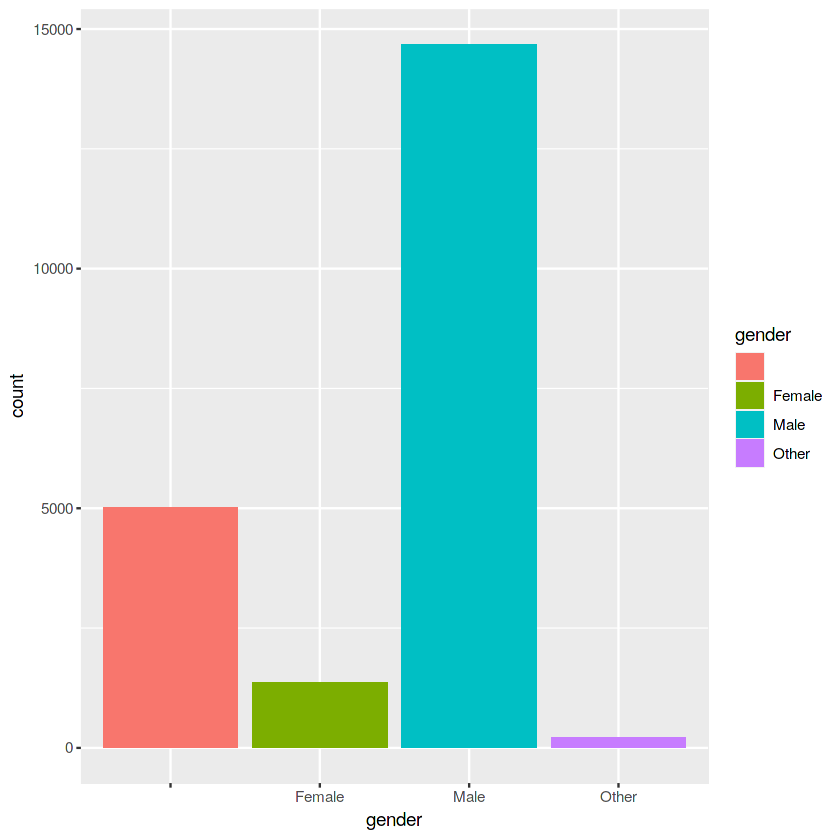

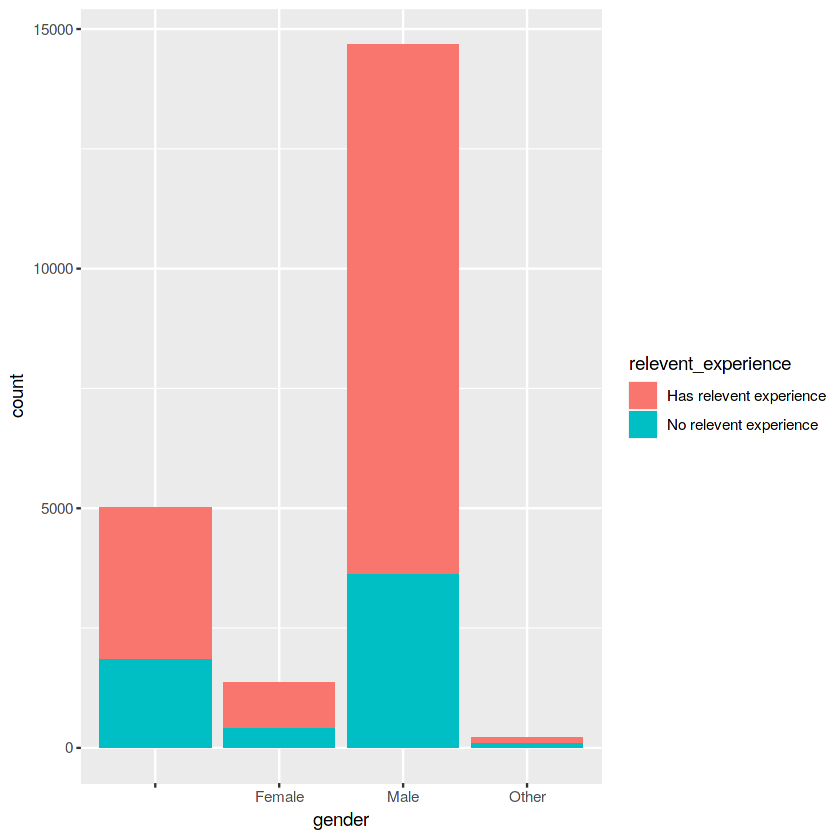

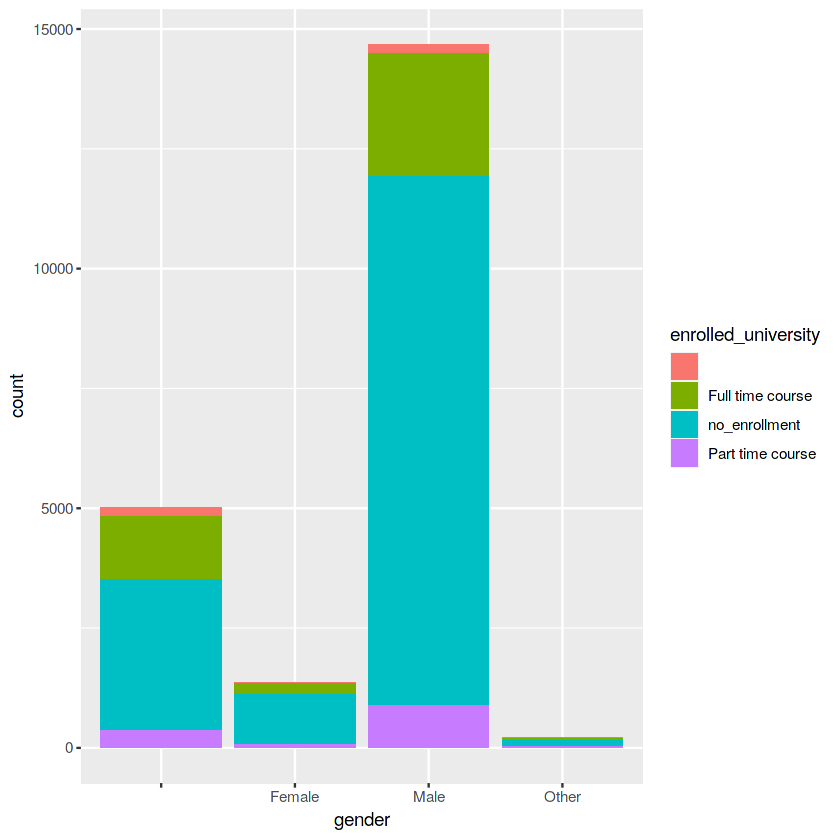

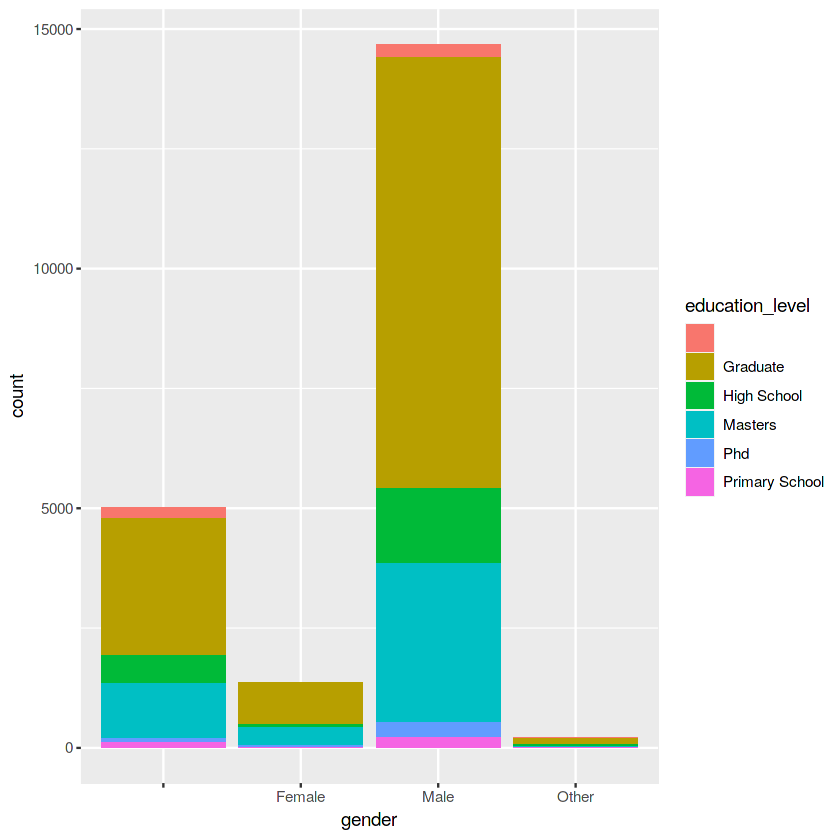

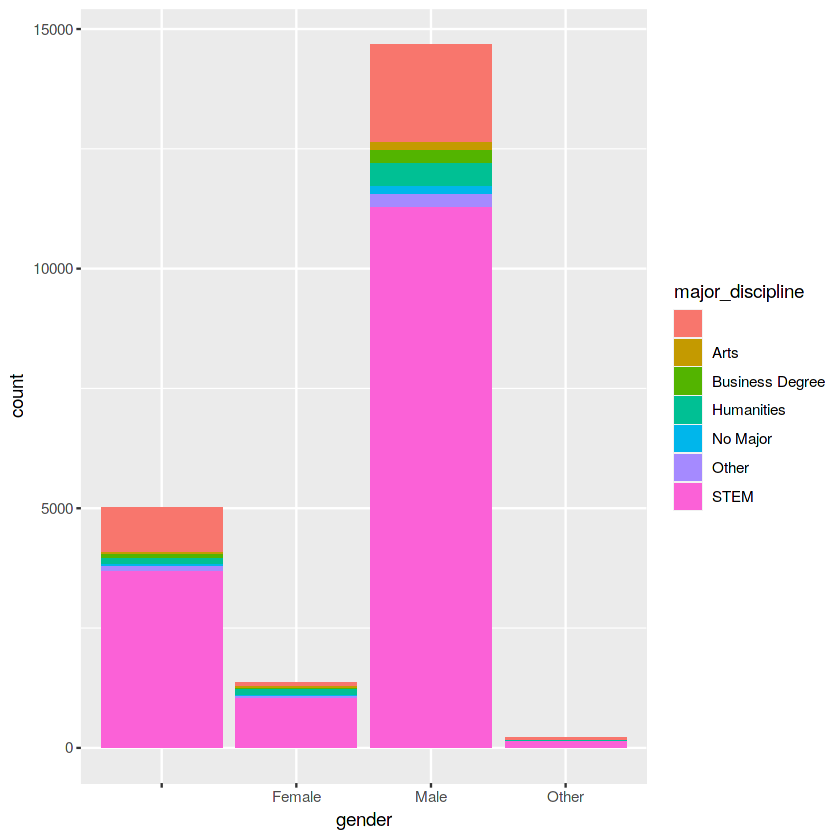

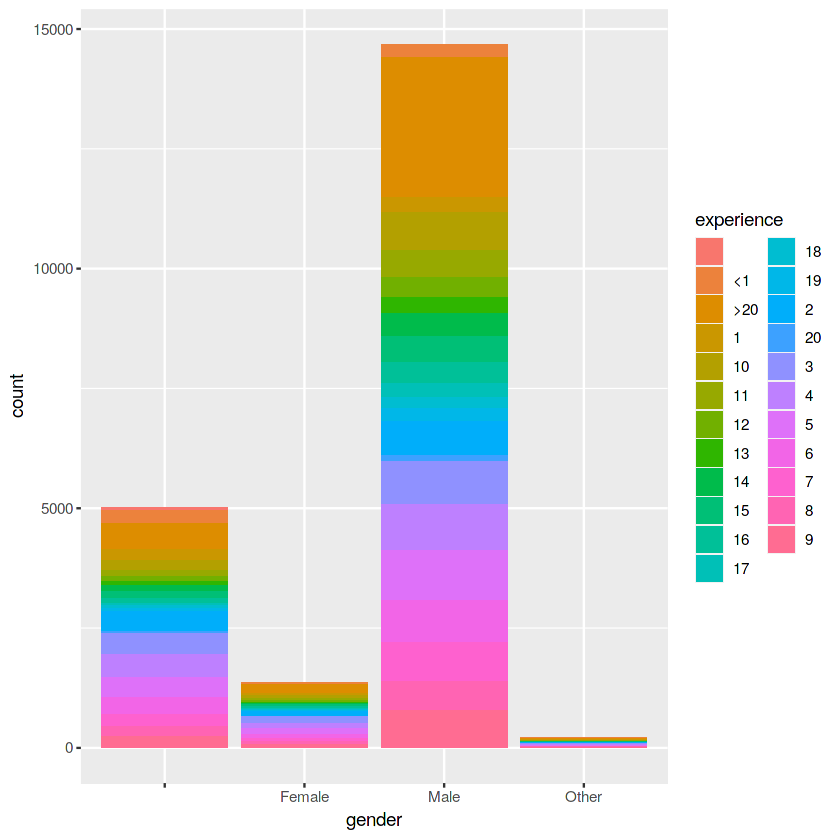

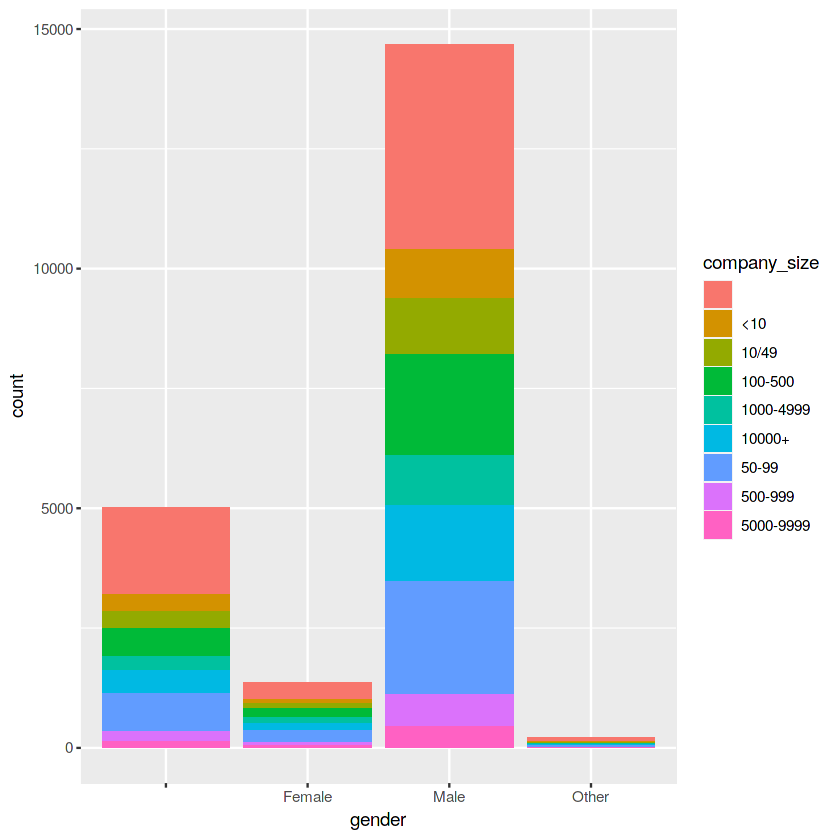

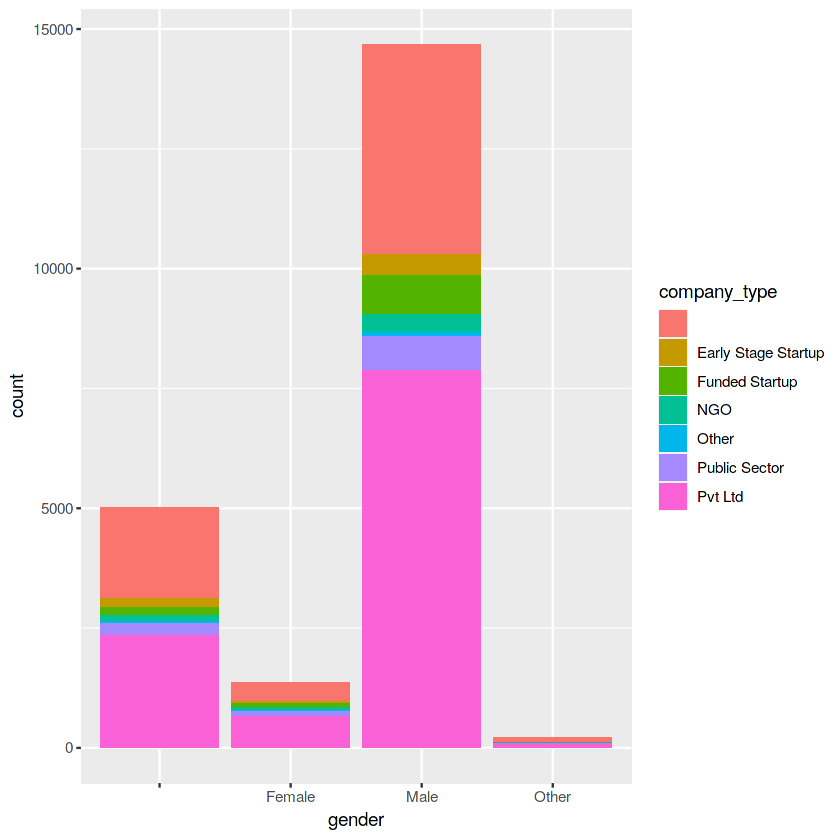

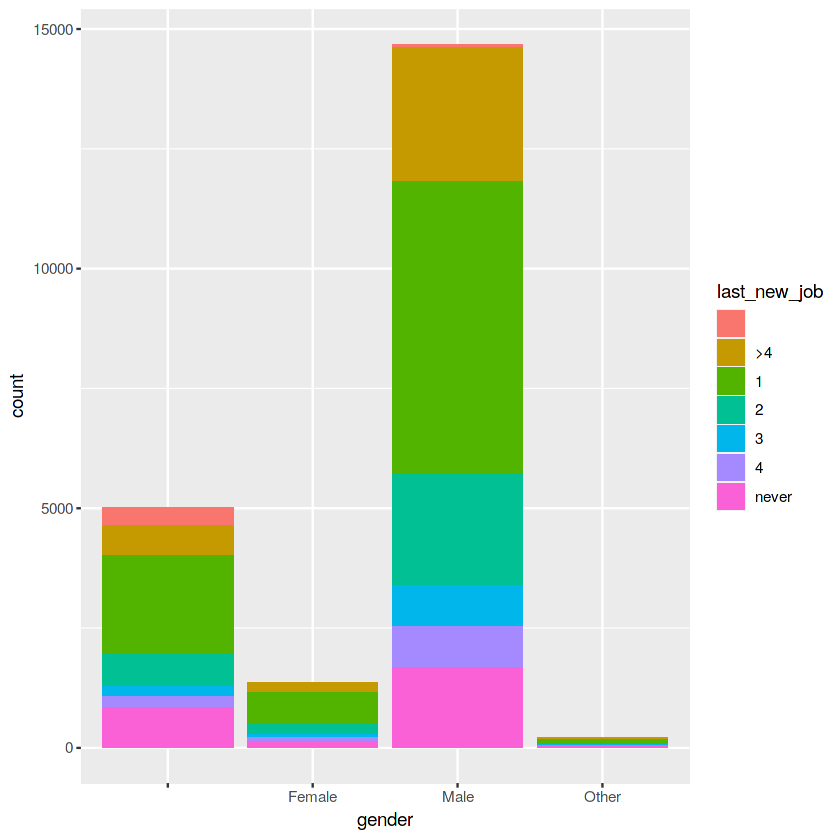

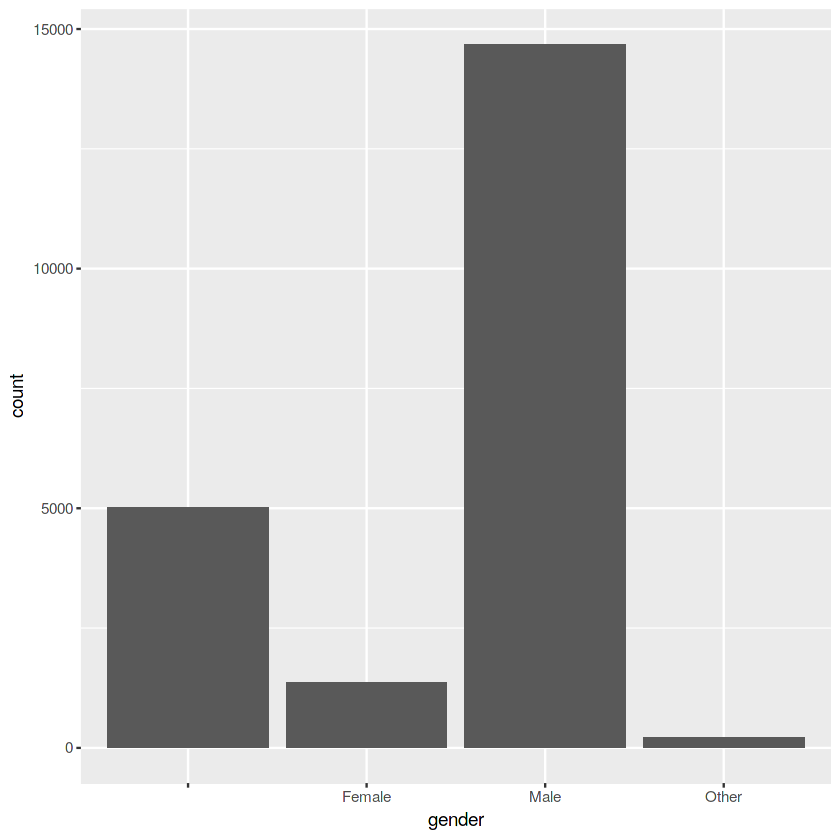

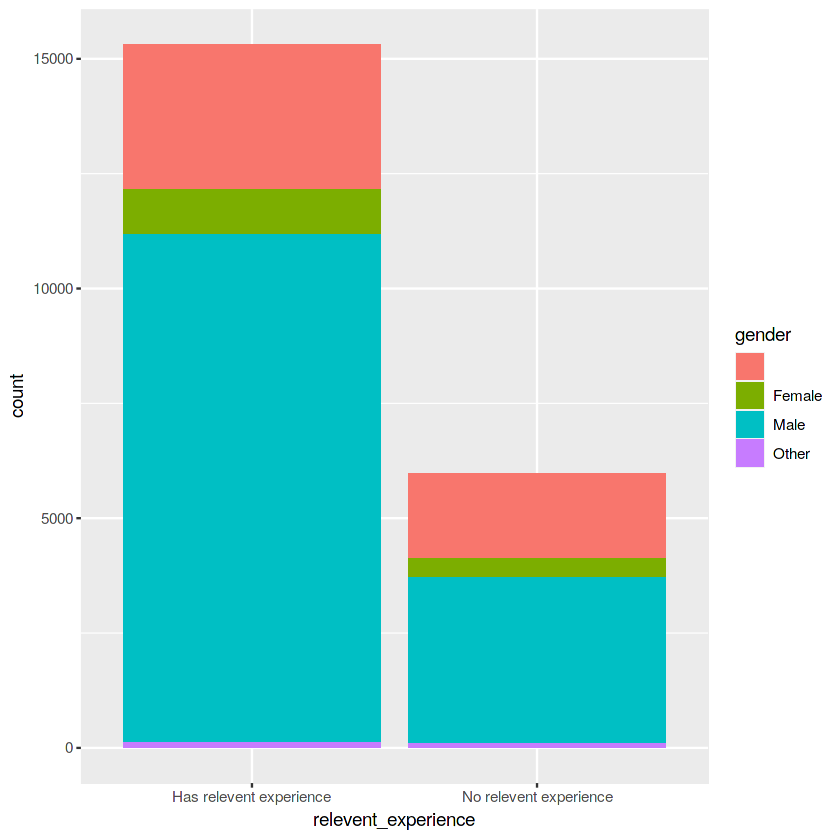

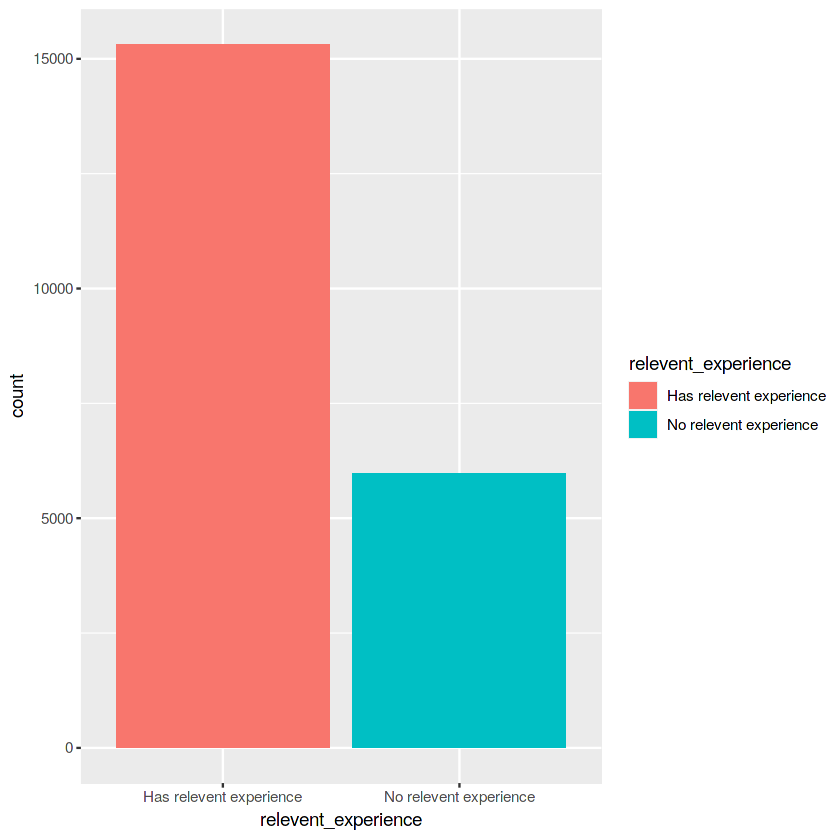

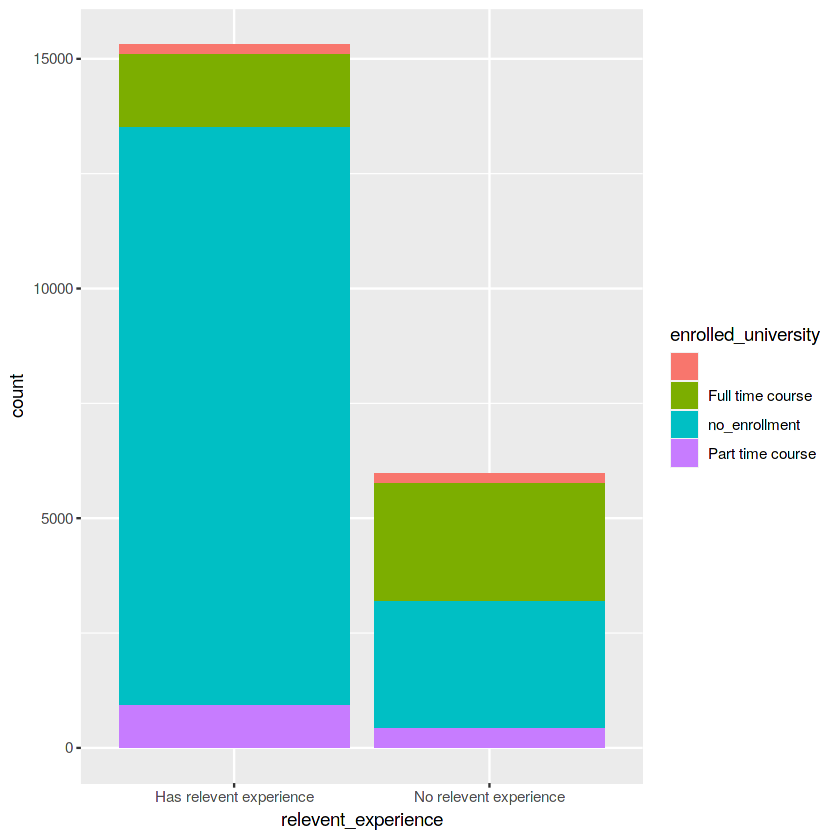

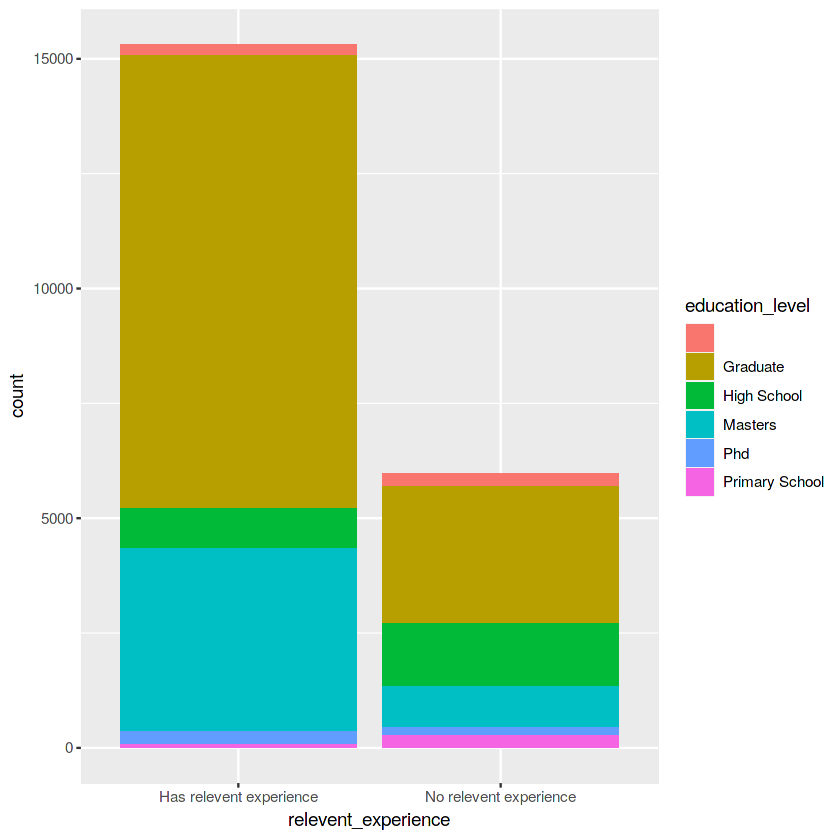

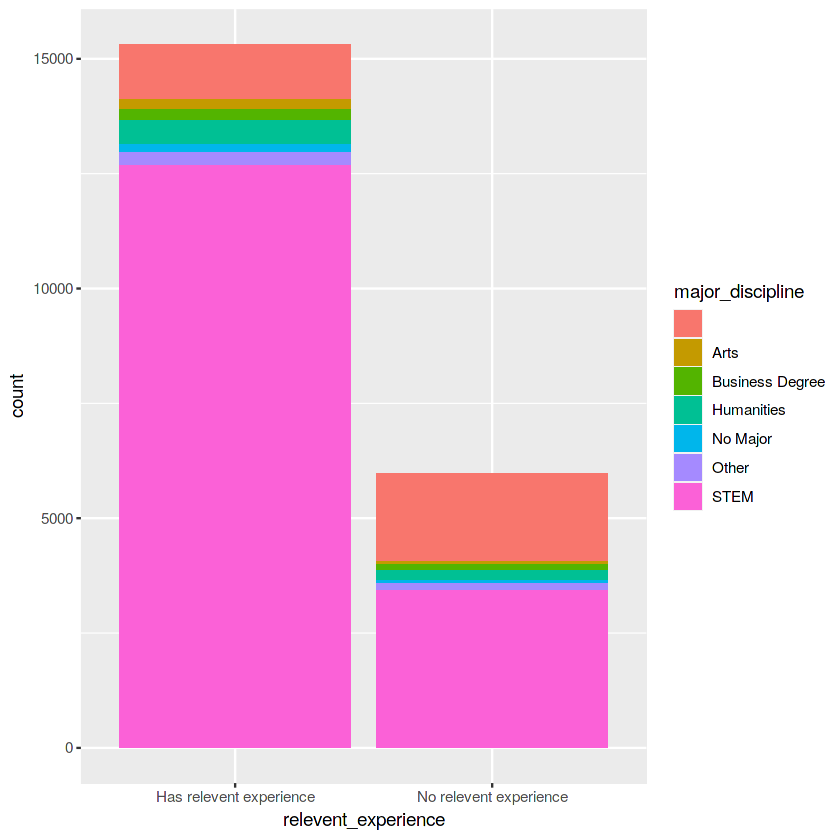

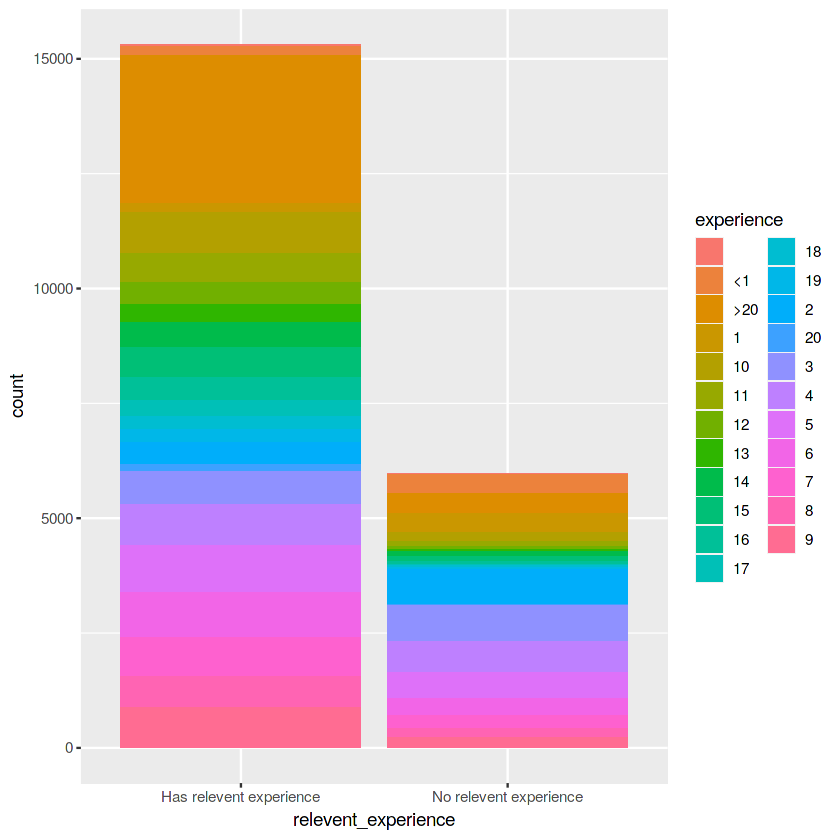

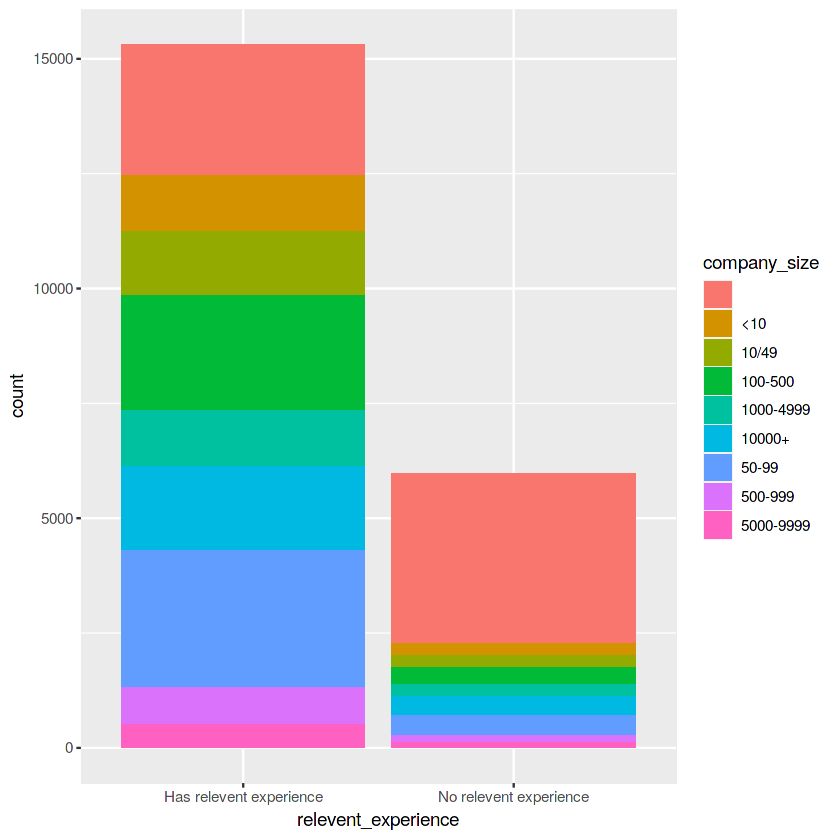

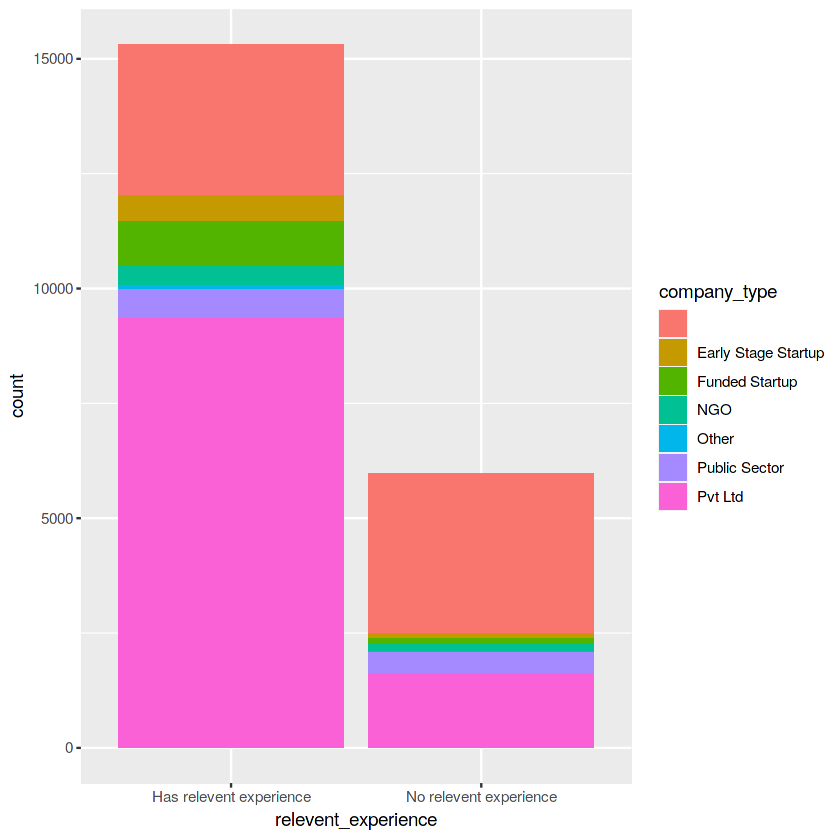

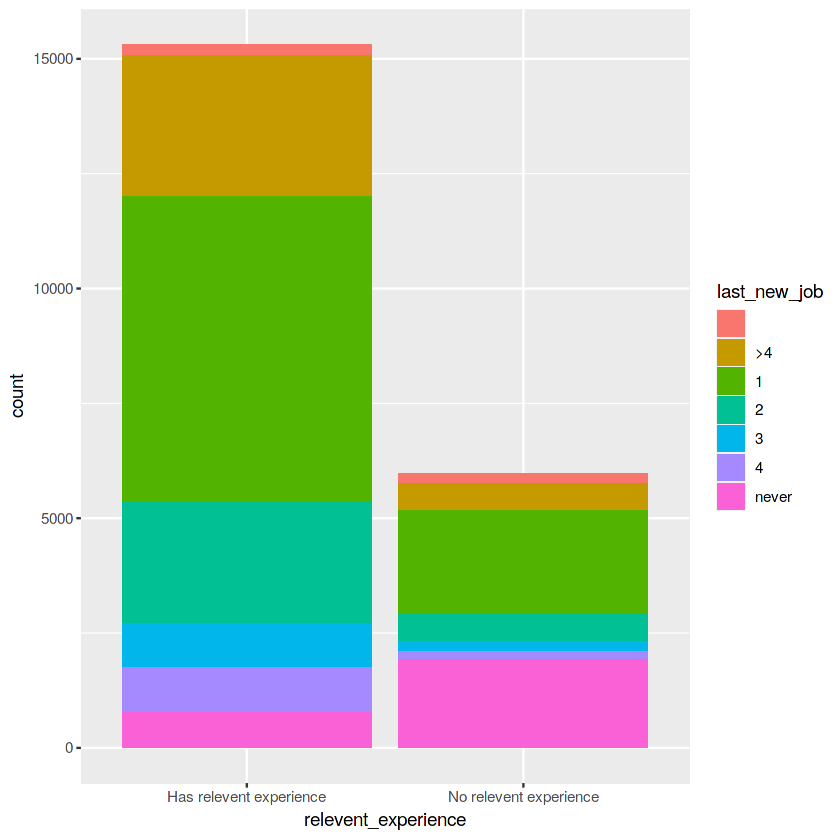

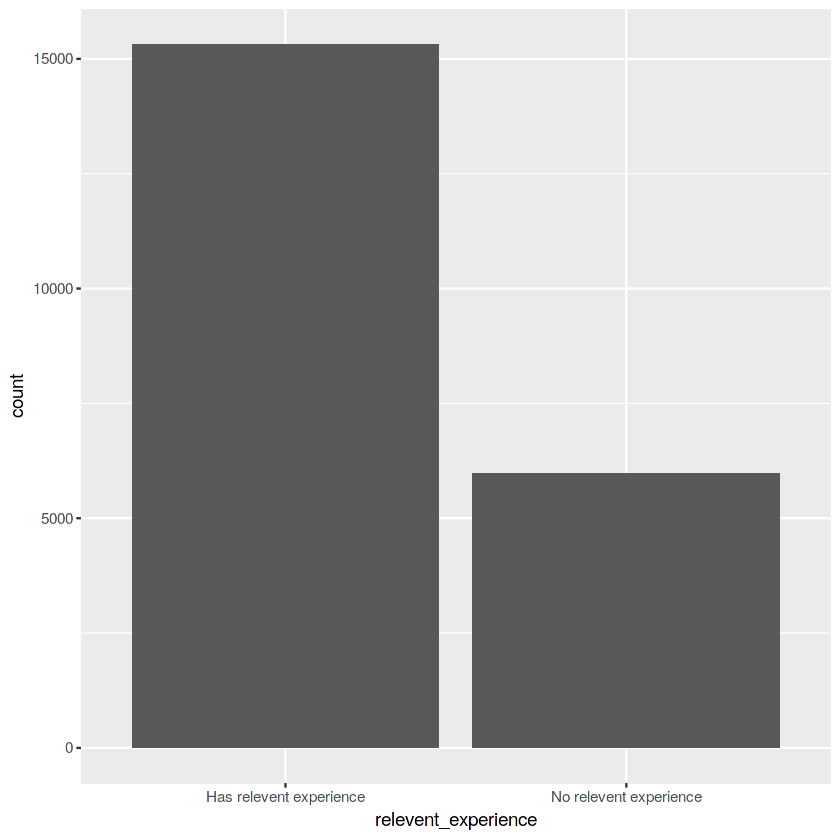

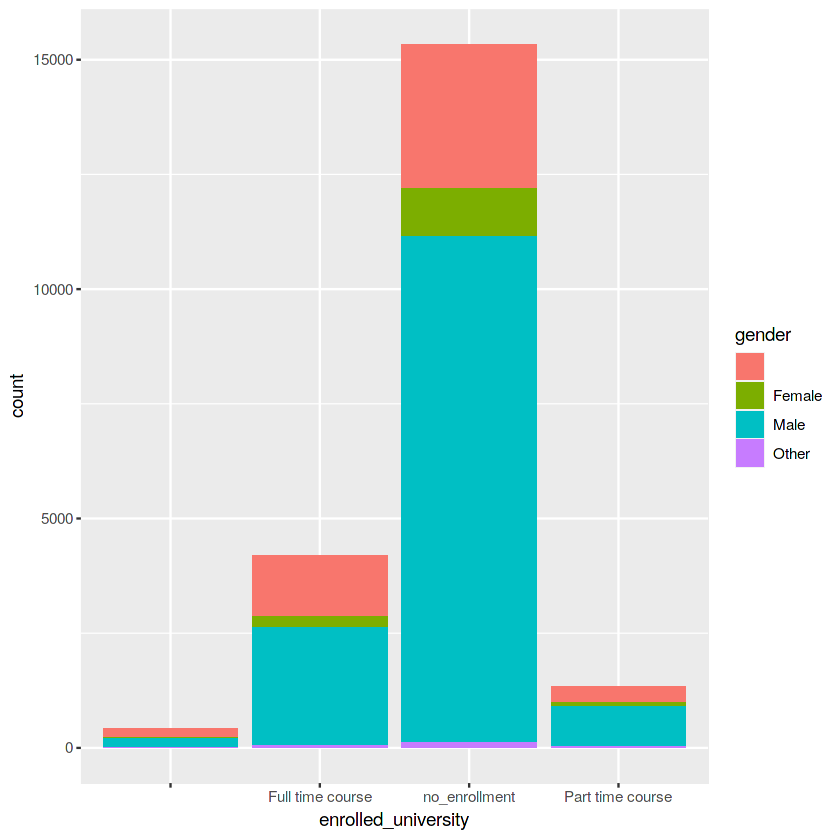

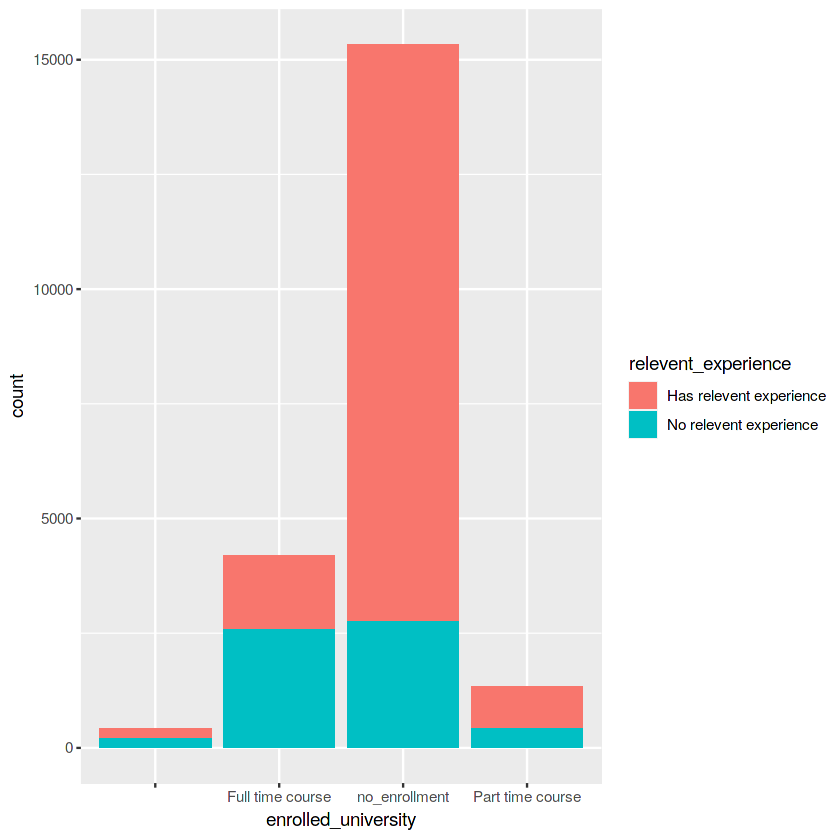

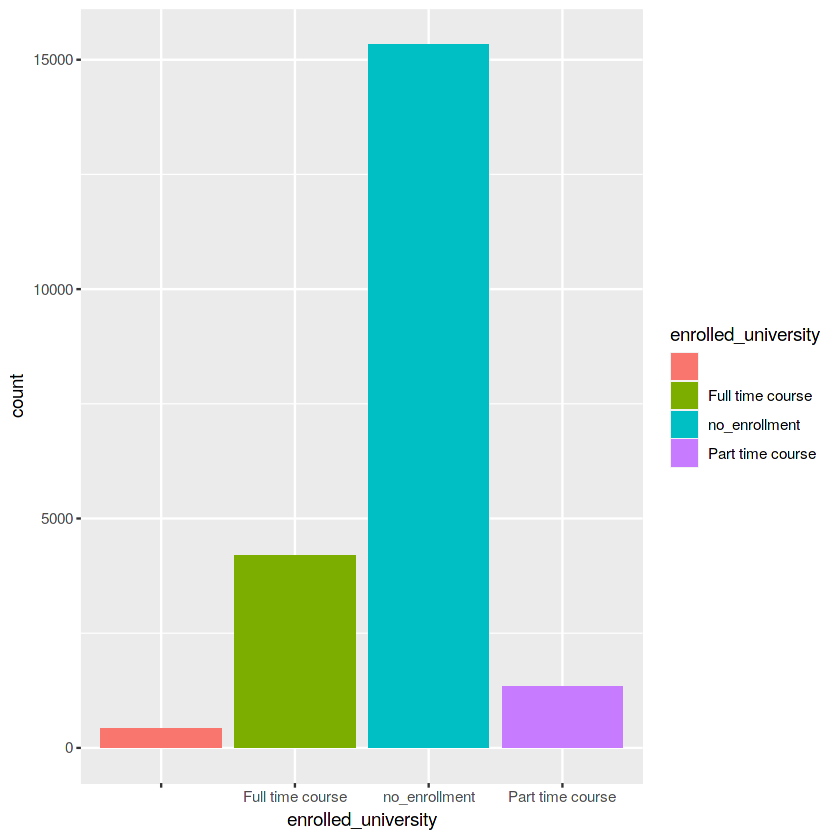

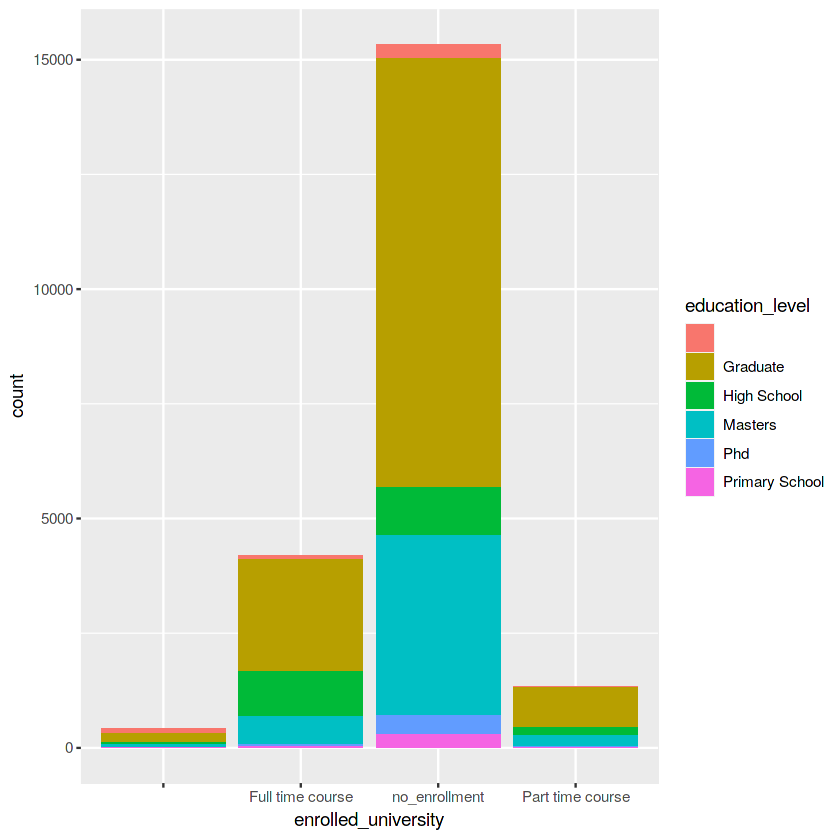

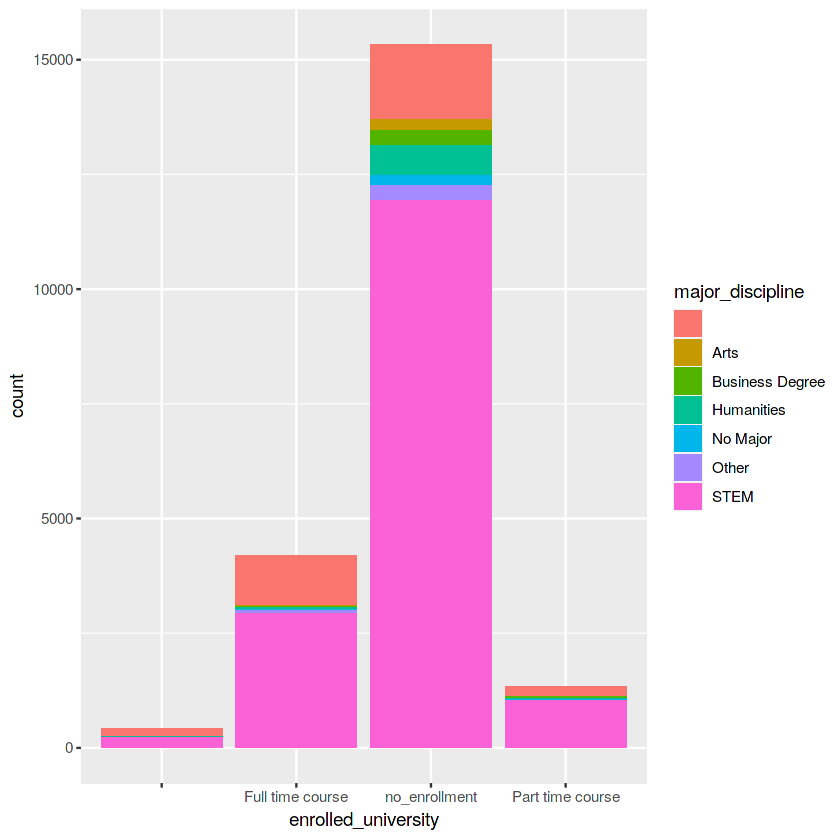

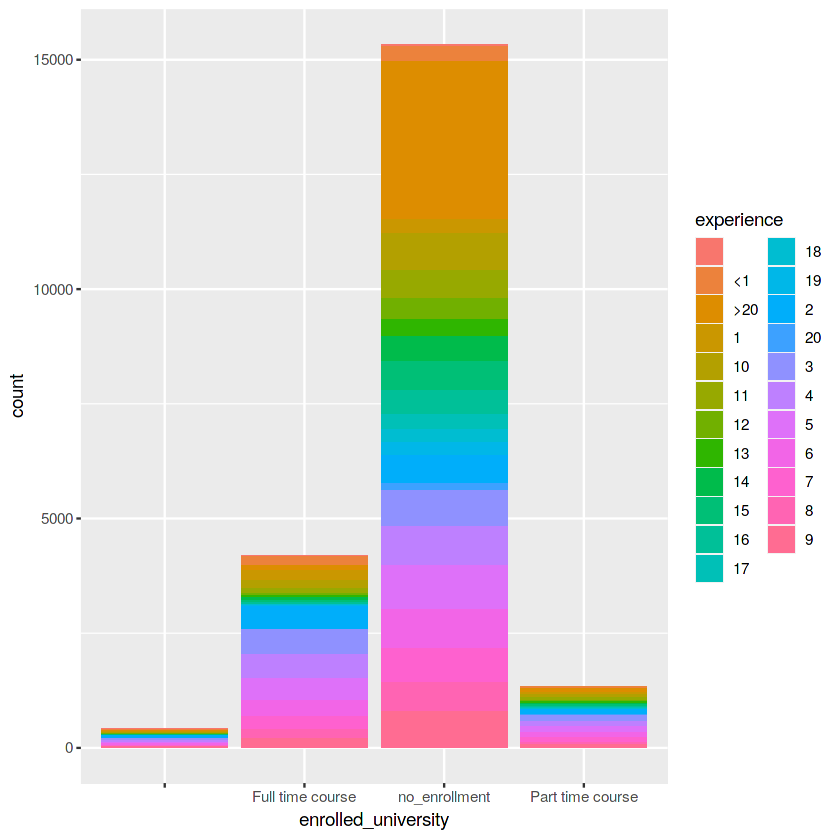

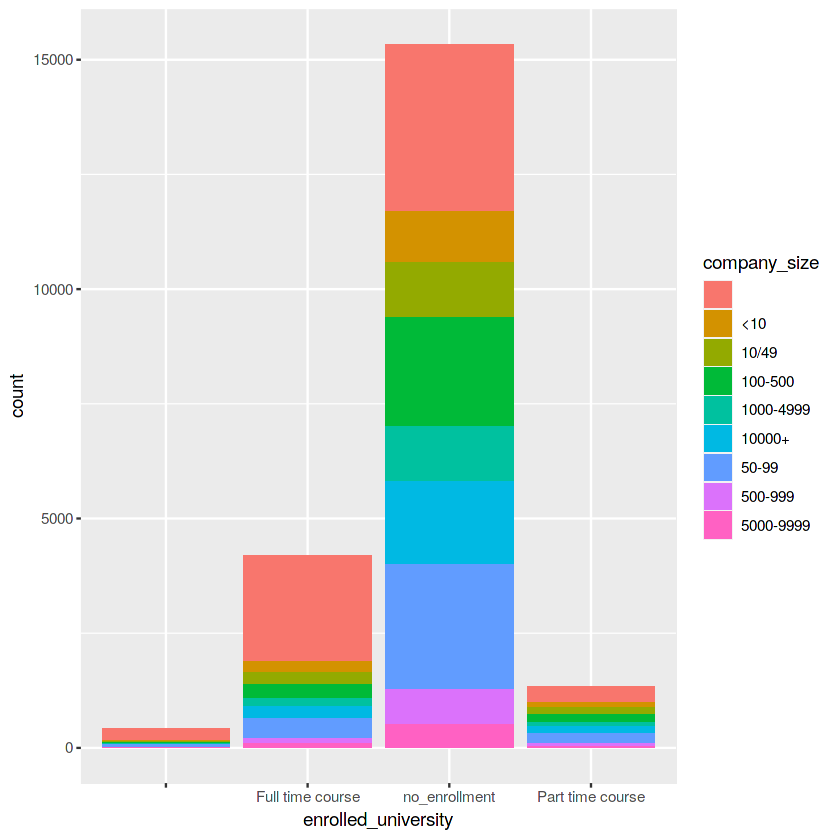

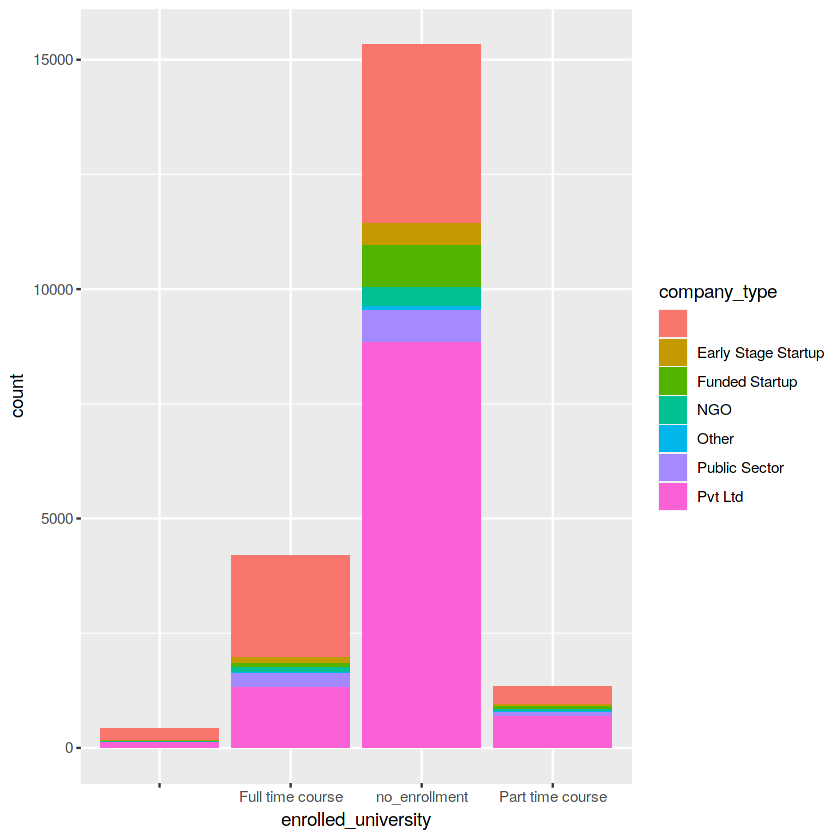

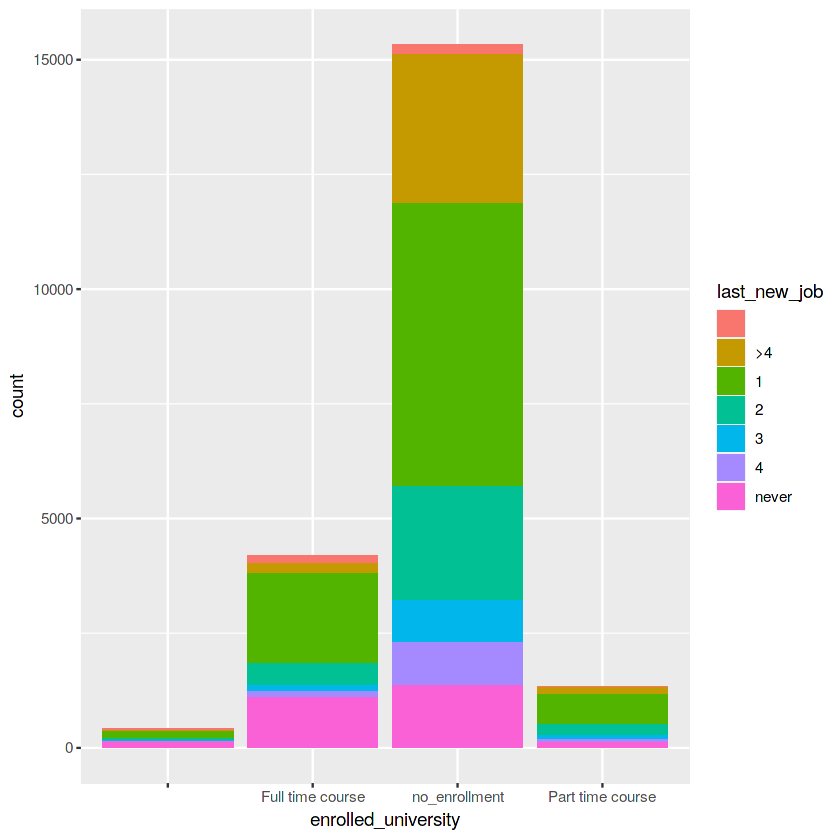

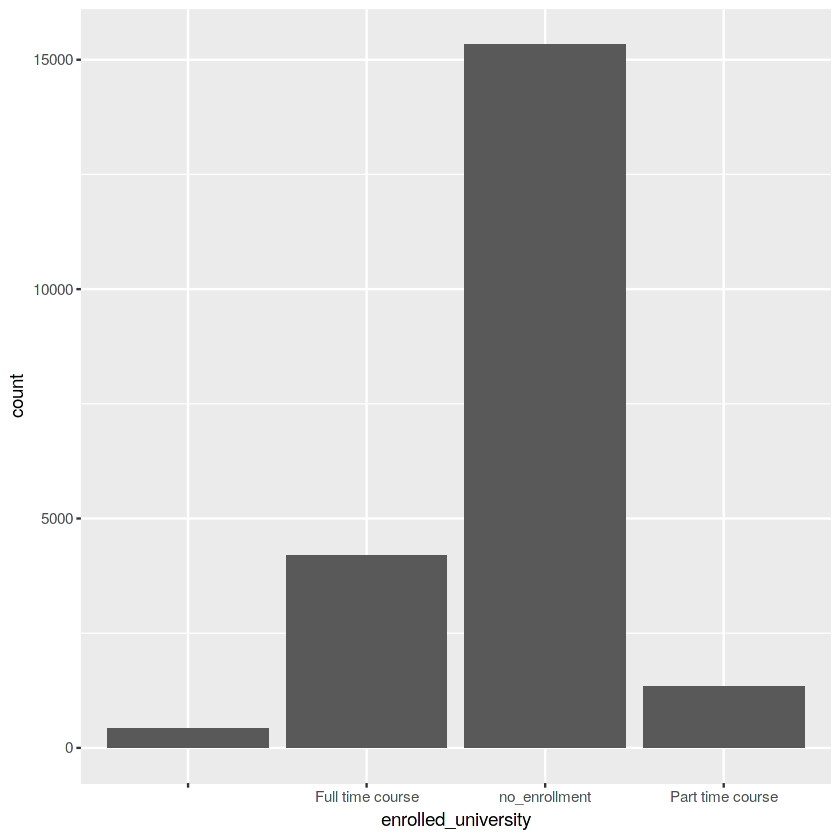

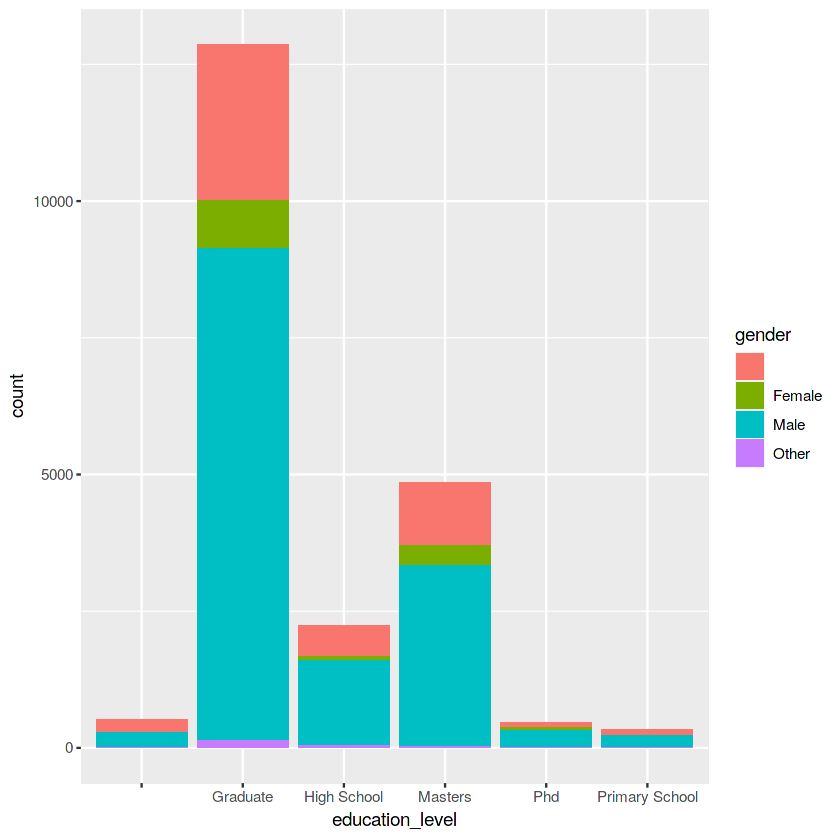

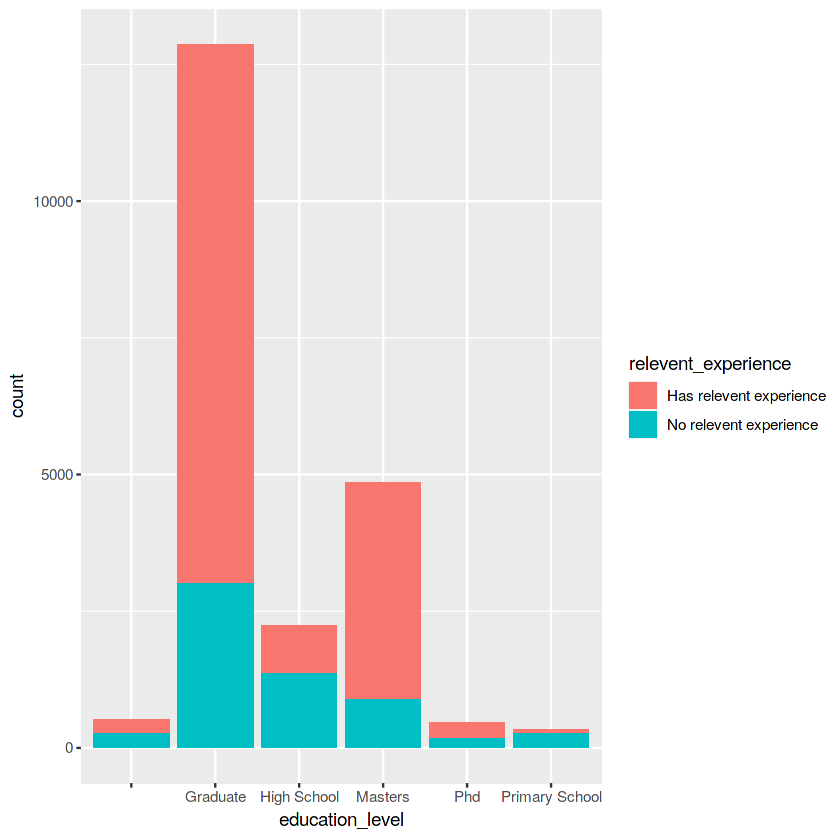

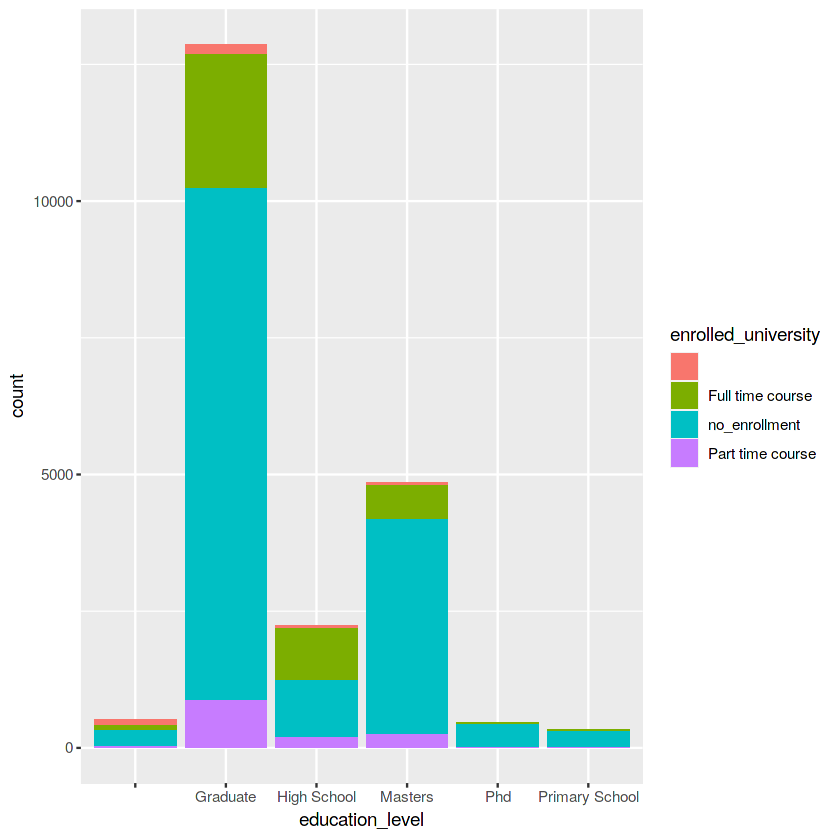

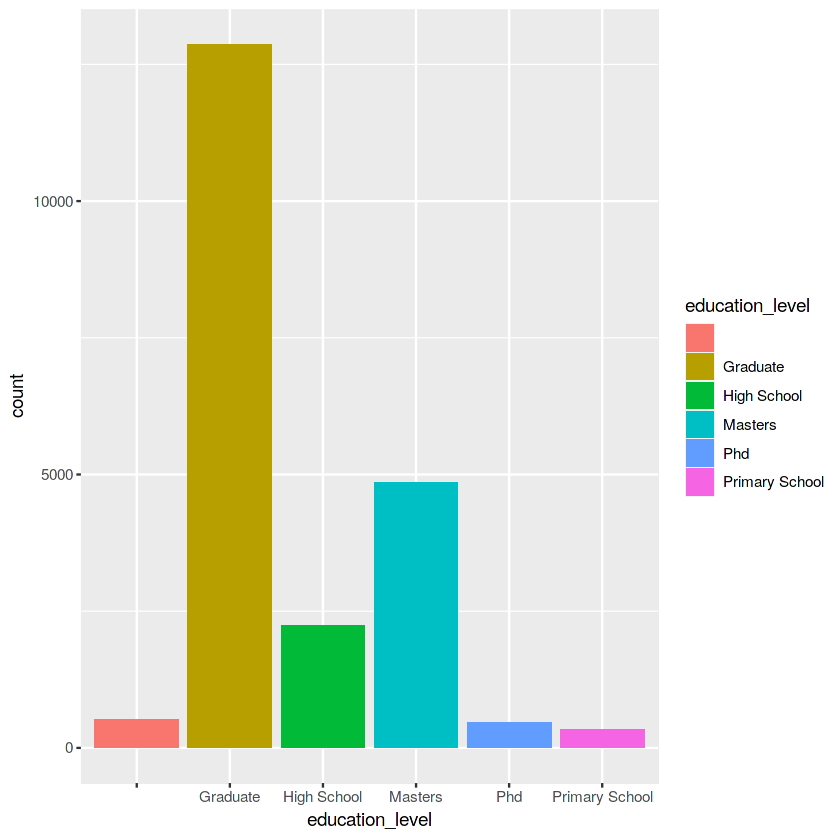

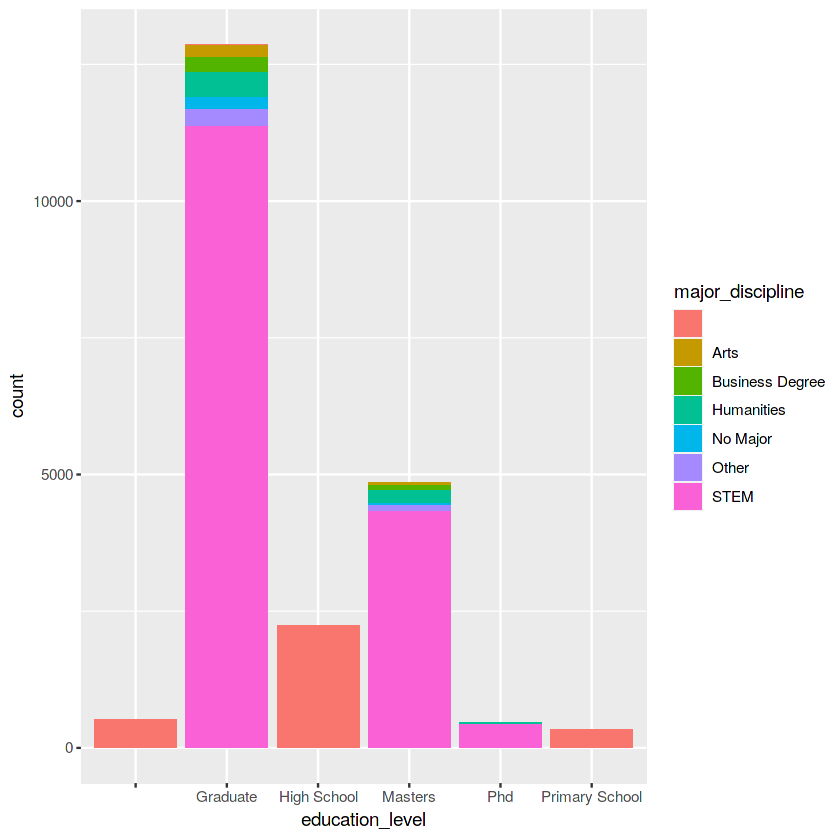

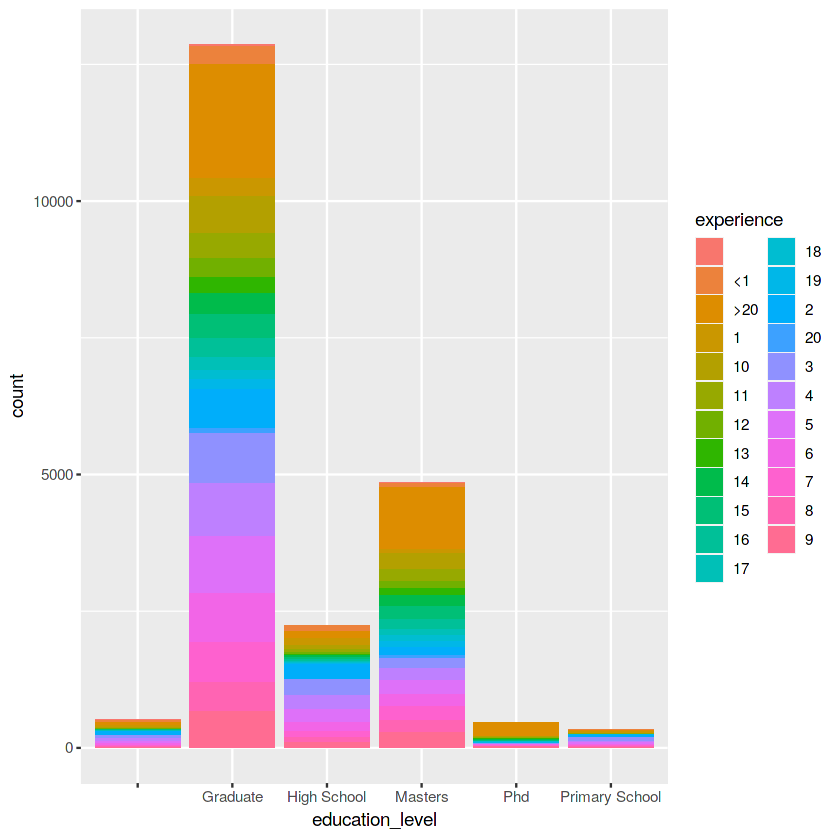

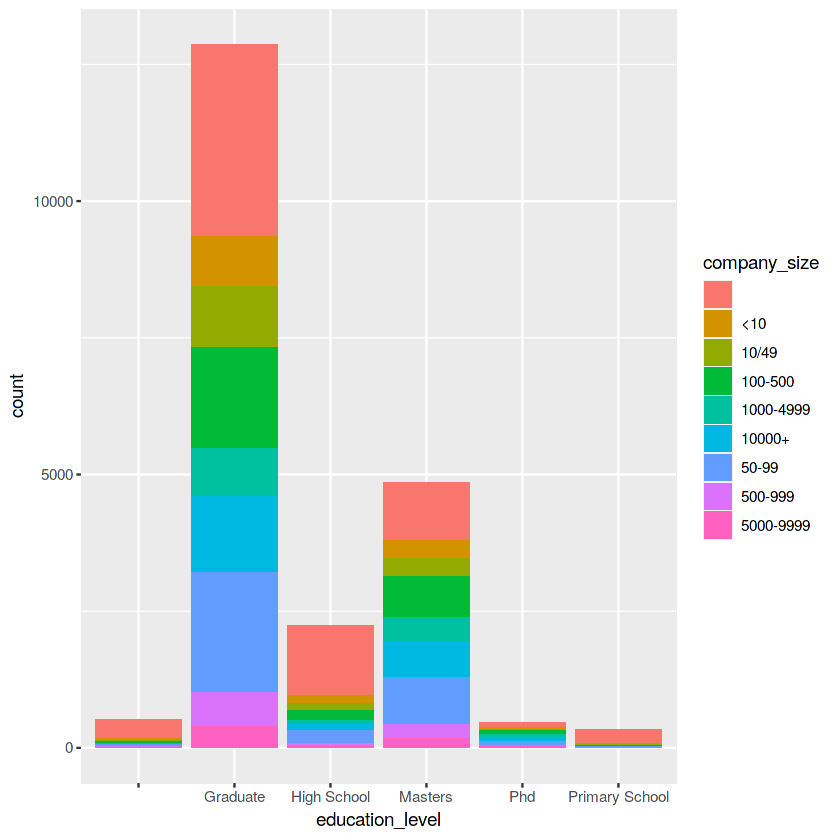

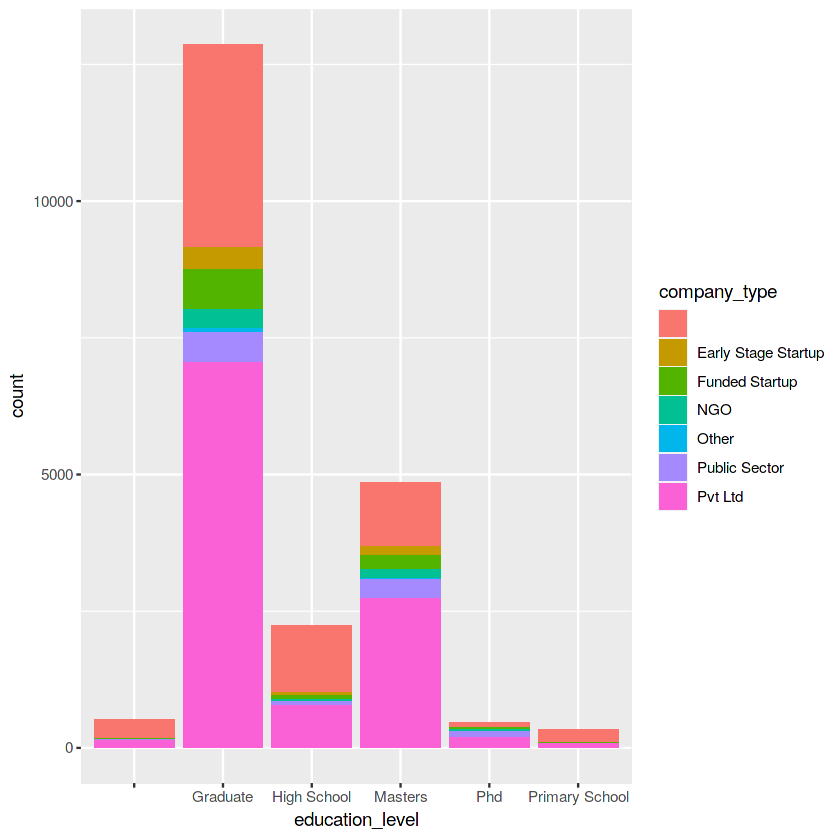

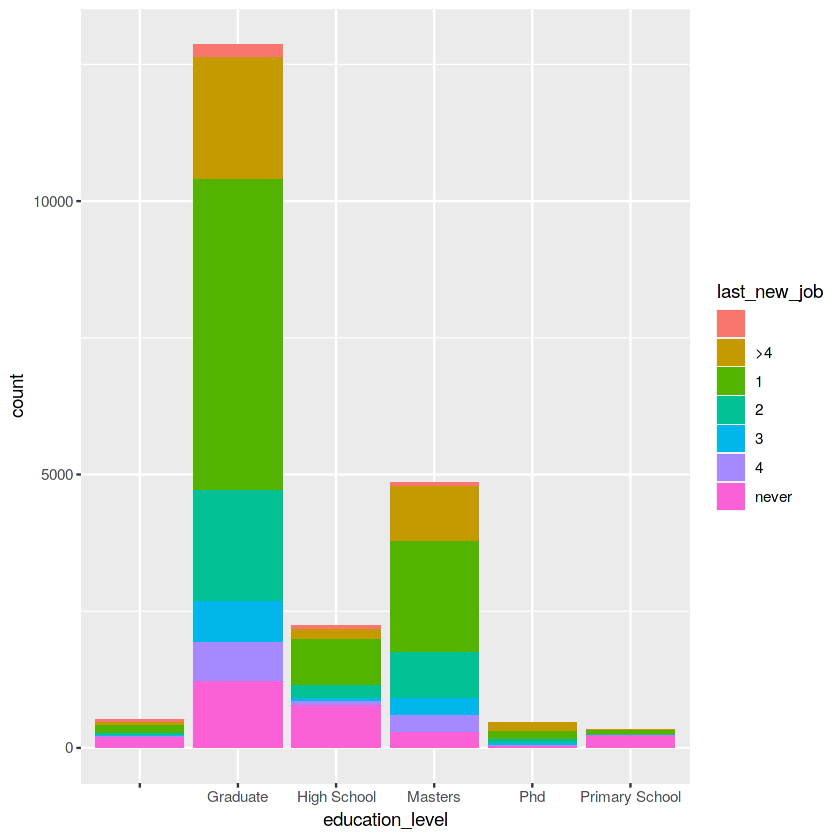

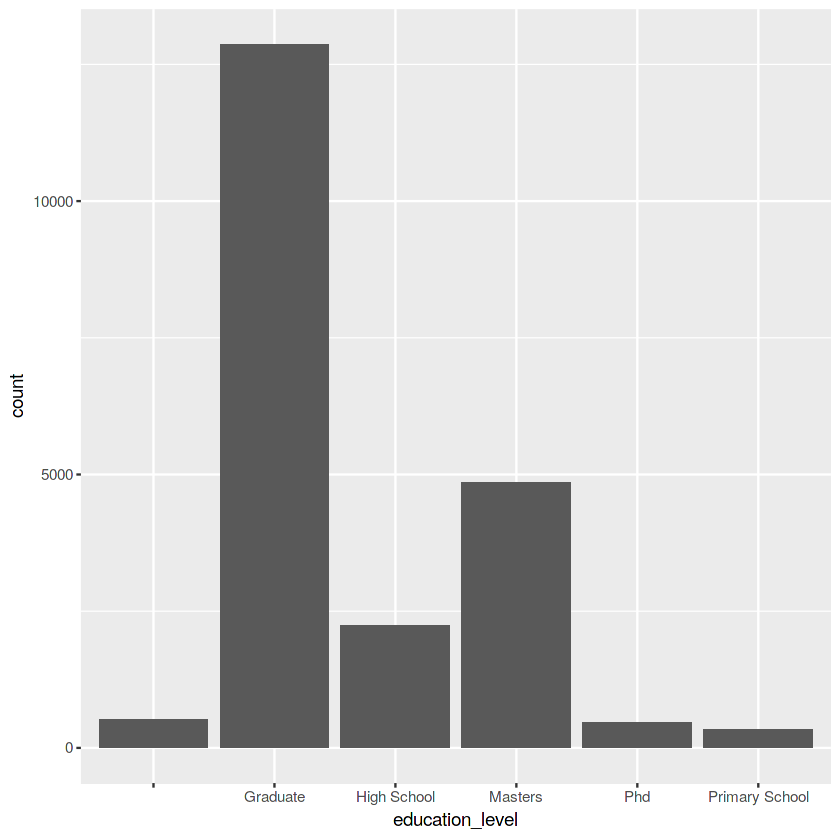

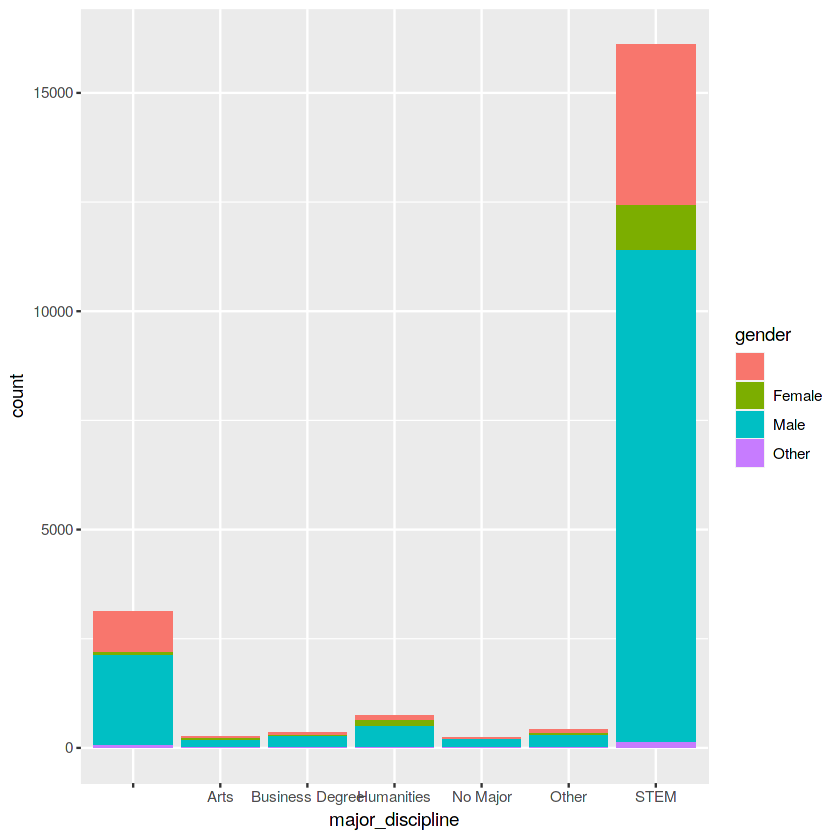

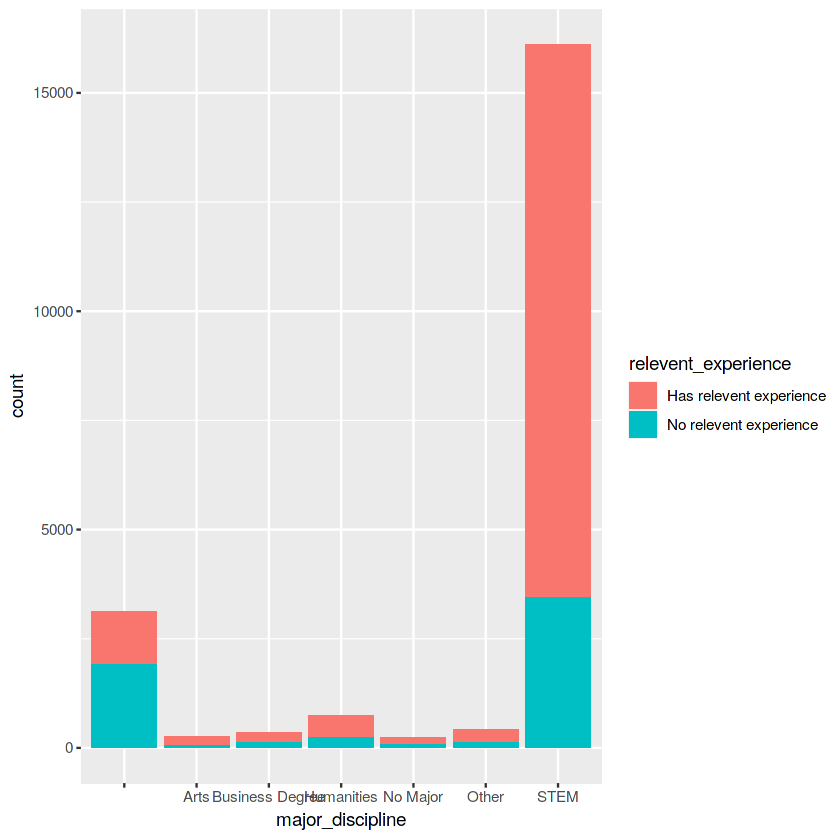

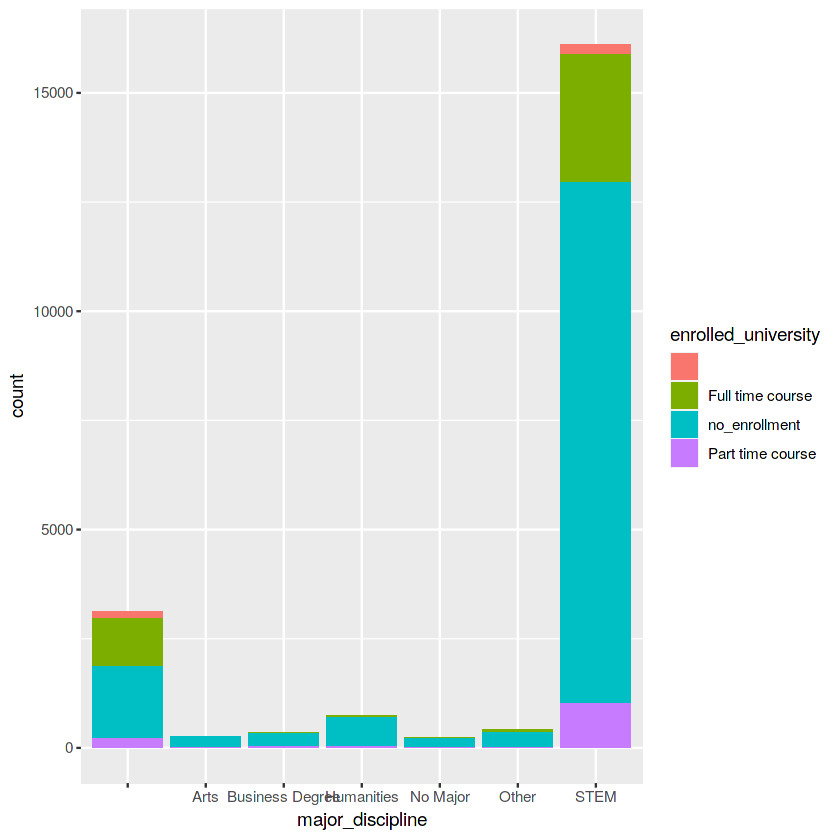

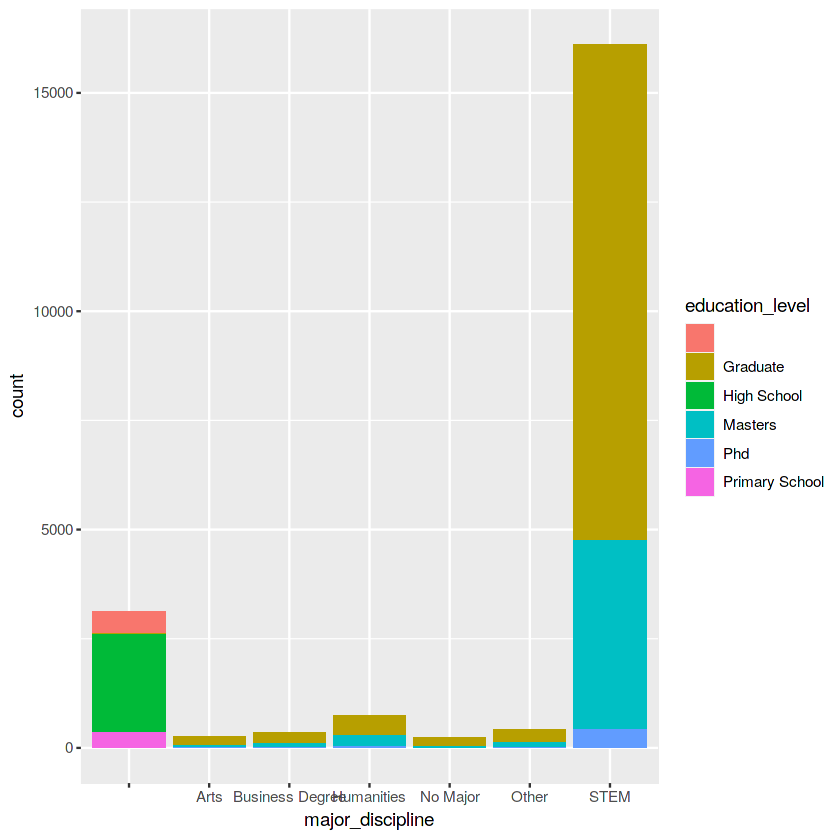

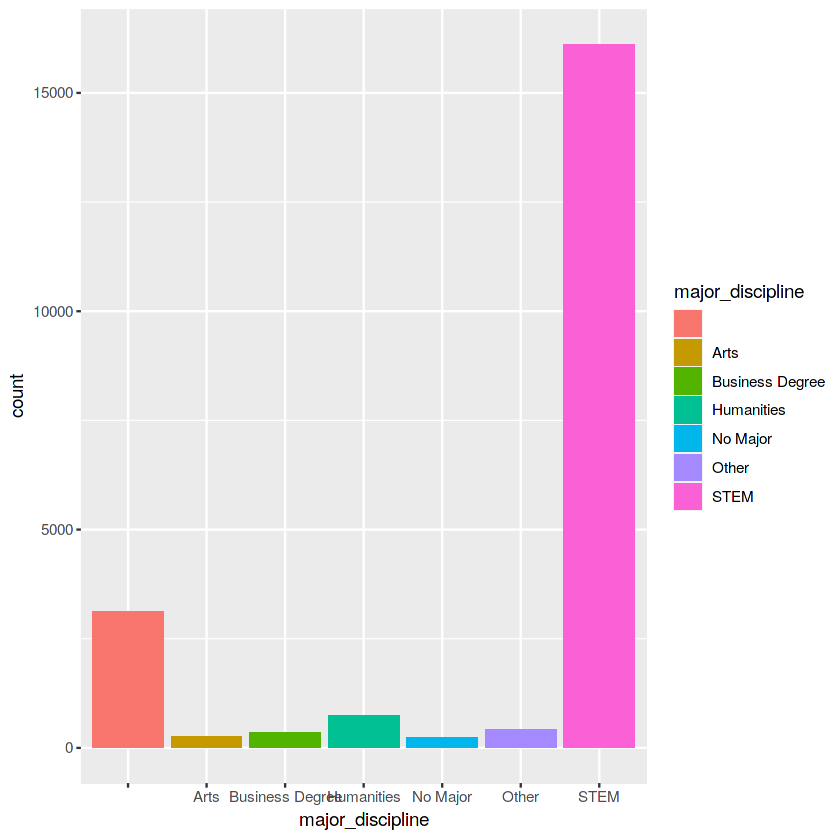

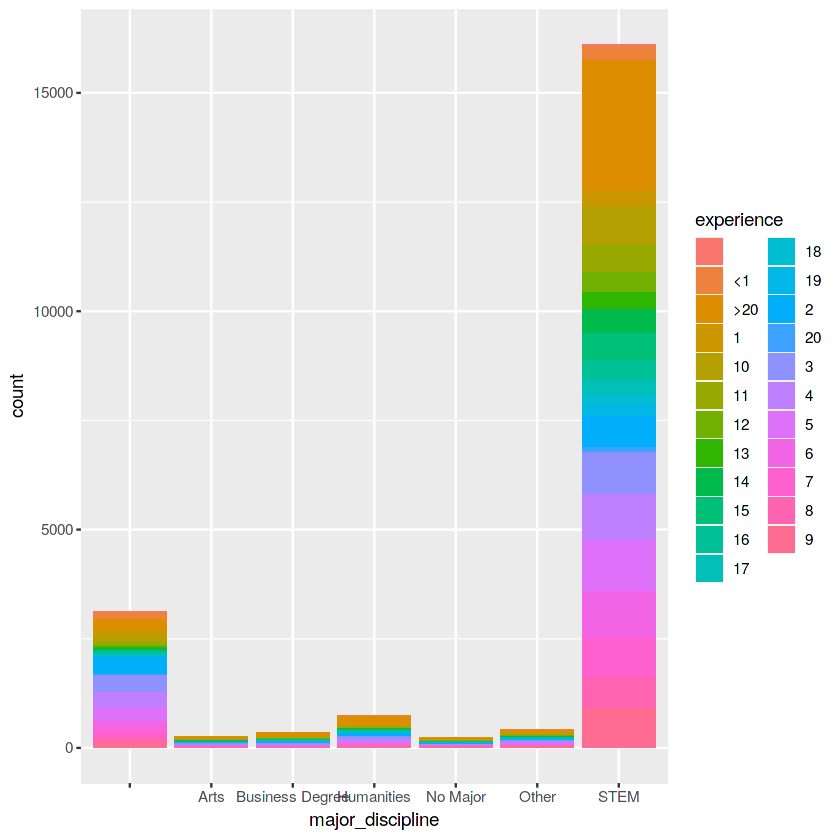

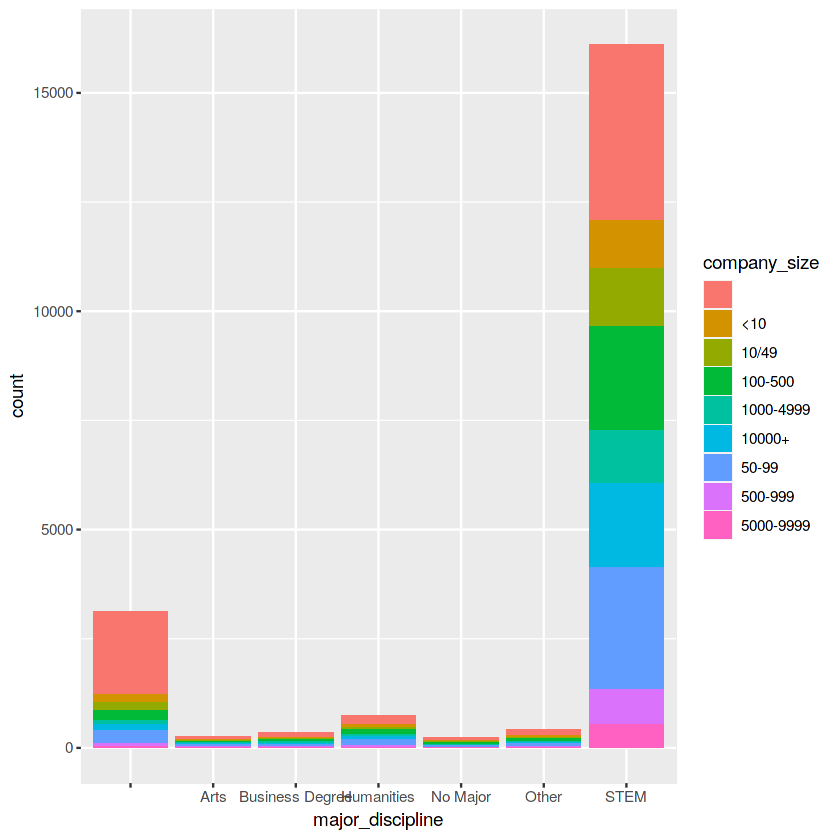

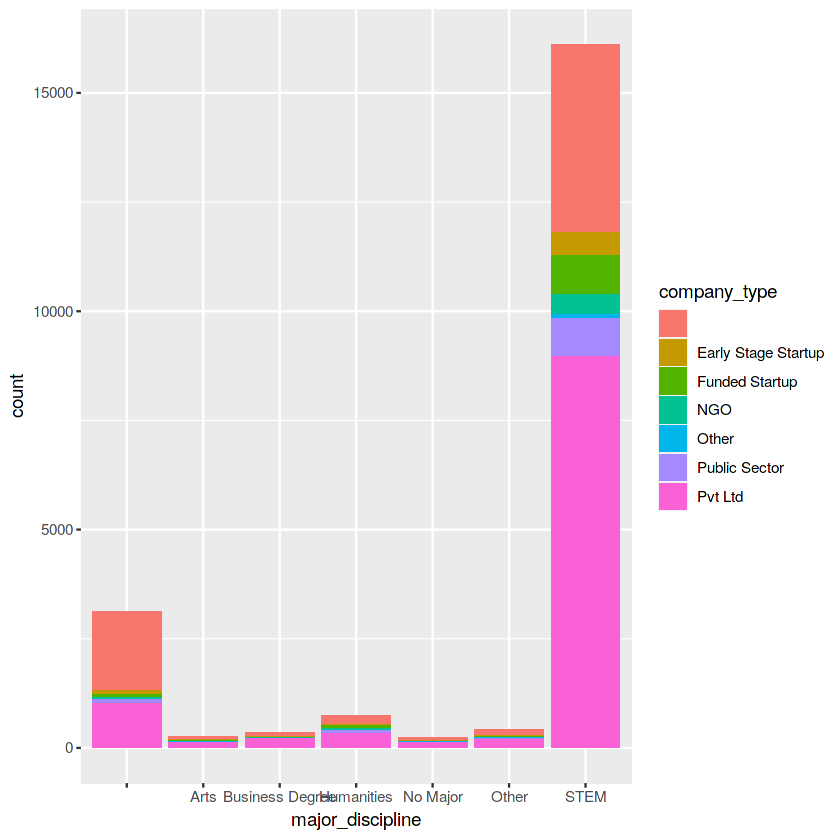

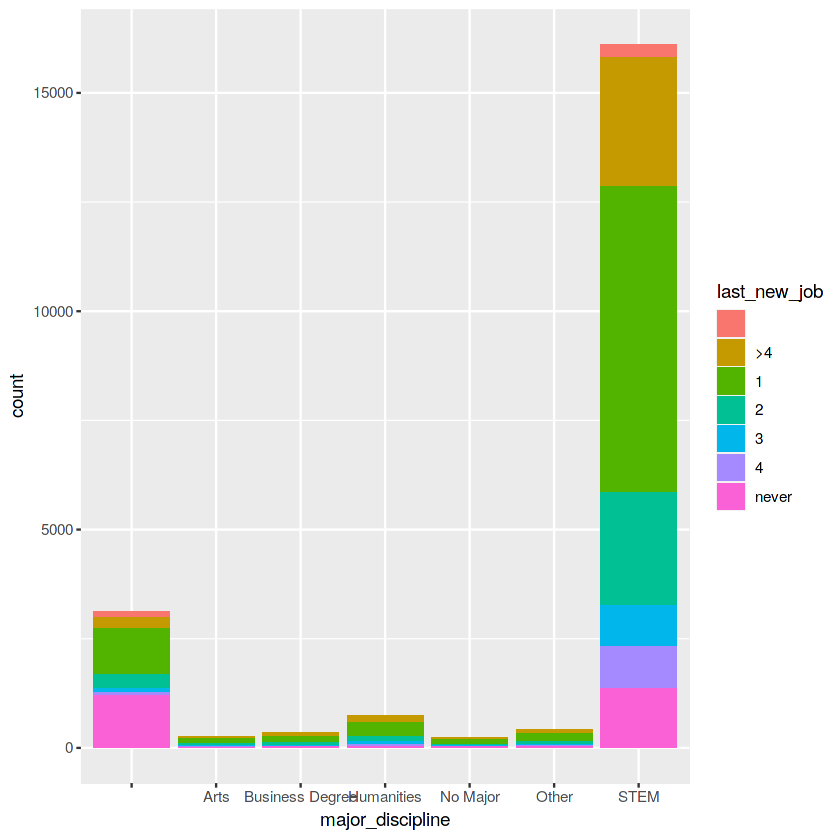

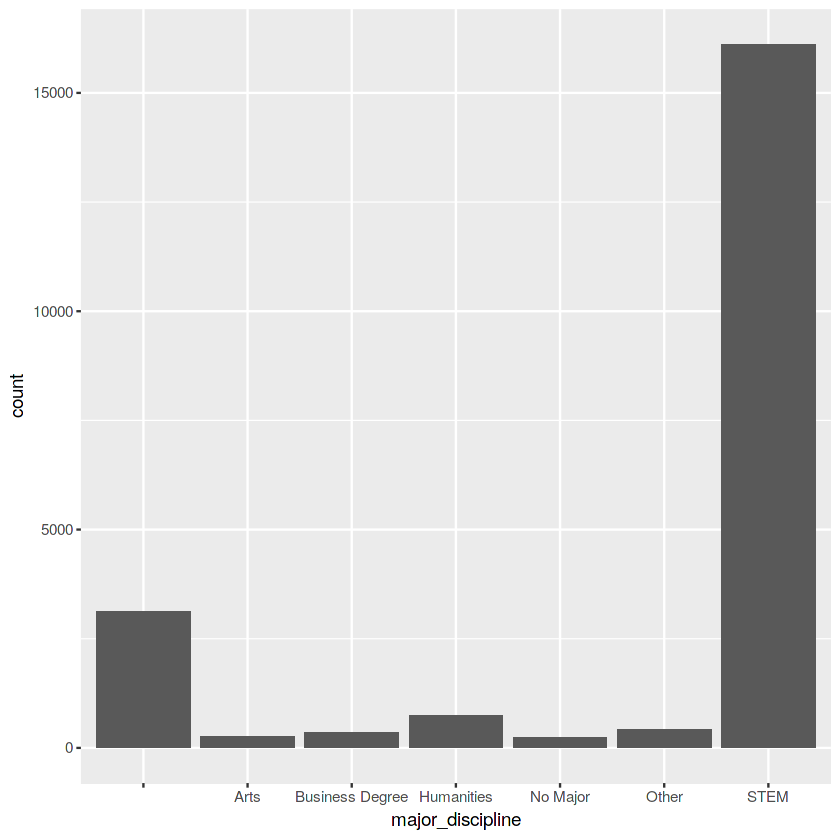

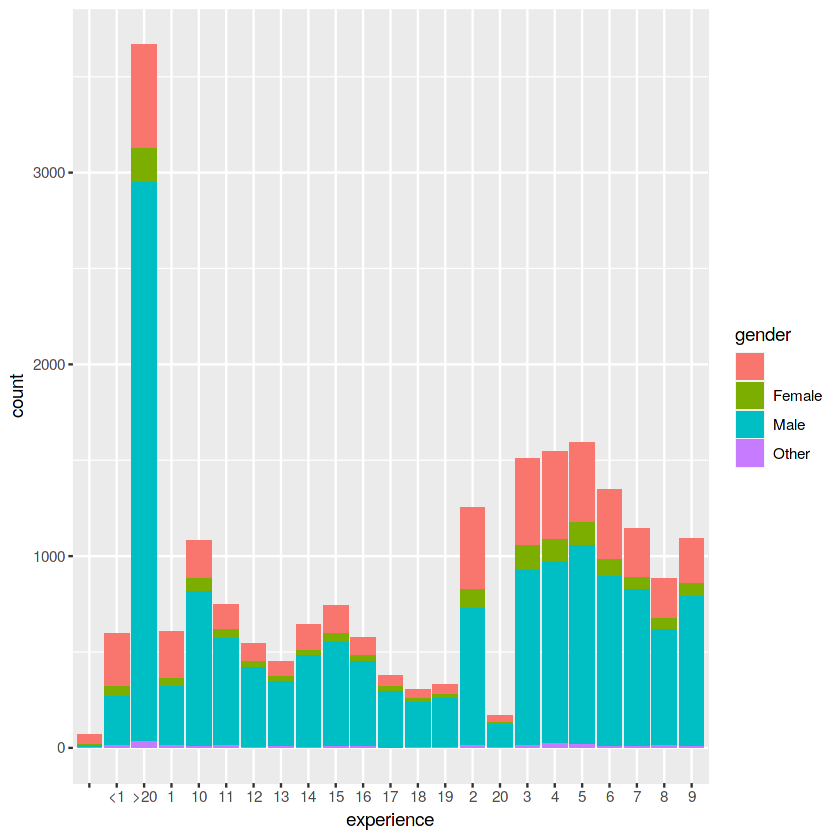

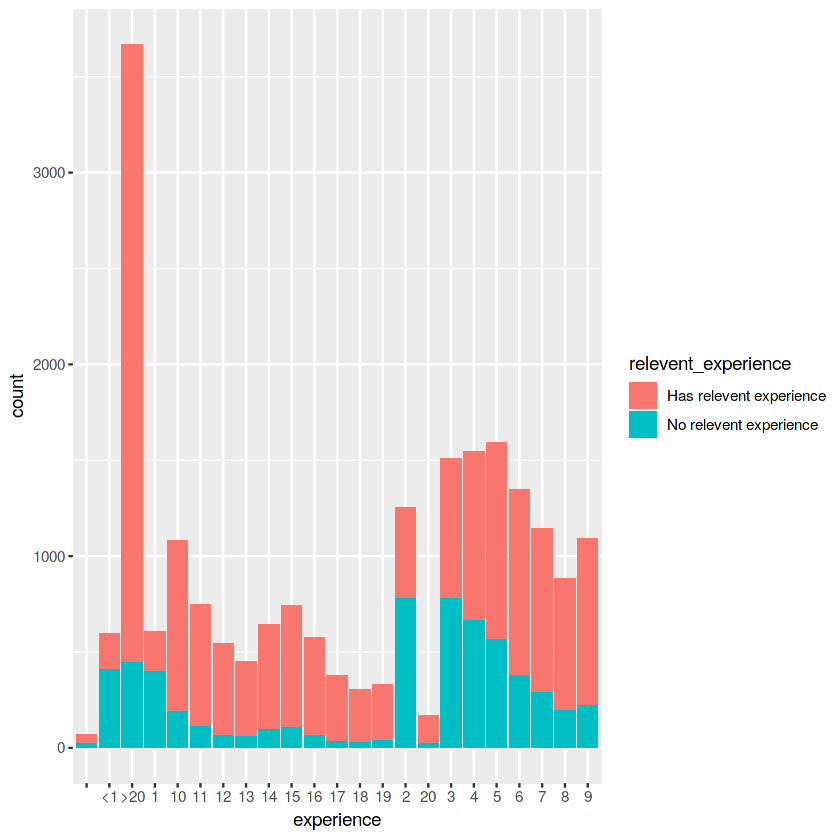

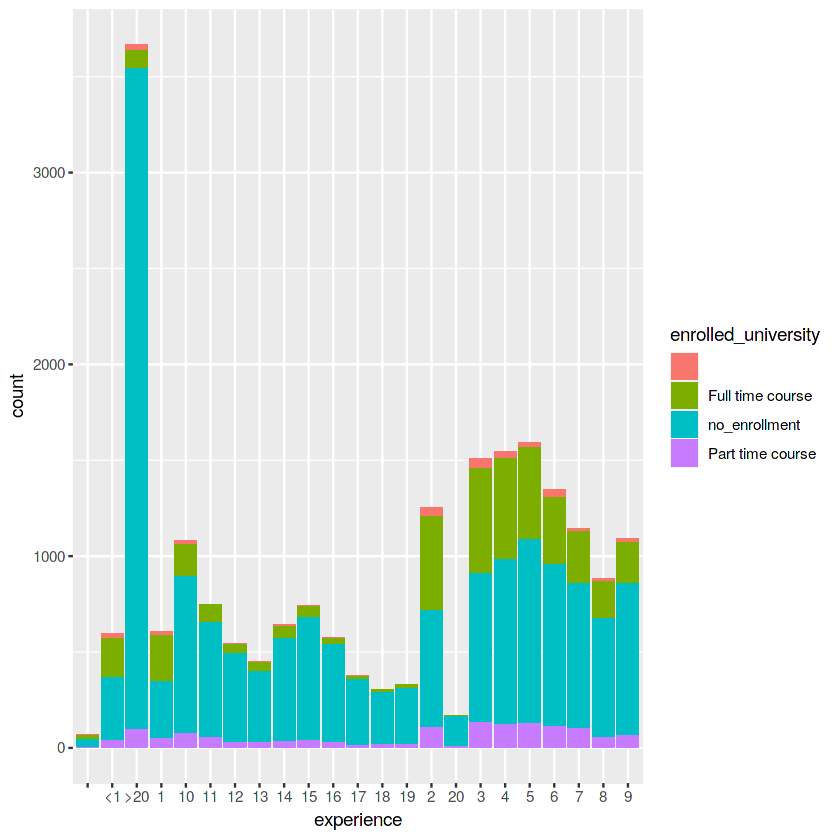

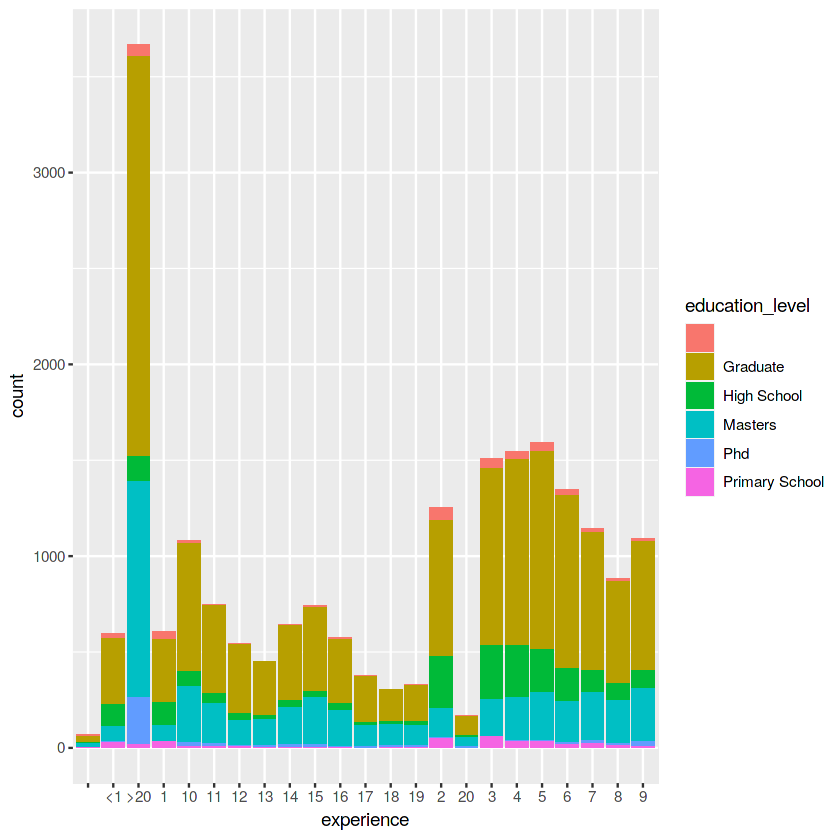

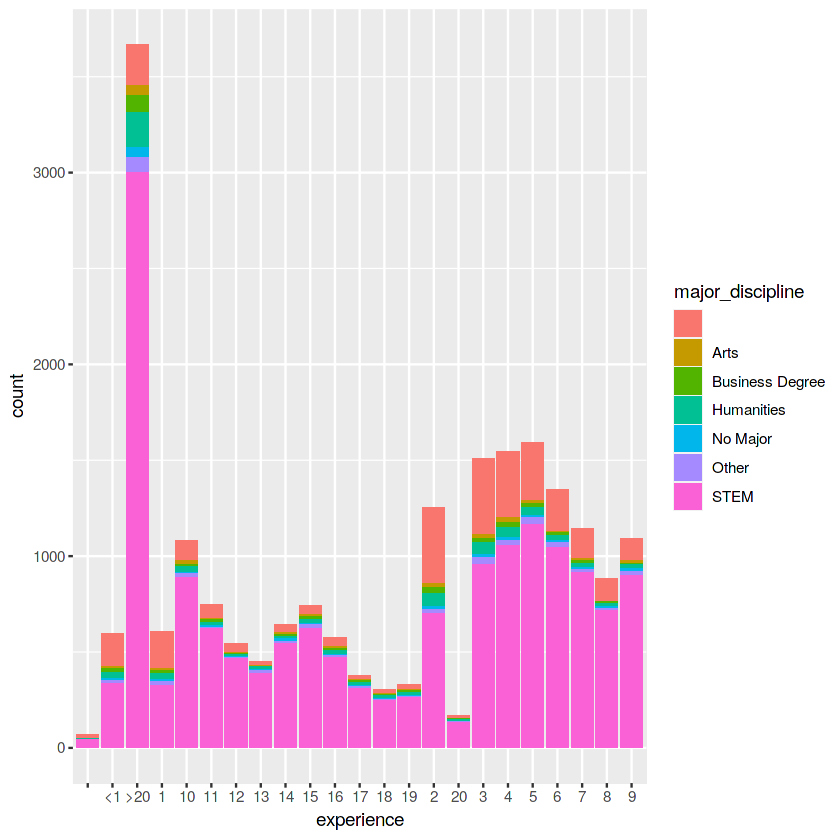

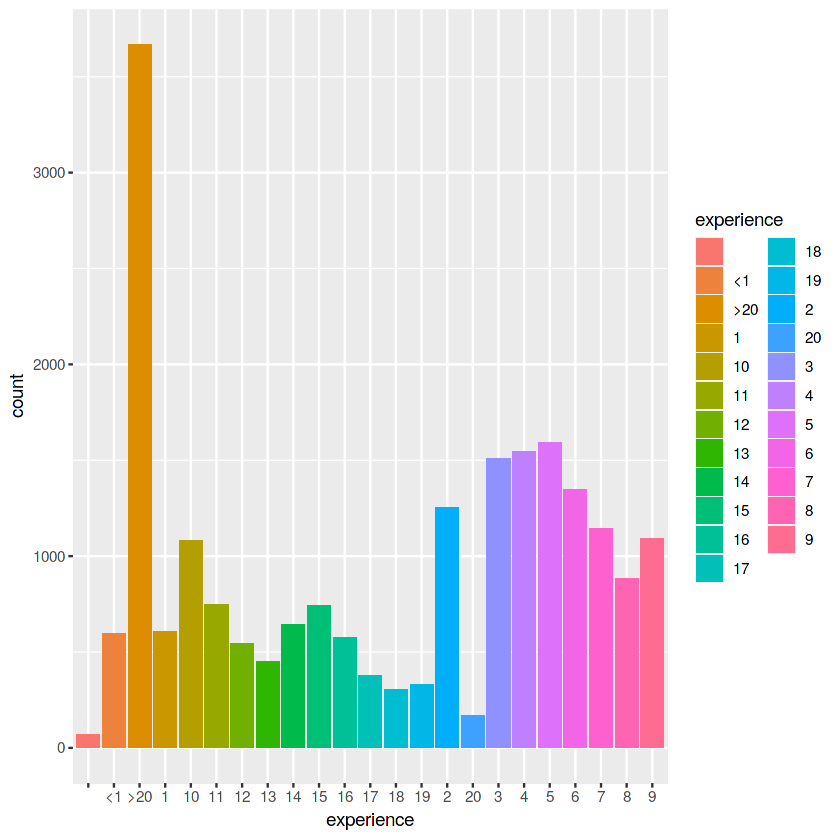

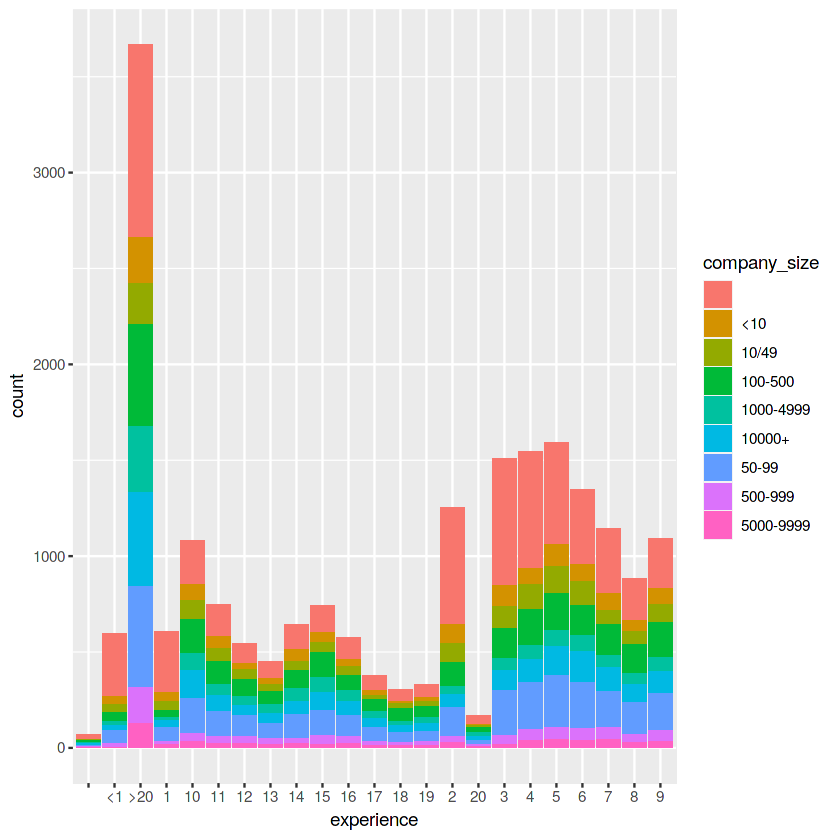

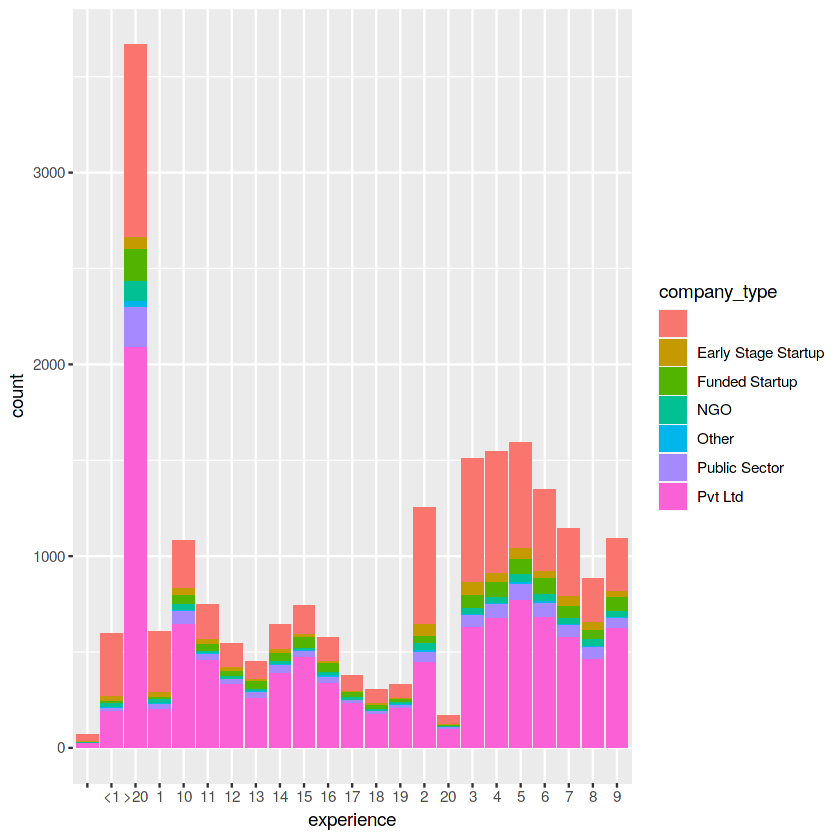

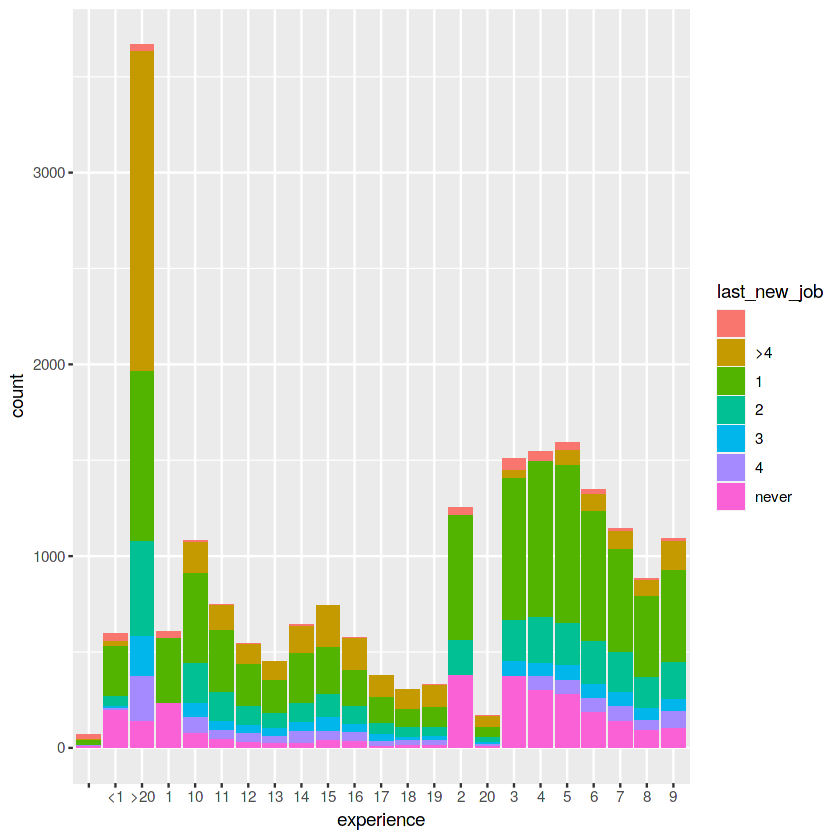

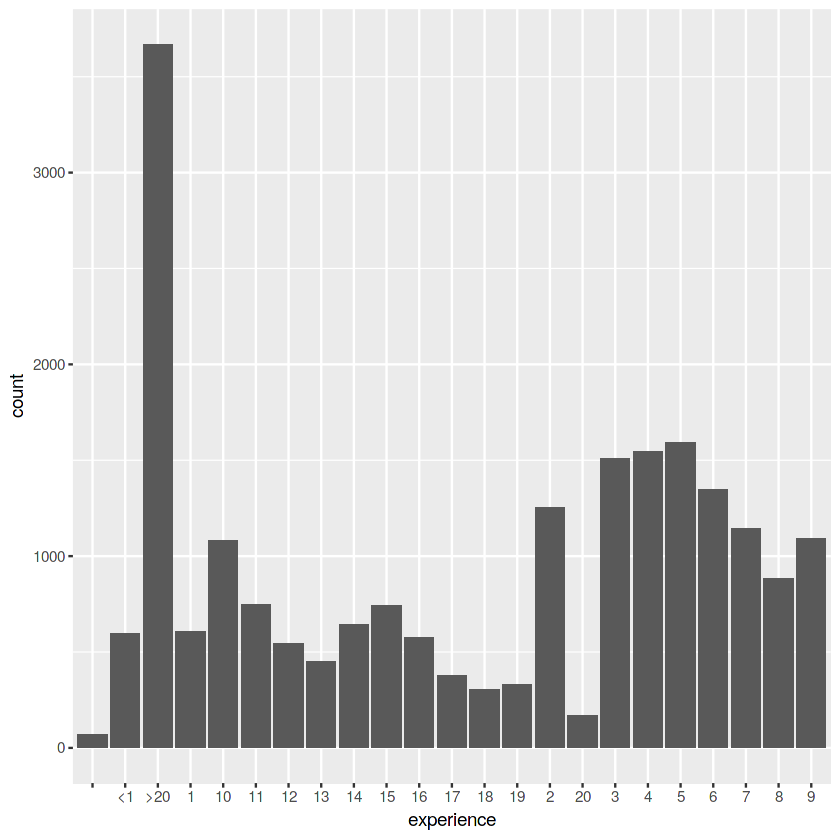

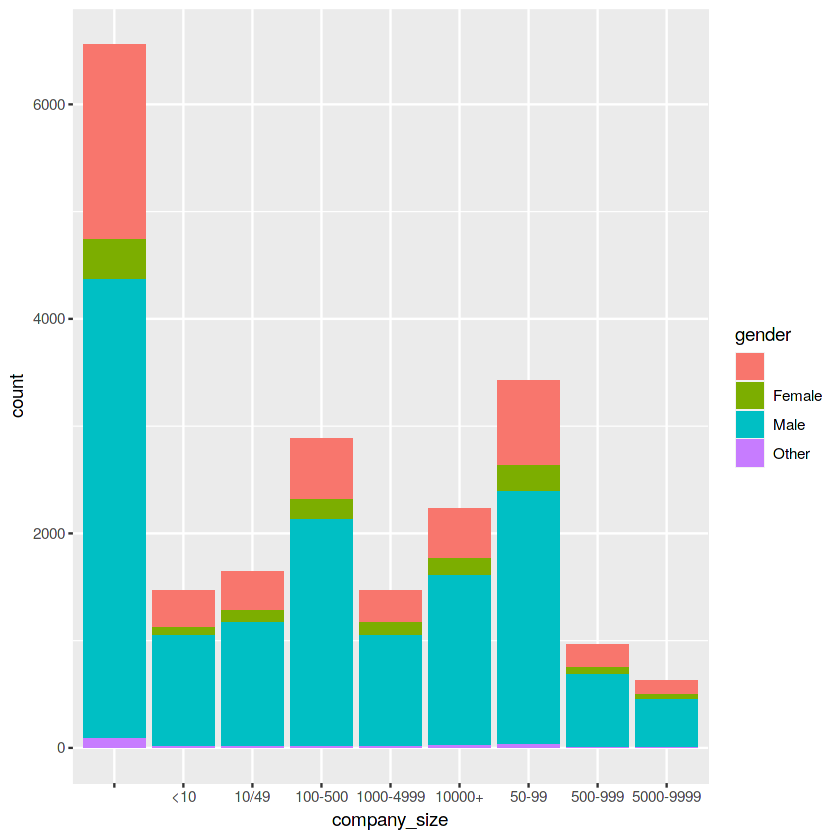

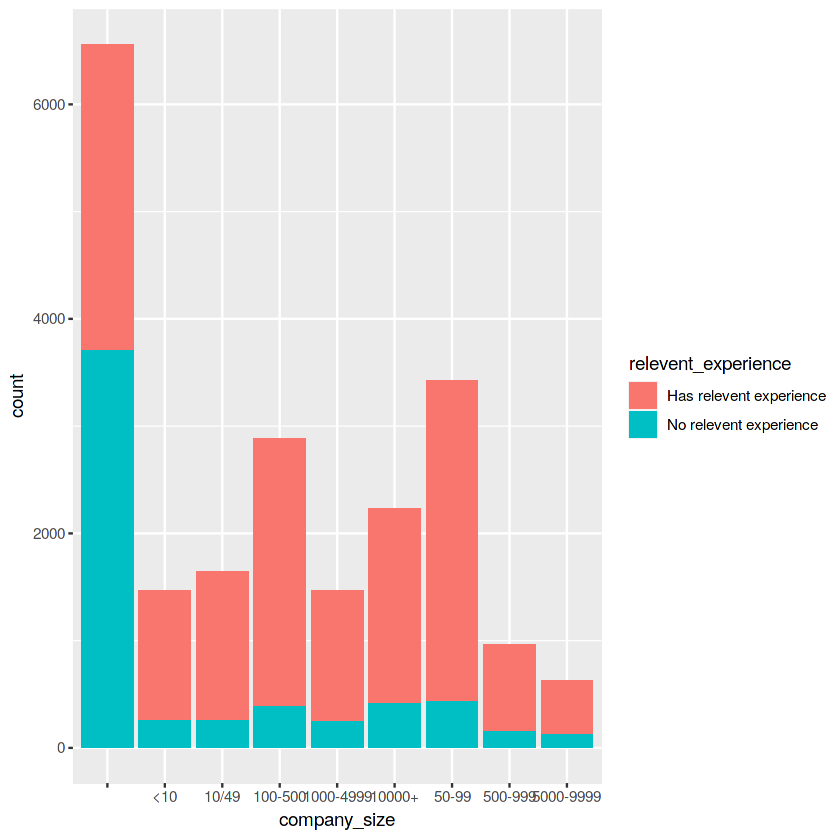

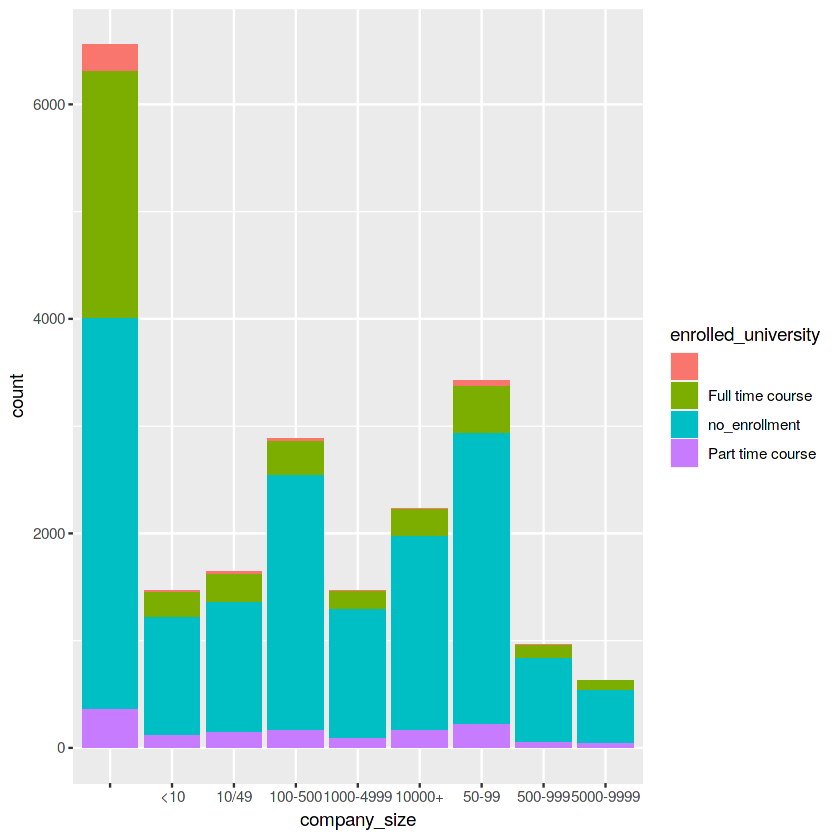

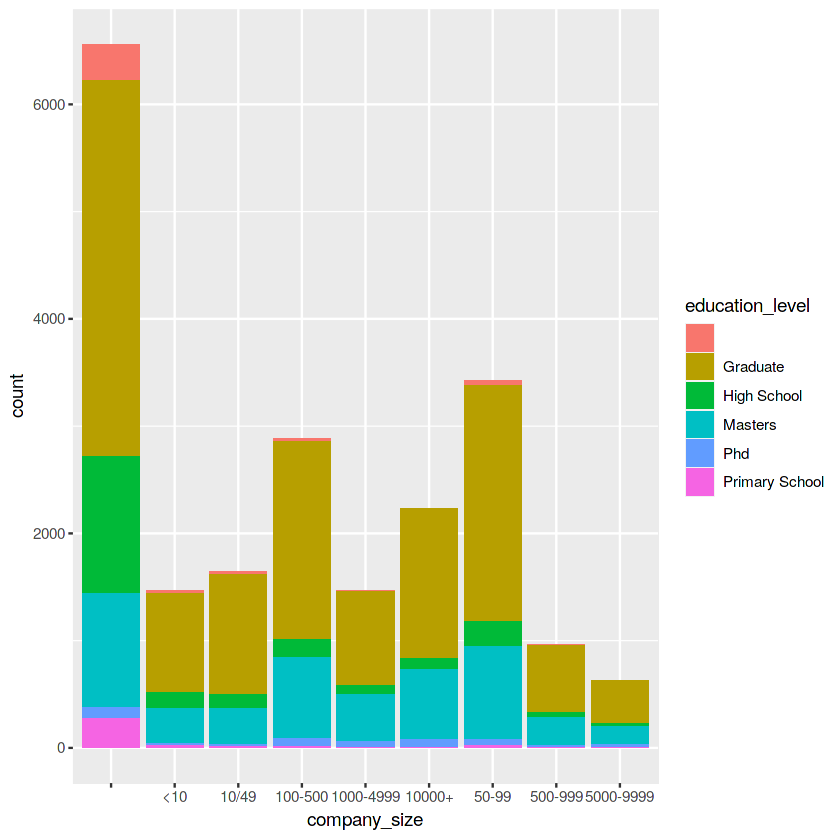

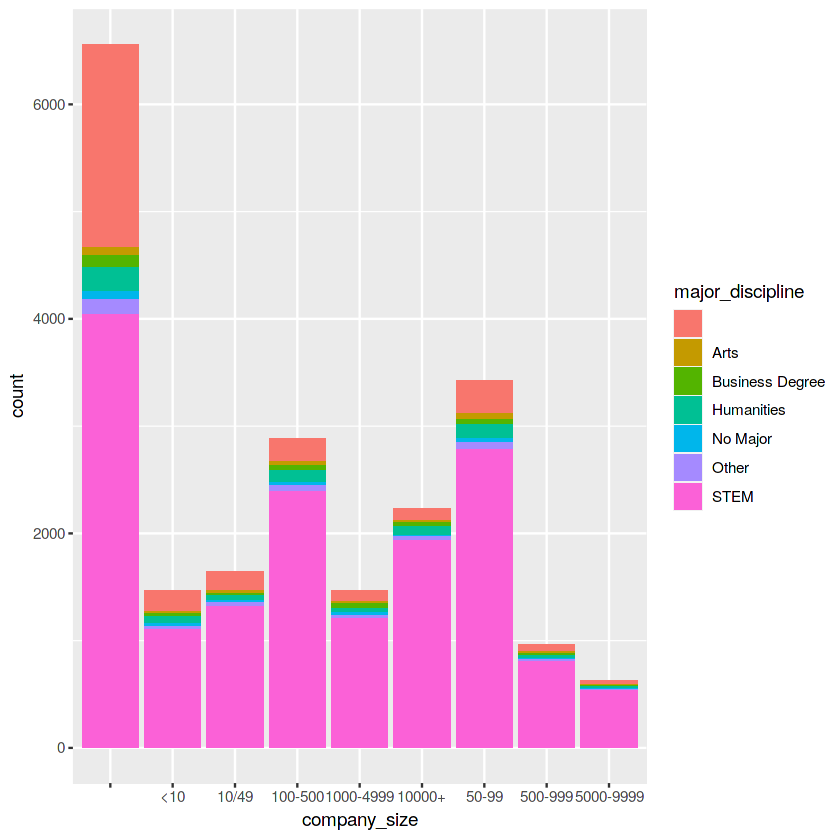

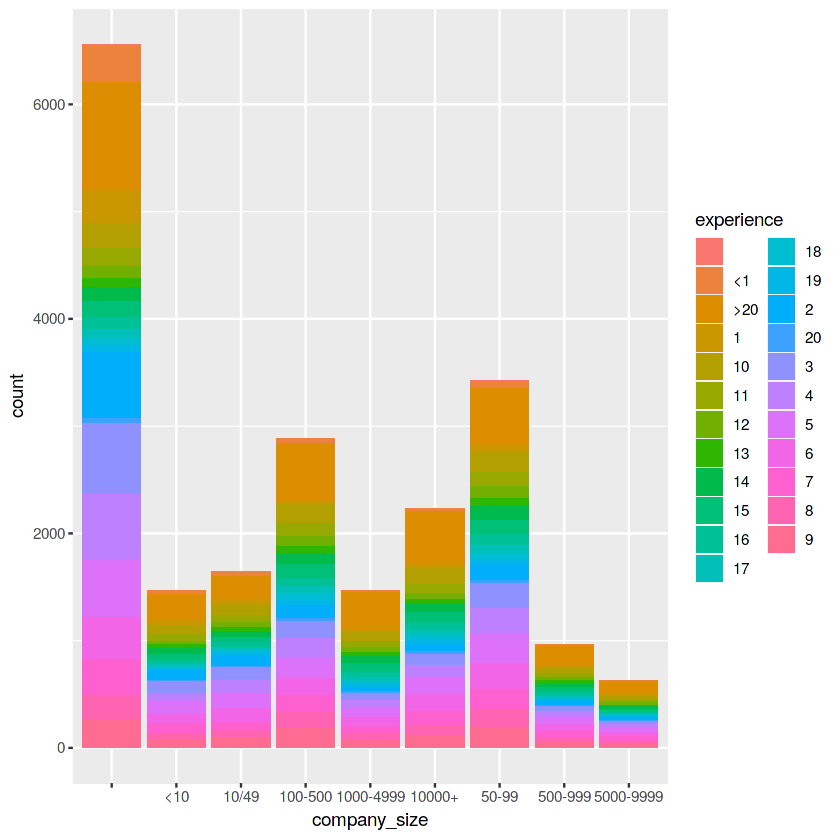

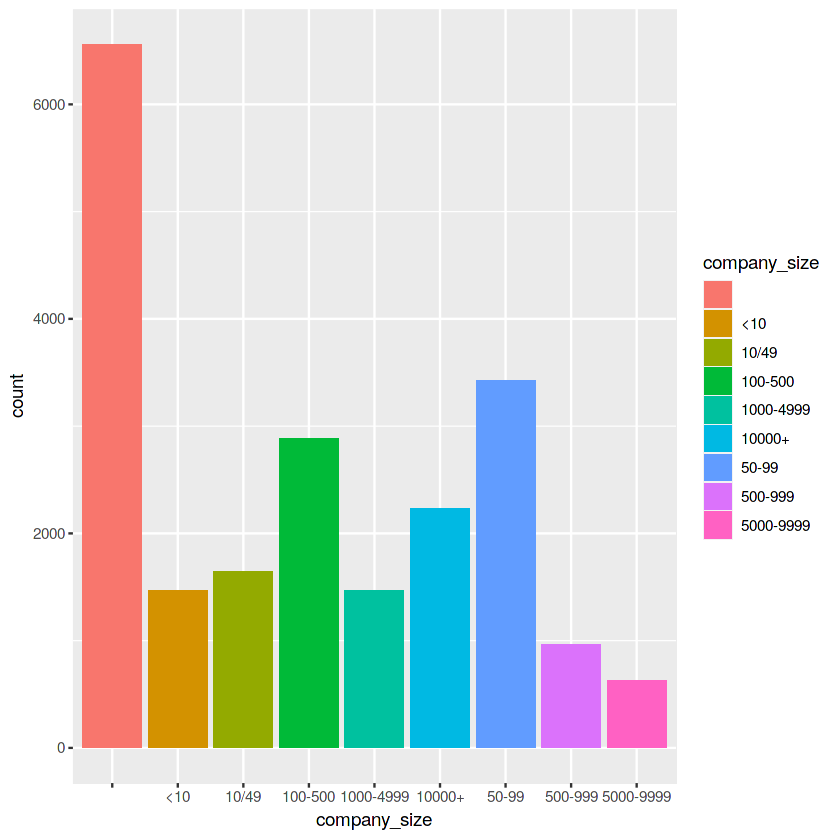

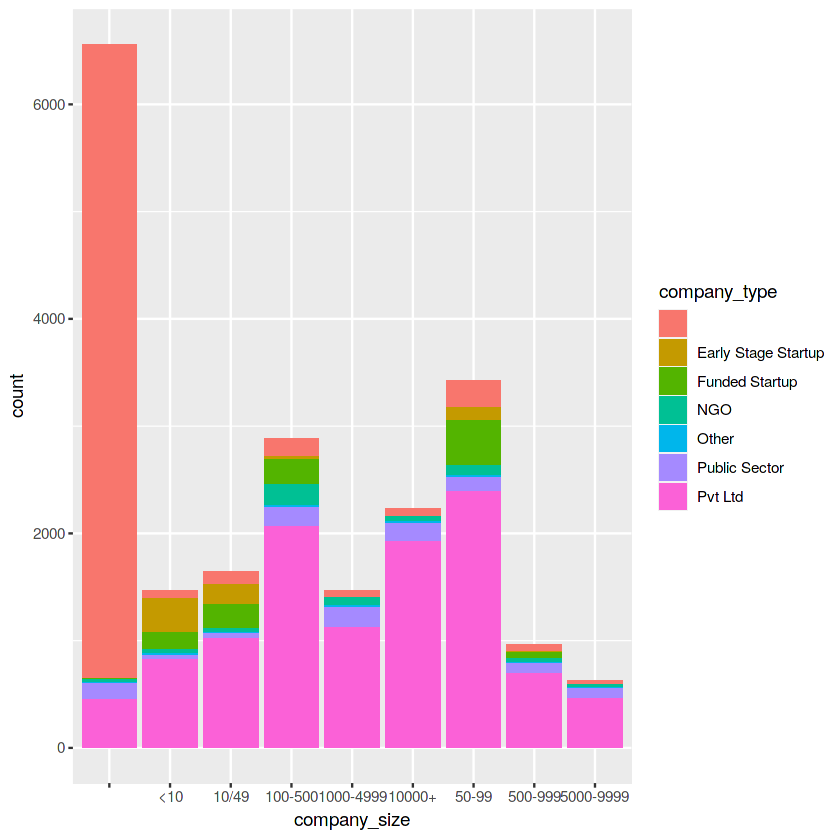

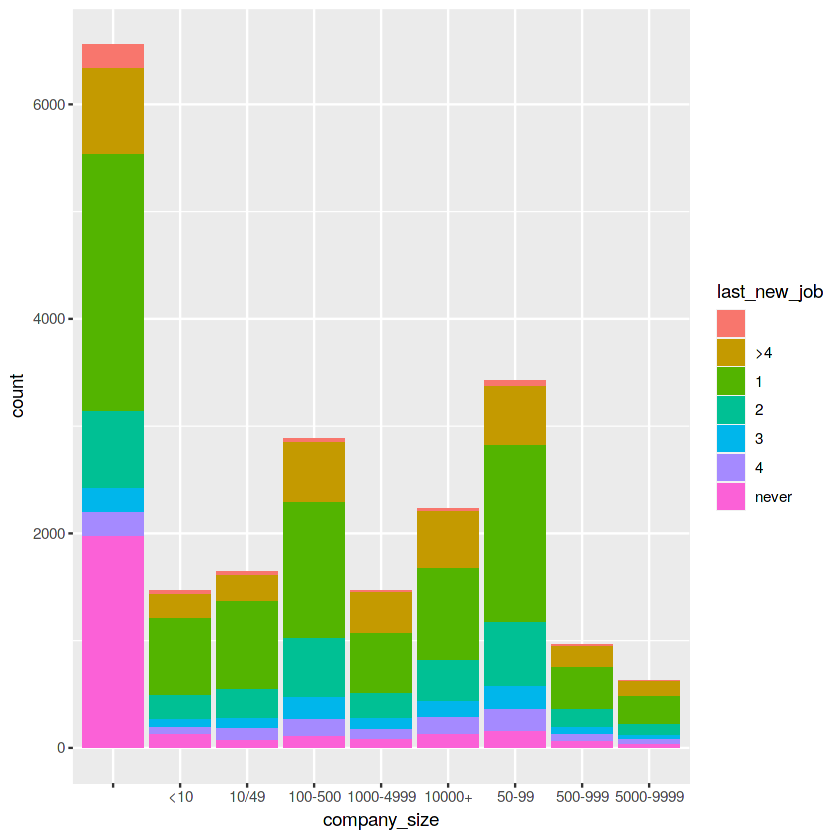

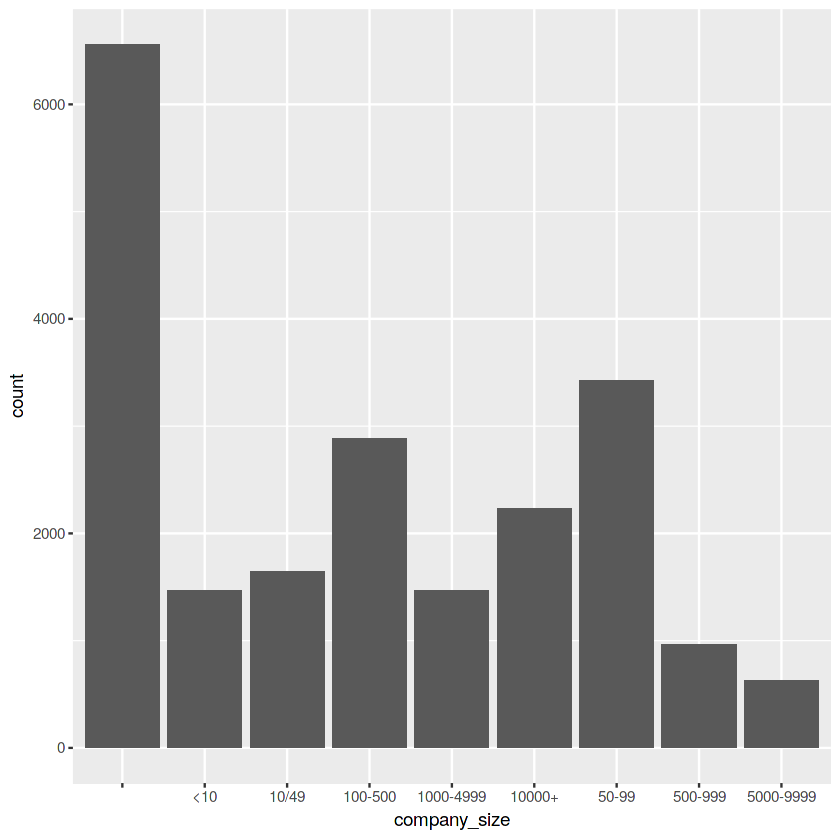

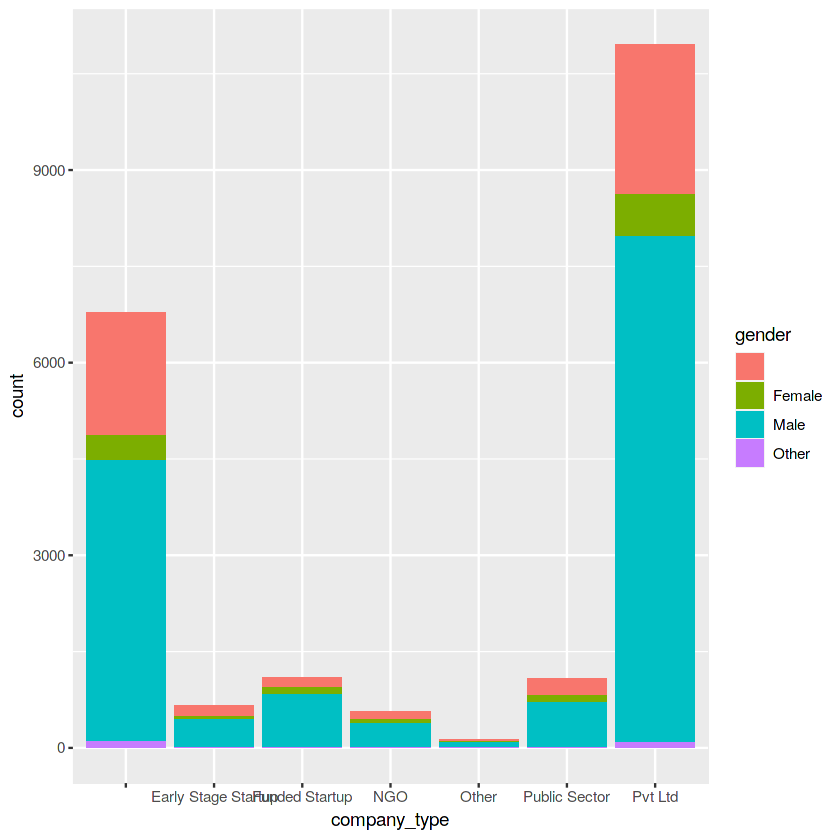

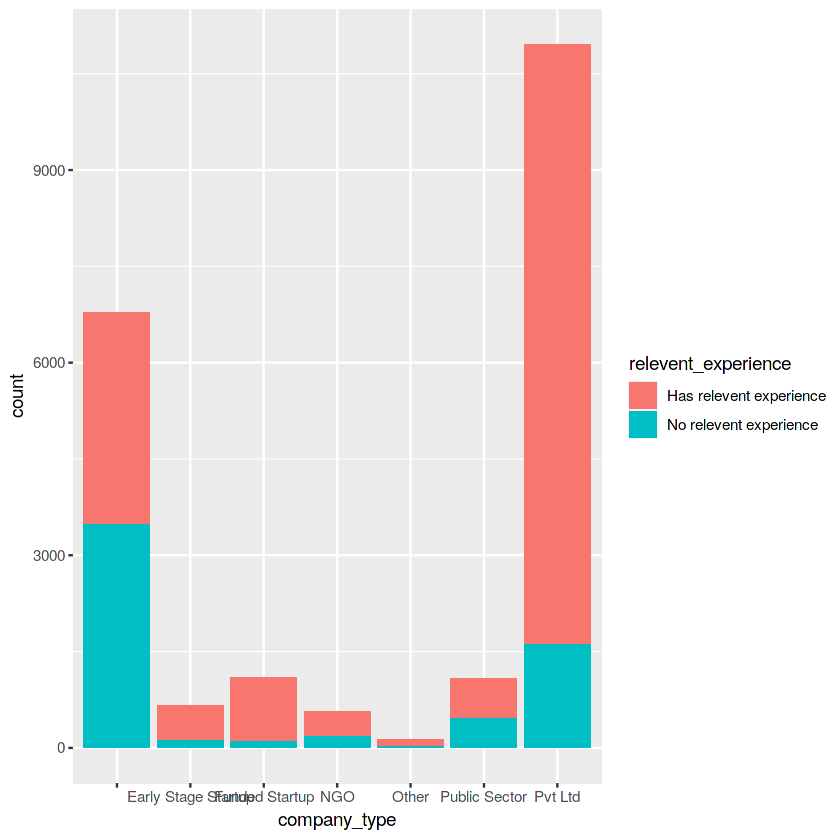

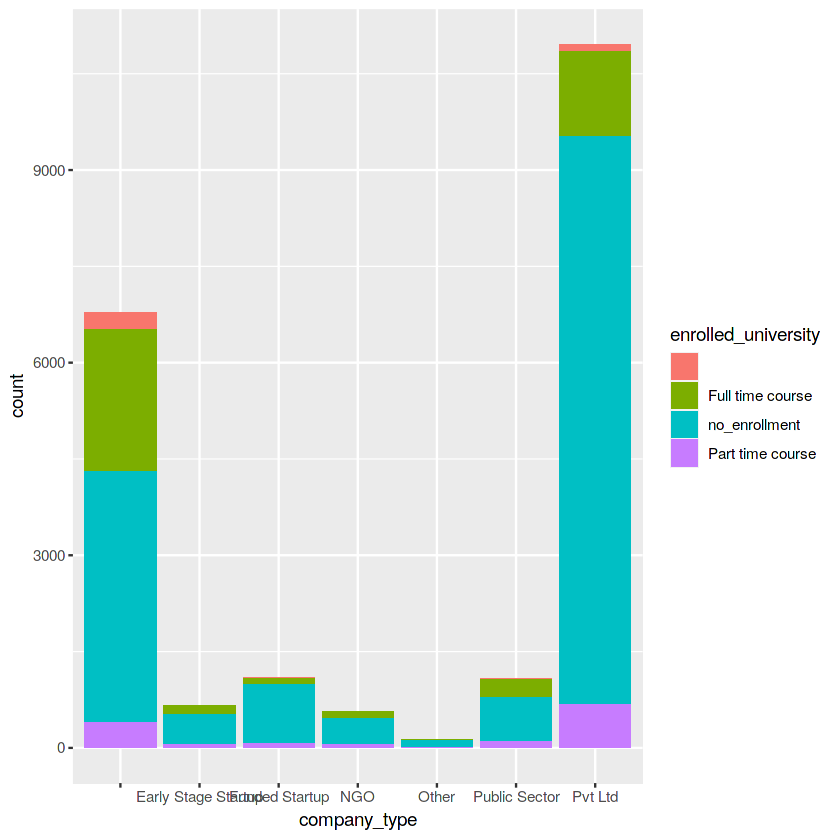

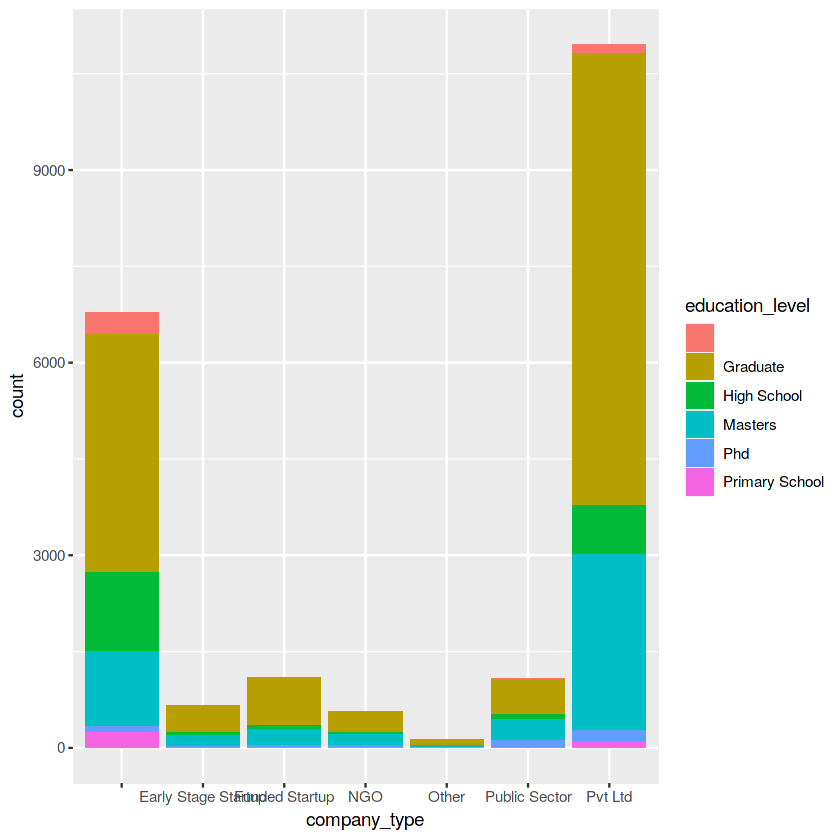

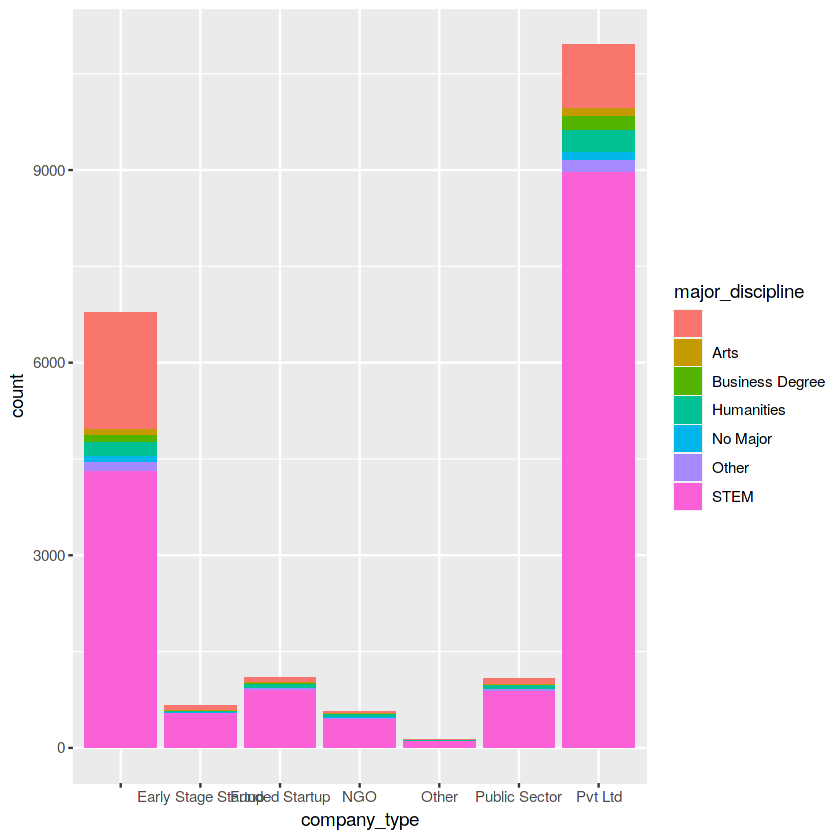

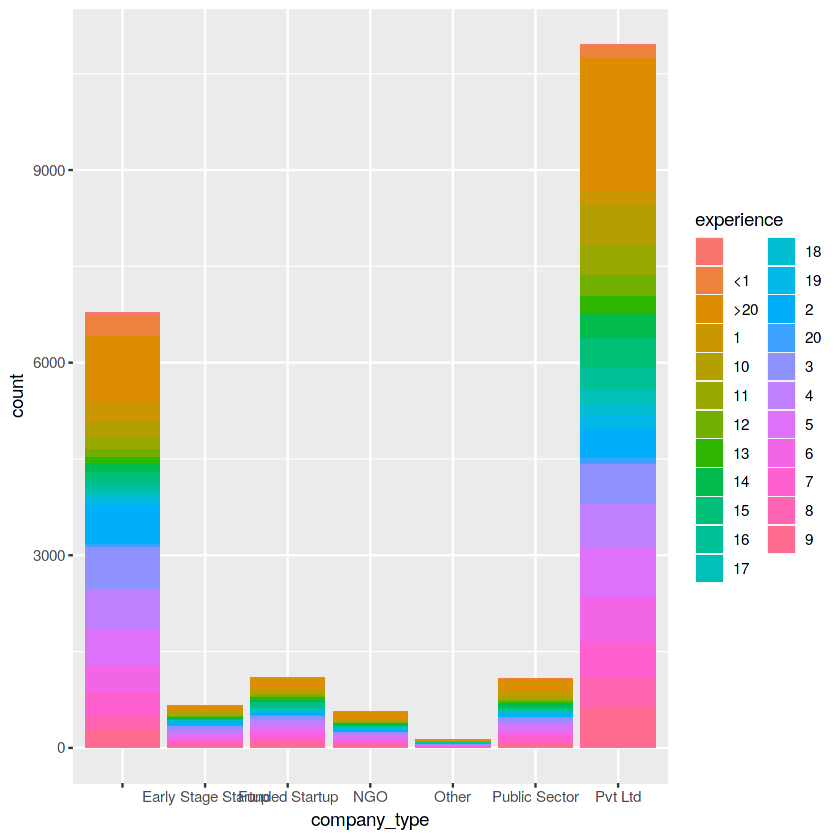

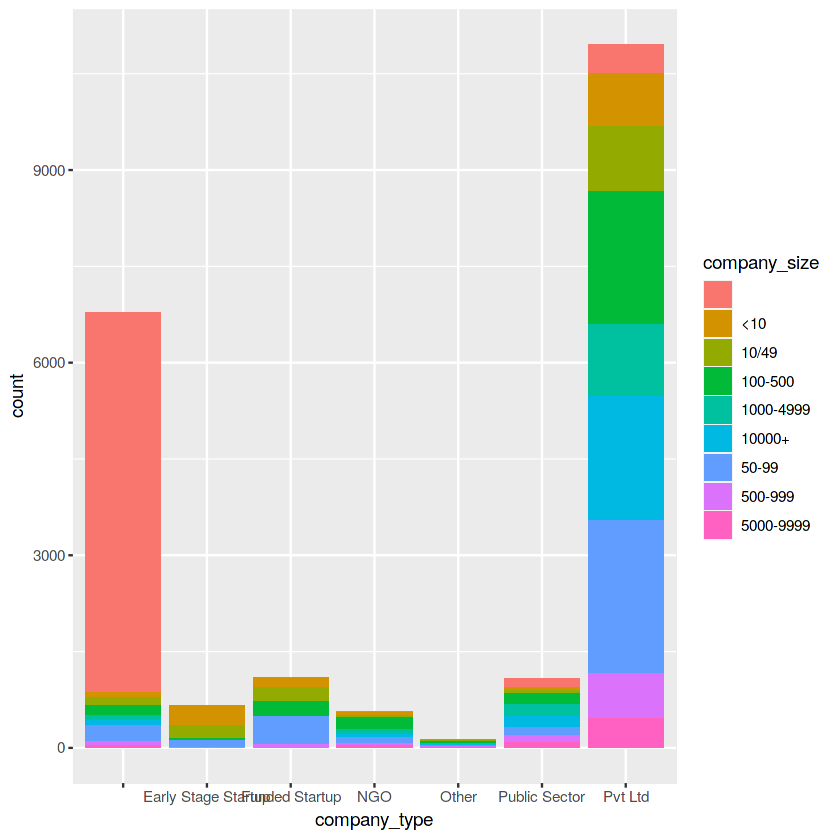

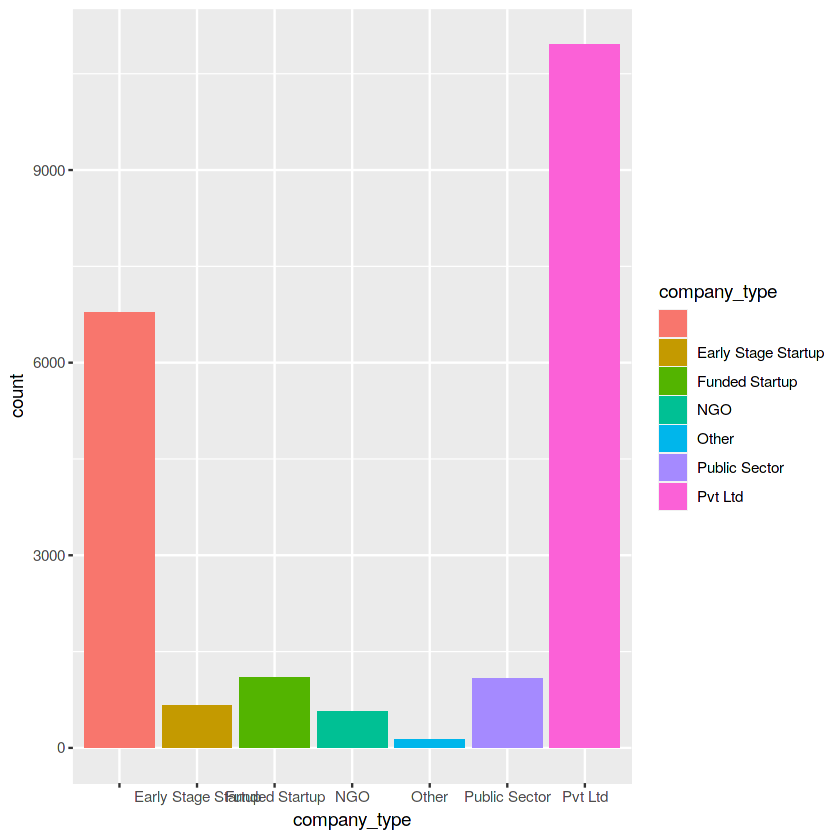

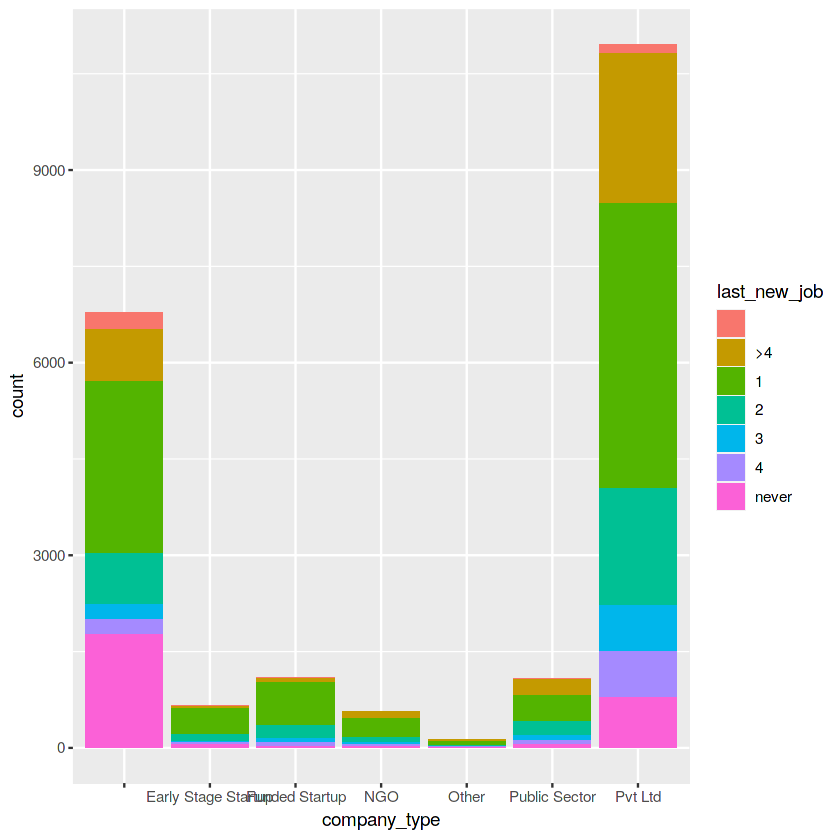

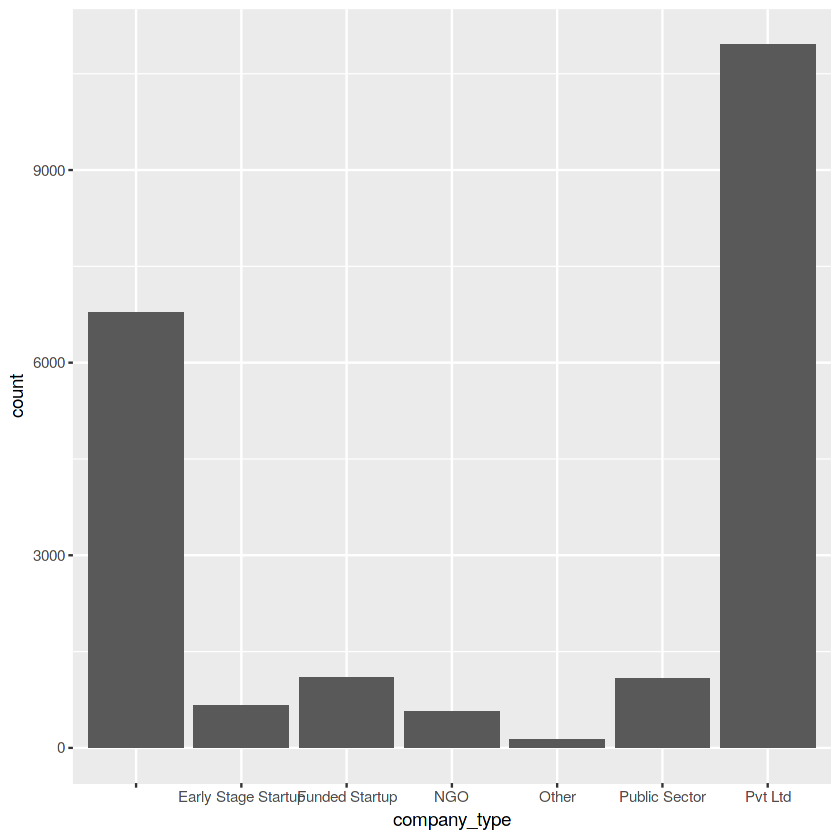

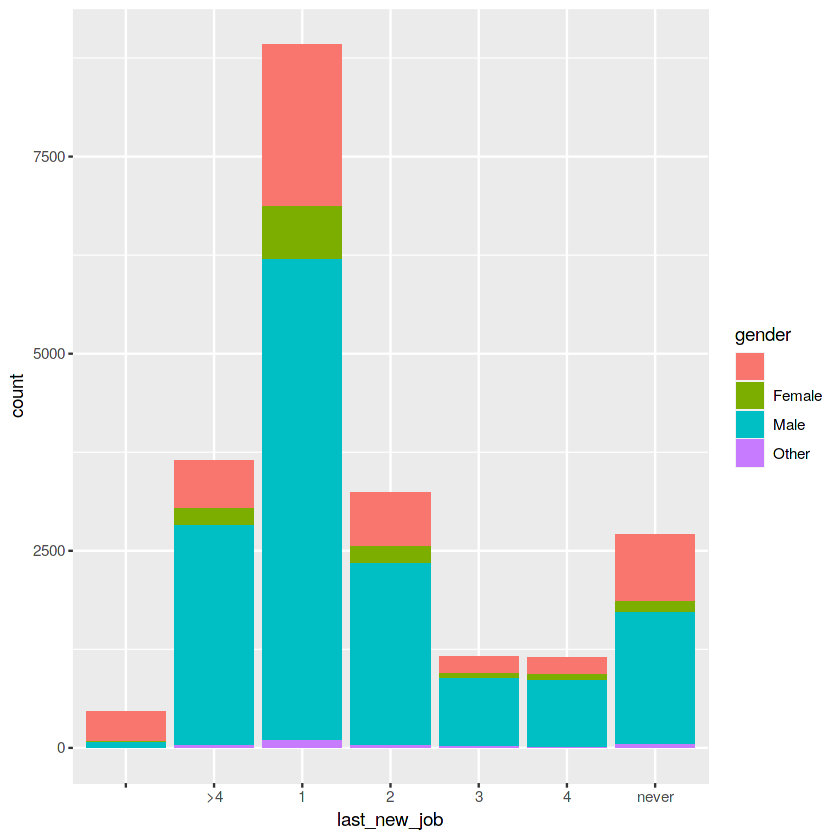

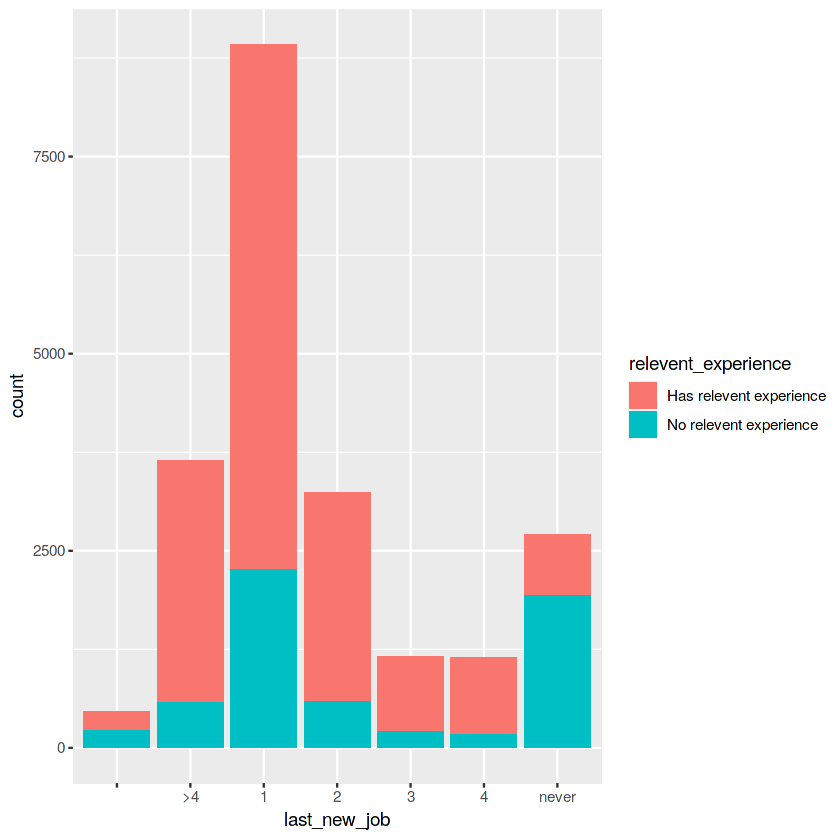

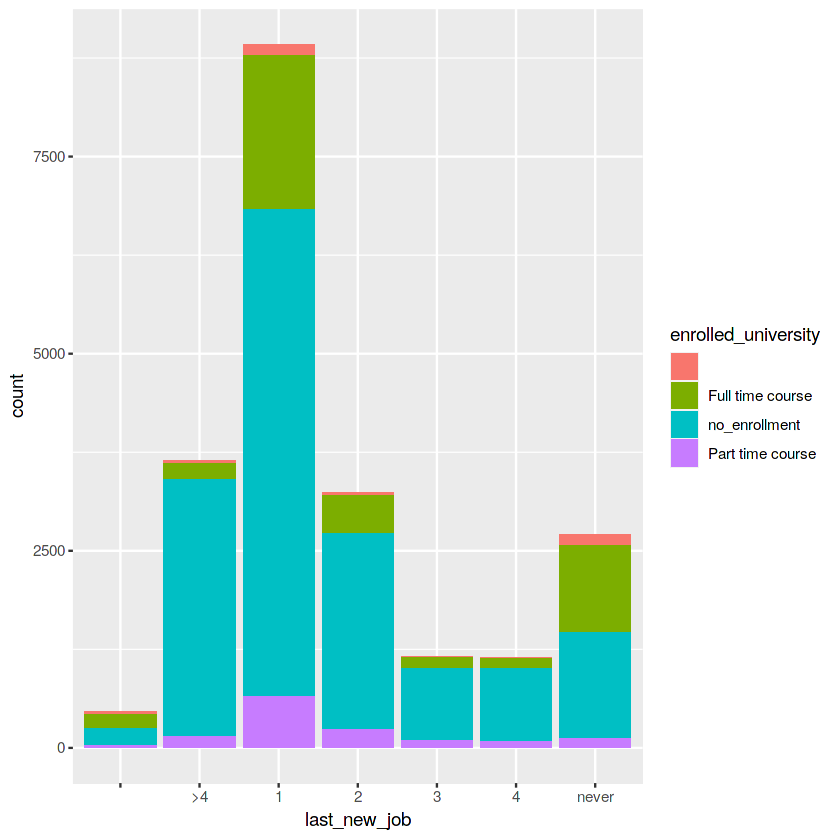

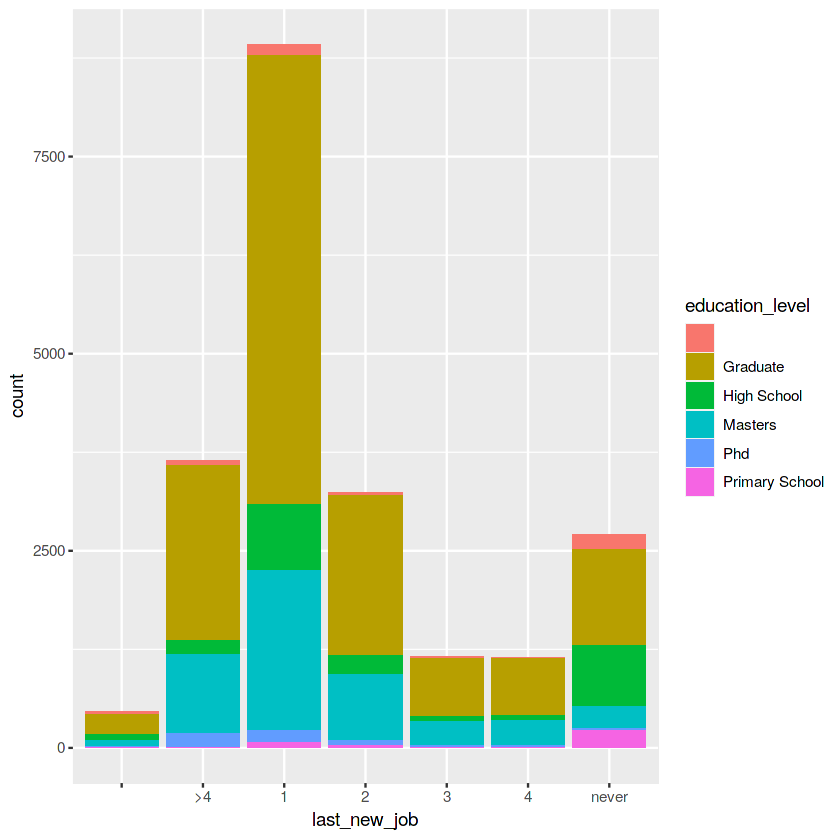

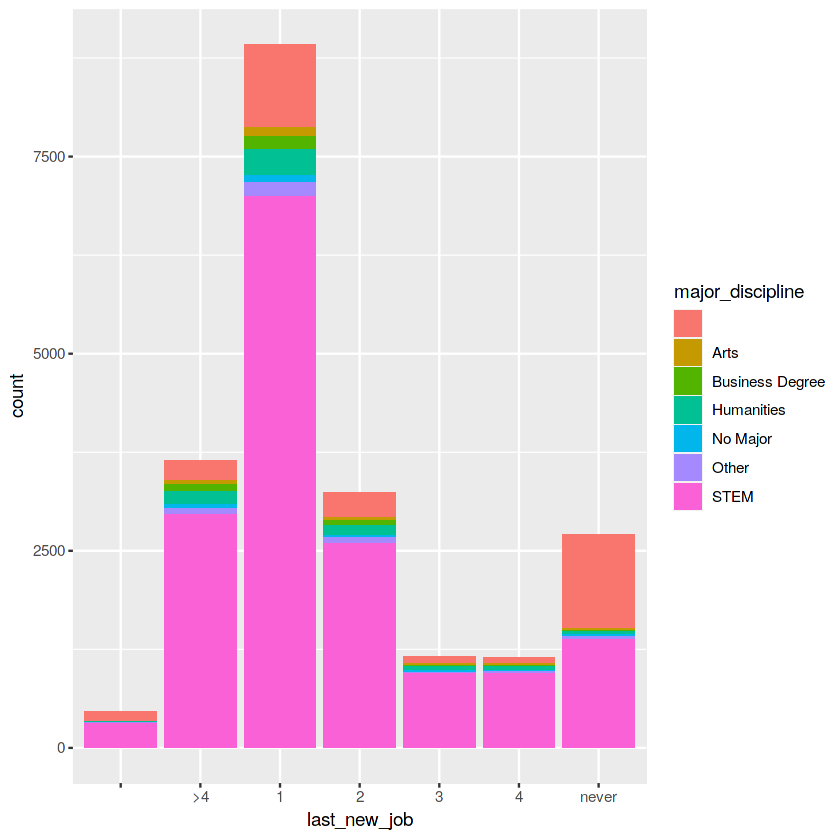

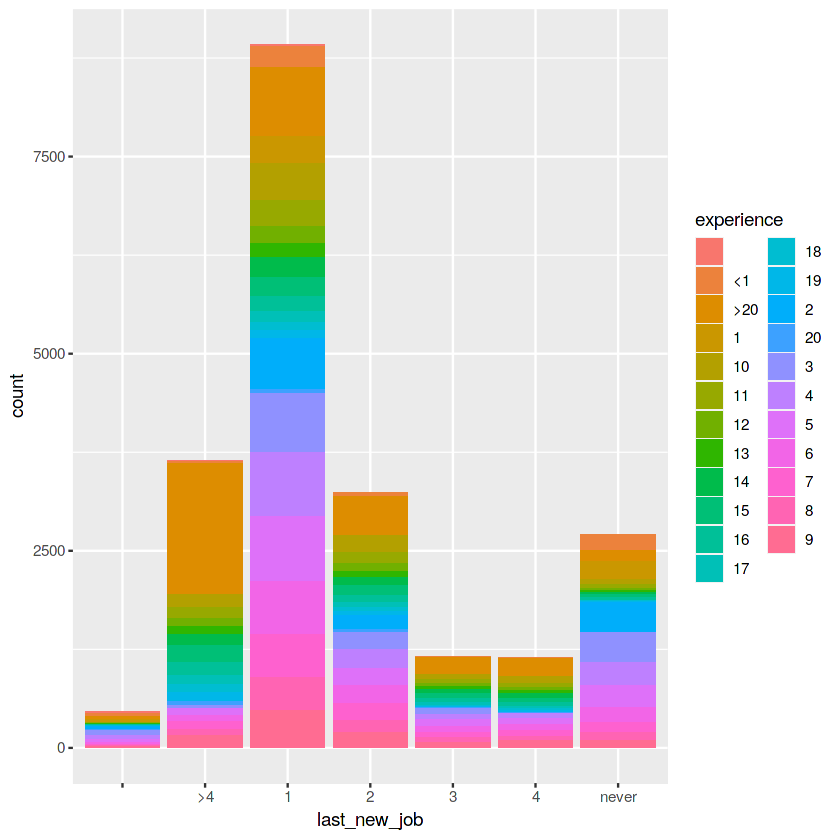

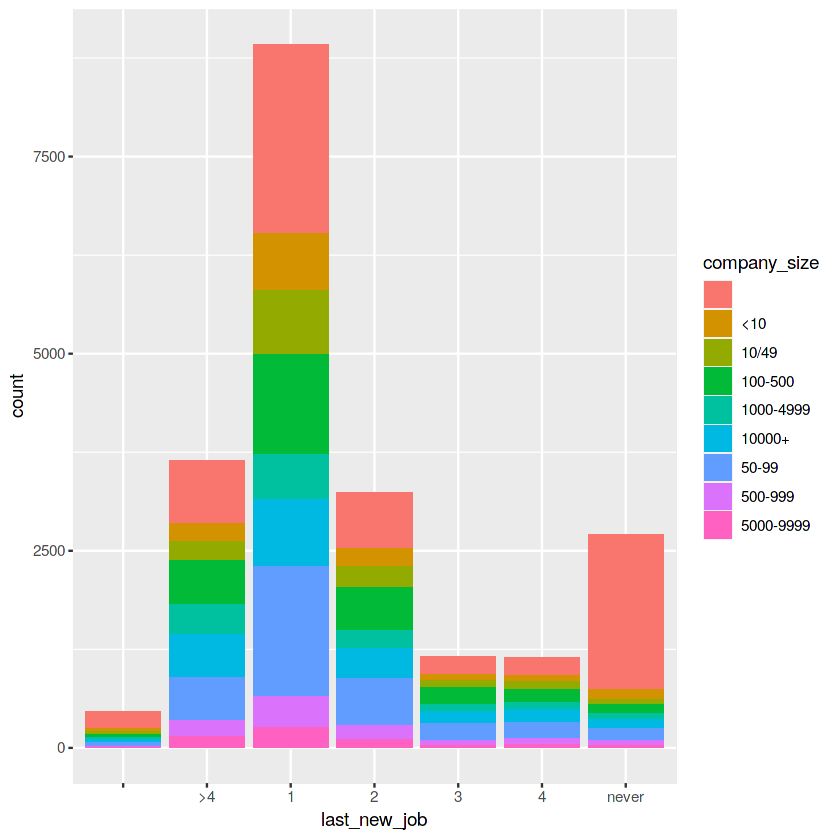

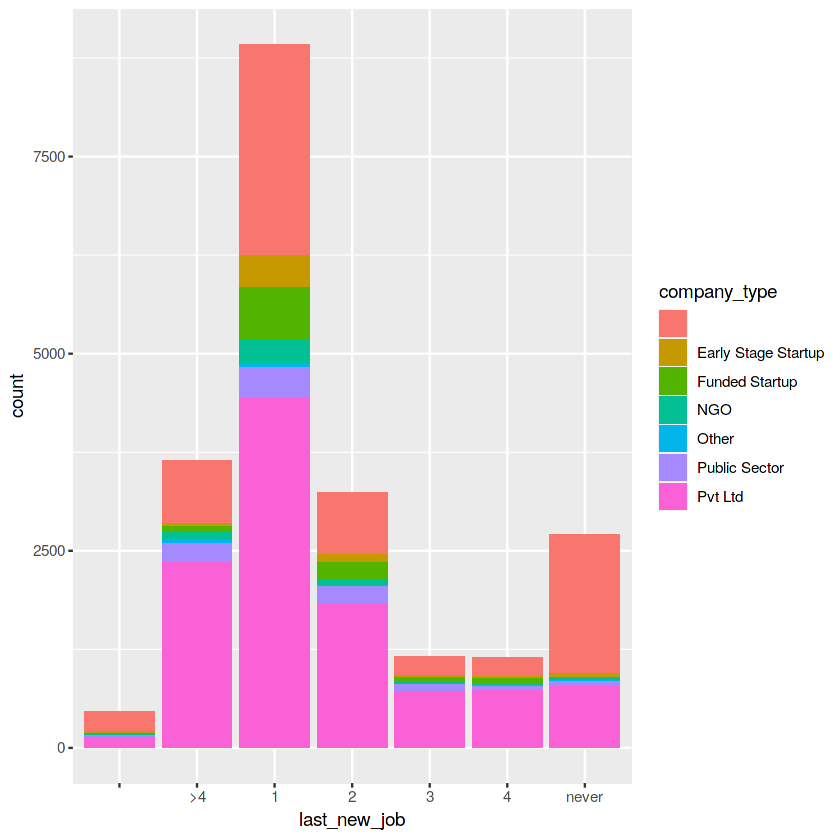

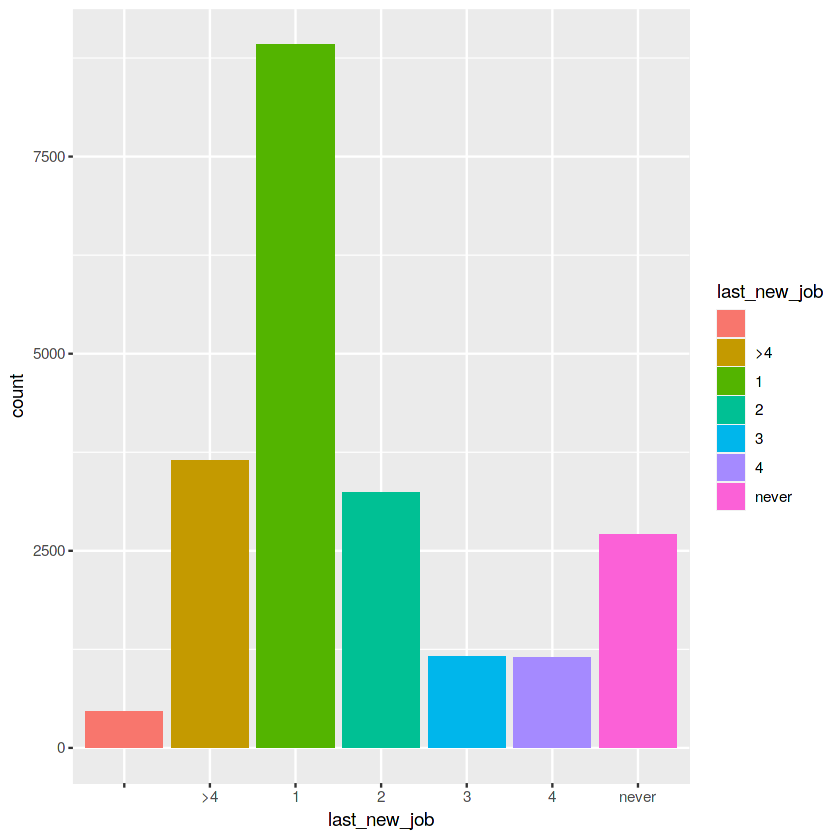

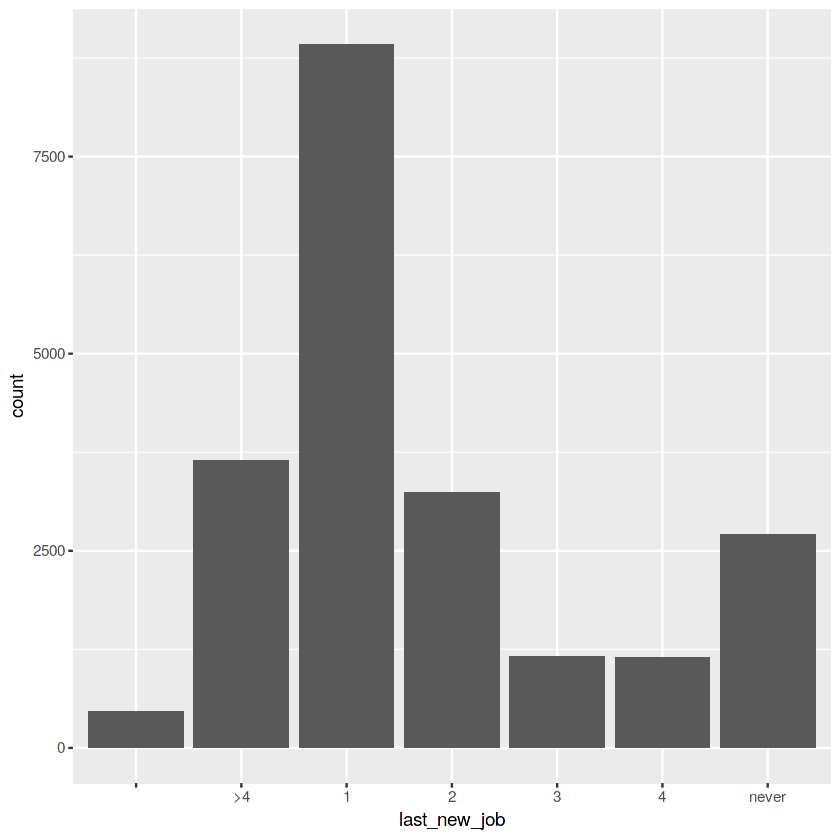

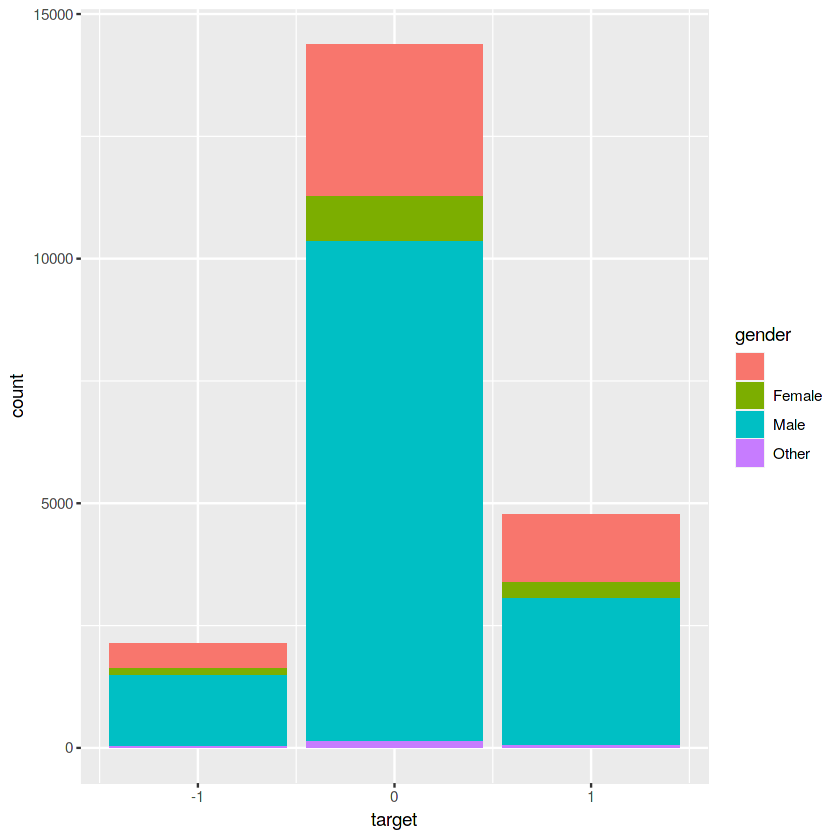

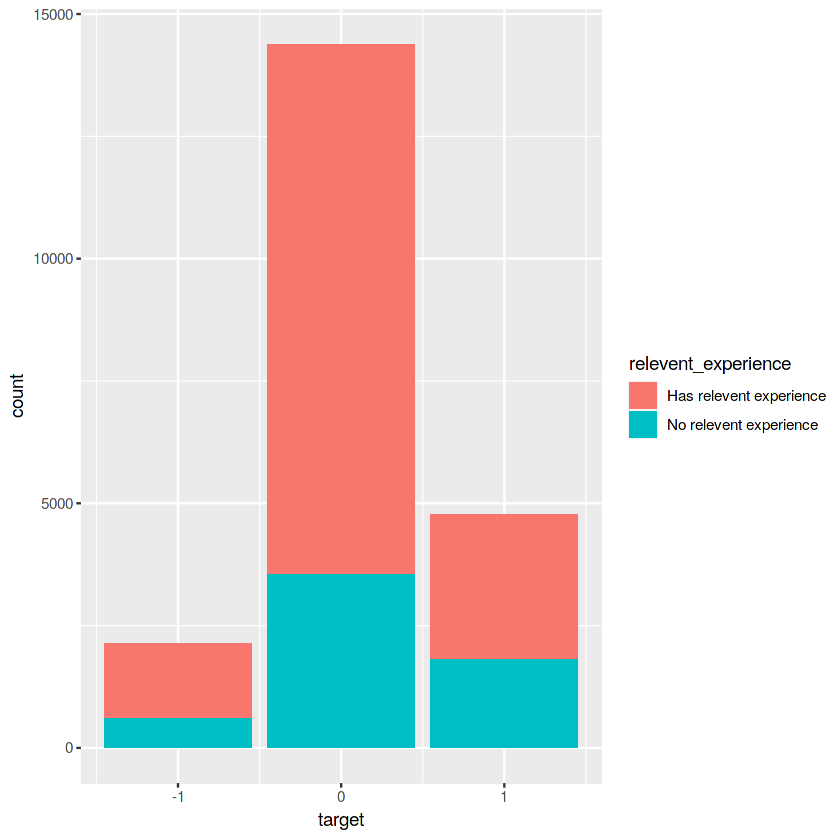

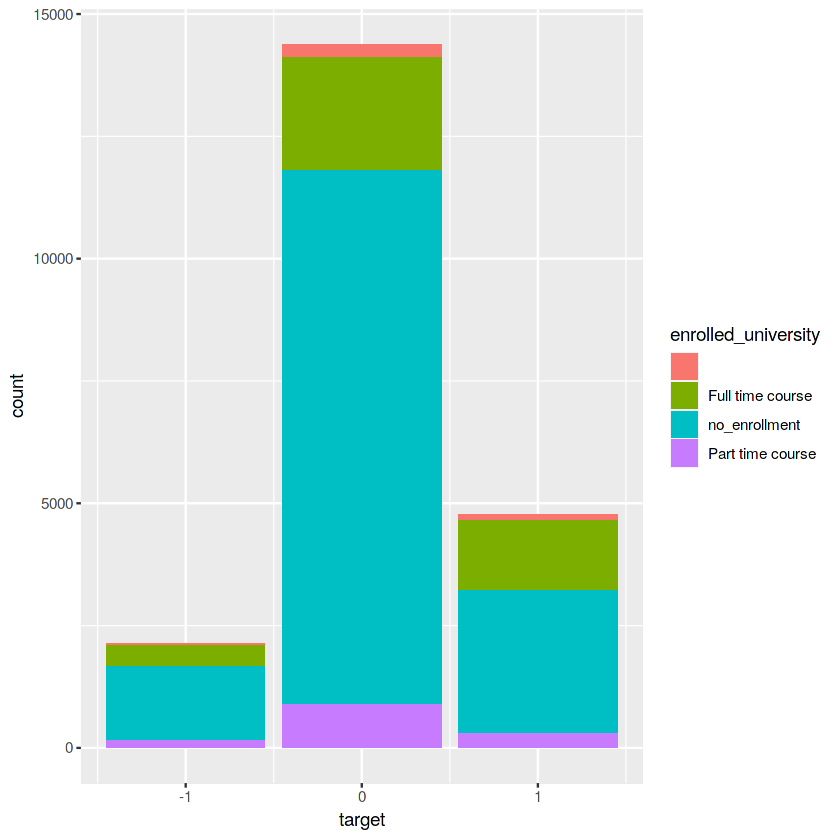

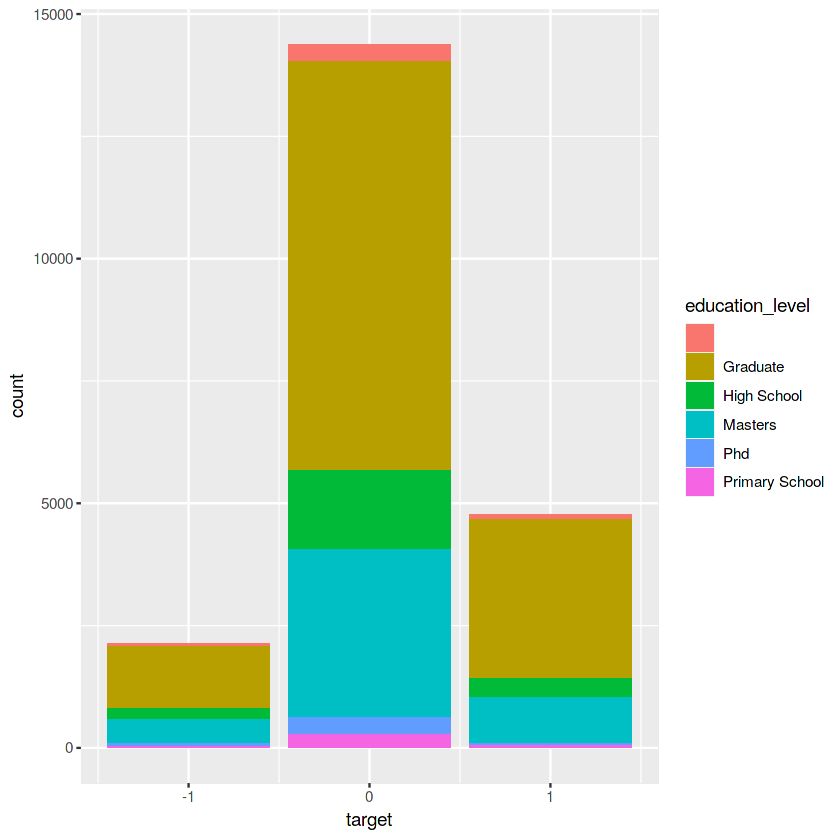

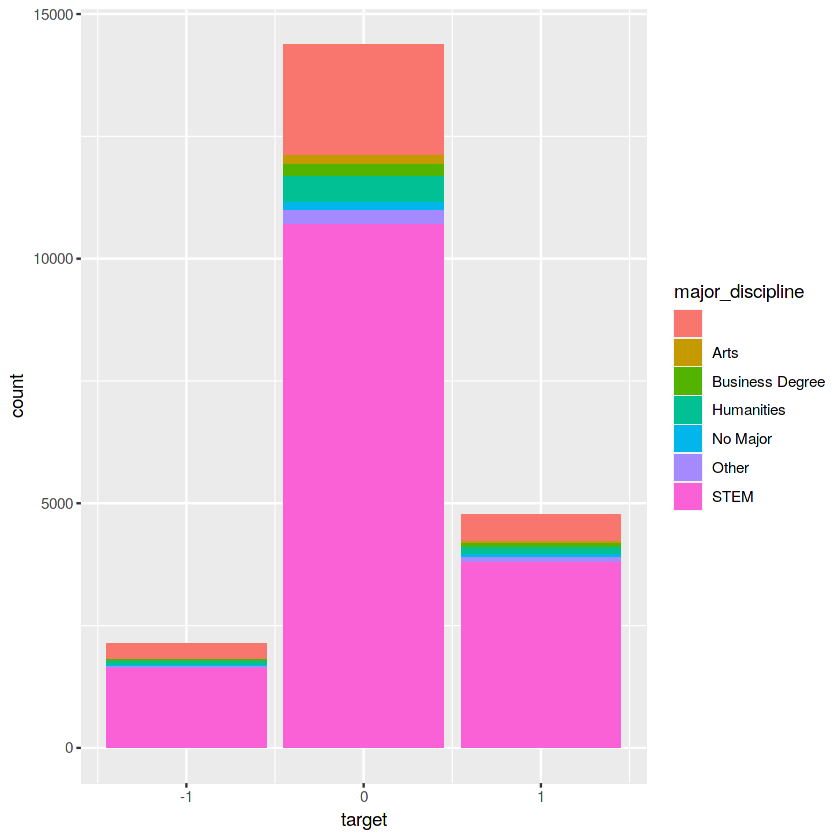

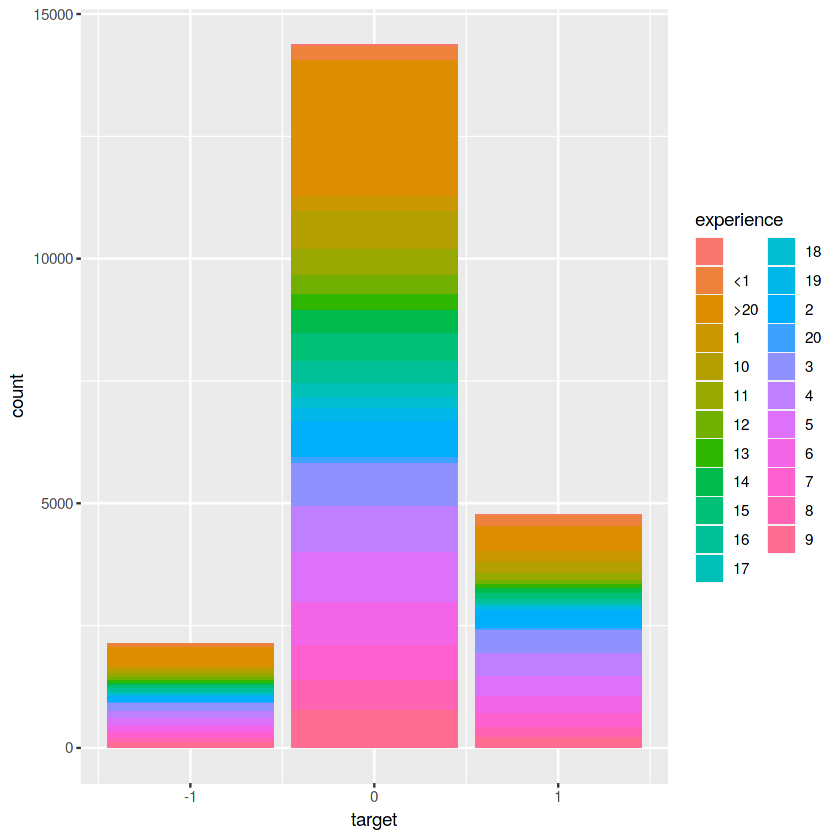

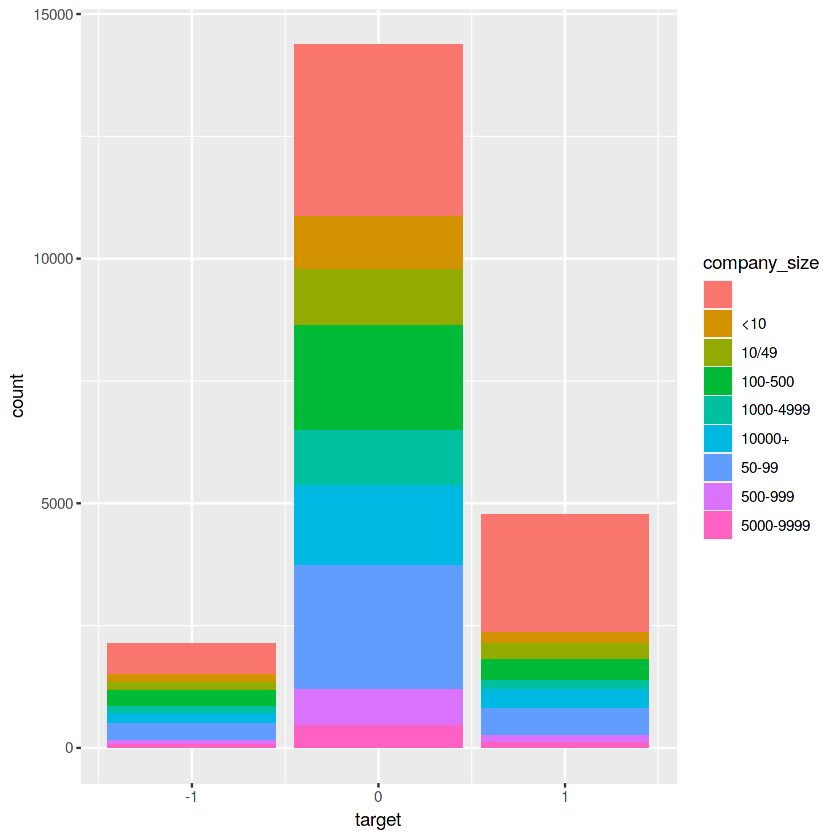

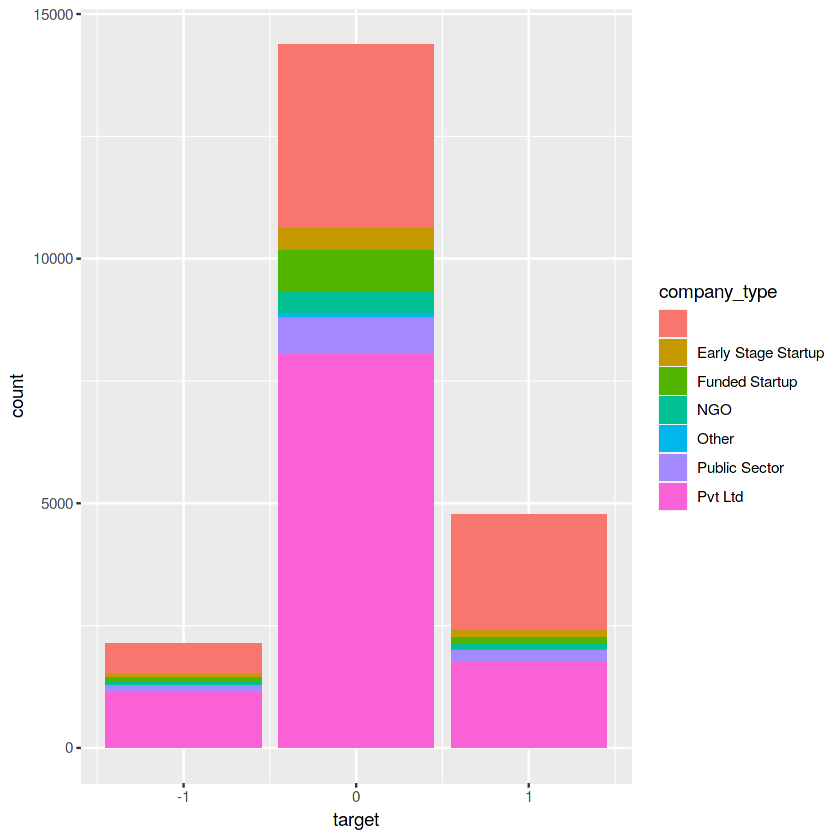

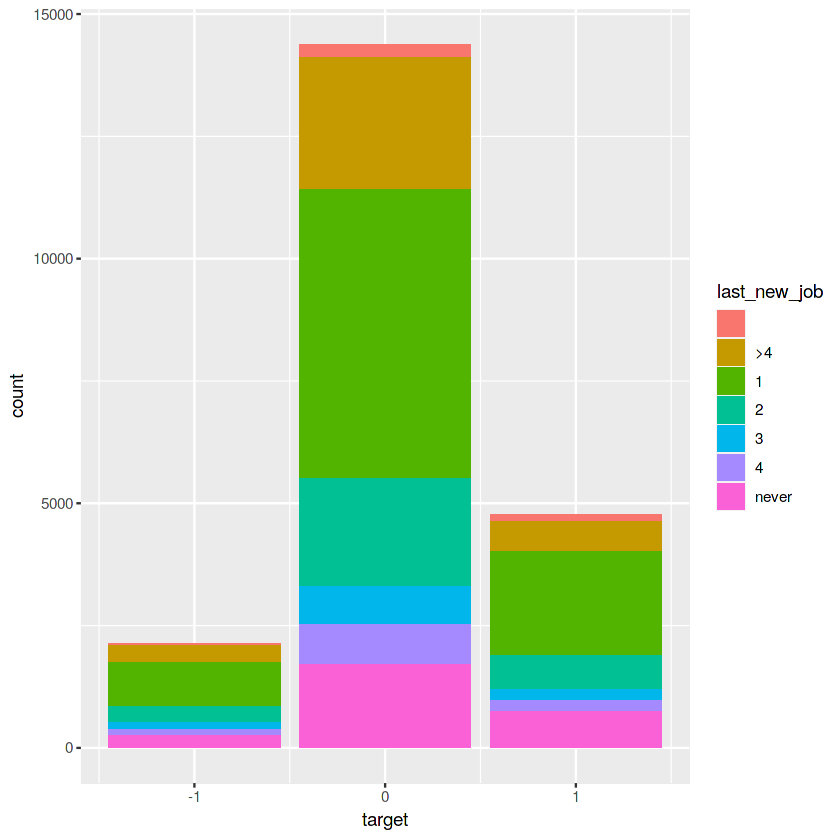

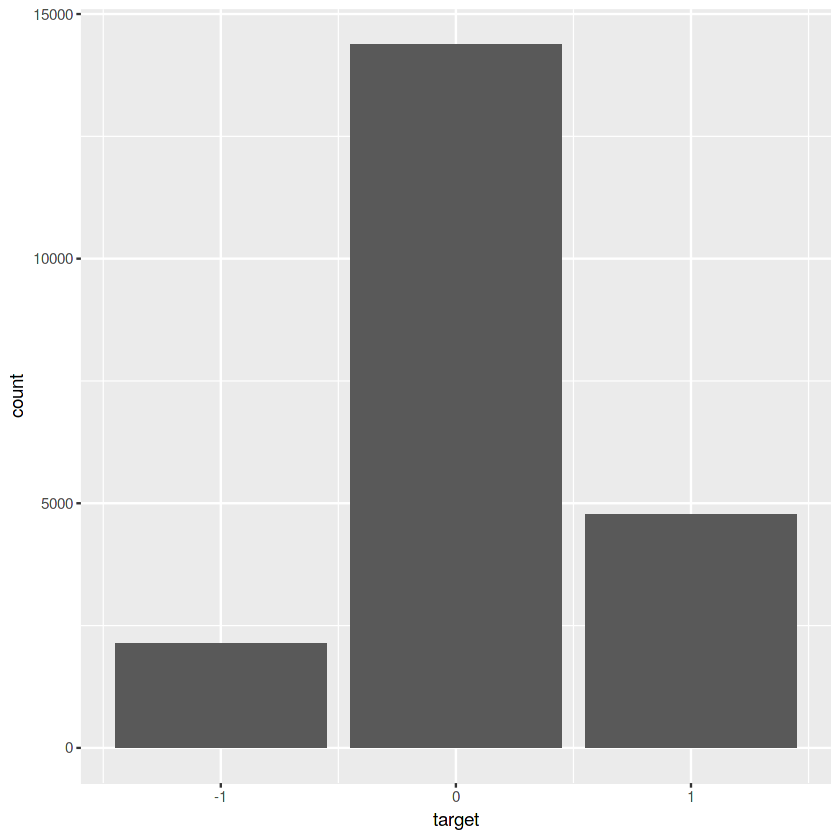

In [21]:
categorical_cols<- colnames(data[-c(1,2,3,13)])
for (i in categorical_cols)
{
    for (o in categorical_cols)
    {
        plots= ggplot(data,aes(.data[[i]],fill=.data[[o]]))+geom_bar()
        print(plots)
}    
}

In [22]:

for (i in categorical_cols){
    
    data[[i]]<-as.character(data[[i]])

}

In [23]:
str(data)

'data.frame':	21287 obs. of  14 variables:
 $ enrollee_id           : int  8949 29725 11561 33241 666 21651 28806 402 27107 699 ...
 $ city                  : Factor w/ 123 levels "city_1","city_10",..: 6 78 65 15 51 58 50 84 6 6 ...
 $ city_development_index: num  0.92 0.776 0.624 0.789 0.767 0.764 0.92 0.762 0.92 0.92 ...
 $ gender                : chr  "Male" "Male" "" "" ...
 $ relevent_experience   : chr  "Has relevent experience" "No relevent experience" "No relevent experience" "No relevent experience" ...
 $ enrolled_university   : chr  "no_enrollment" "no_enrollment" "Full time course" "" ...
 $ education_level       : chr  "Graduate" "Graduate" "Graduate" "Graduate" ...
 $ major_discipline      : chr  "STEM" "STEM" "STEM" "Business Degree" ...
 $ experience            : chr  ">20" "15" "5" "<1" ...
 $ company_size          : chr  "" "50-99" "" "" ...
 $ company_type          : chr  "" "Pvt Ltd" "" "Pvt Ltd" ...
 $ last_new_job          : chr  "1" ">4" "never" "never" ...
 $ t

In [24]:
data[data==">20"] <- "21"
data[data =="<1"] <- "0"
data[data==">4"] <- "5"
data[data=="<10"] <- "0-9"
data[data==""] <- "NONE"
data[data=="never"]<- "0"
data$last_new_job[data$last_new_job=="NONE"]<- "0"

data$experience[data$experience=="NONE"]<- '0'
data[data=="10/49"]<- "10-49"


for (i in categorical_cols)
{
    data[[i]]<- as.factor(data[[i]])

}

In [25]:
data$experience<- as.double(data$experience)
data$last_new_job<- as.double(data$last_new_job)

levels(data$company_size)<- c("NONE","0-9","10-49","50-99","100-500","500-999","1000-4999","5000-9999","10000+")
levels(data$education_level)<- c("NONE","Primary School","High School","Graduate","Masters","Phd")
levels(data$enrolled_university)<- c("NONE","no_enrollment","Part time course","Full time course")
levels(data$relevent_experience)<- c("No relevent experience","Has relevent experience")

In [26]:
for (i in categorical_cols){
        print(c(i,table(data[[i]]),levels(data[[i]])))
    }

           Female     Male     NONE    Other                            
"gender"   "1375"  "14681"   "5016"    "215" "Female"   "Male"   "NONE" 
         
 "Other" 
                             No relevent experience   Has relevent experience 
    "relevent_experience"                   "15316"                    "5971" 
                                                    
 "No relevent experience" "Has relevent experience" 
                                       NONE         no_enrollment 
"enrolled_university"                "4192"               "15336" 
     Part time course      Full time course                       
                "417"                "1342"                "NONE" 
                                                                  
      "no_enrollment"    "Part time course"    "Full time course" 
                               NONE    Primary School       High School 
"education_level"           "12867"            "2239"            "4857" 
         Graduate     

In [27]:
sort(table(data$experience))
table(data$relevent_experience)
typeof(data$experience)


  14   11   12   10    6    5    9    2    7    1    8    4   21    3   22   20 
 167  306  333  378  453  546  576  605  641  666  745  750  884 1081 1093 1144 
  13   19   16   17   18   15 
1255 1346 1508 1548 1593 3669 


 No relevent experience Has relevent experience 
                  15316                    5971 

[1] "double"

In [28]:
y<- dummy_cols(data$company_size)[-1]
z<- dummy_cols(data$company_type)[-1]
g<- dummy_cols(data$major_discipline)[-1]
h<-dummy_cols(data$gender)[-1]
i<- dummy_cols(data$city)[-1]

dummyVars<-bind_cols(z,y,g,h,i)

New names:
* .data_NONE -> .data_NONE...4
* .data_Other -> .data_Other...5
* .data_NONE -> .data_NONE...8
* .data_NONE -> .data_NONE...21
* .data_Other -> .data_Other...22
* ...



In [29]:
dataModel<-  data.frame(c(dummyVars,data[c(3,5,7,9,10,12,13,14)]))
colnames(dataModel)

[1] ".data_Early.Stage.Startup" ".data_Funded.Startup"     
  [3] ".data_NGO"                 ".data_NONE...4"           
  [5] ".data_Other...5"           ".data_Public.Sector"      
  [7] ".data_Pvt.Ltd"             ".data_NONE...8"           
  [9] ".data_0.9"                 ".data_10.49"              
 [11] ".data_50.99"               ".data_100.500"            
 [13] ".data_500.999"             ".data_1000.4999"          
 [15] ".data_5000.9999"           ".data_10000."             
 [17] ".data_Arts"                ".data_Business.Degree"    
 [19] ".data_Humanities"          ".data_No.Major"           
 [21] ".data_NONE...21"           ".data_Other...22"         
 [23] ".data_STEM"                ".data_Female"             
 [25] ".data_Male"                ".data_NONE...26"          
 [27] ".data_Other...27"          ".data_city_1"             
 [29] ".data_city_10"             ".data_city_100"           
 [31] ".data_city_101"            ".data_city_102"           
 [33] ".data_city_103"            ".data_city_104"           
 [35] ".data_city_105"            ".data_city_106"           
 [37] ".data_city_107"            ".data_city_109"           
 [39] ".data_city_11"             ".data_city_111"           
 [41] ".data_city_114"            ".data_city_115"           
 [43] ".data_city_116"            ".data_city_117"           
 [45] ".data_city_118"            ".data_city_12"            
 [47] ".data_city_120"            ".data_city_121"           
 [49] ".data_city_123"            ".data_city_126"           
 [51] ".data_city_127"            ".data_city_128"           
 [53] ".data_city_129"            ".data_city_13"            
 [55] ".data_city_131"            ".data_city_133"           
 [57] ".data_city_134"            ".data_city_136"           
 [59] ".data_city_138"            ".data_city_139"           
 [61] ".data_city_14"             ".data_city_140"           
 [63] ".data_city_141"            ".data_city_142"           
 [65] ".data_city_143"            ".data_city_144"           
 [67] ".data_city_145"            ".data_city_146"           
 [69] ".data_city_149"            ".data_city_150"           
 [71] ".data_city_152"            ".data_city_155"           
 [73] ".data_city_157"            ".data_city_158"           
 [75] ".data_city_159"            ".data_city_16"            
 [77] ".data_city_160"            ".data_city_162"           
 [79] ".data_city_165"            ".data_city_166"           
 [81] ".data_city_167"            ".data_city_171"           
 [83] ".data_city_173"            ".data_city_175"           
 [85] ".data_city_176"            ".data_city_179"           
 [87] ".data_city_18"             ".data_city_180"           
 [89] ".data_city_19"             ".data_city_2"             
 [91] ".data_city_20"             ".data_city_21"            
 [93] ".data_city_23"             ".data_city_24"            
 [95] ".data_city_25"             ".data_city_26"            
 [97] ".data_city_27"             ".data_city_28"            
 [99] ".data_city_30"             ".data_city_31"            
[101] ".data_city_33"             ".data_city_36"            
[103] ".data_city_37"             ".data_city_39"            
[105] ".data_city_40"             ".data_city_41"            
[107] ".data_city_42"             ".data_city_43"            
[109] ".data_city_44"             ".data_city_45"            
[111] ".data_city_46"             ".data_city_48"            
[113] ".data_city_50"             ".data_city_53"            
[115] ".data_city_54"             ".data_city_55"            
[117] ".data_city_57"             ".data_city_59"            
[119] ".data_city_61"             ".data_city_62"            
[121] ".data_city_64"             ".data_city_65"            
[123] ".data_city_67"             ".data_city_69"            
[125] ".data_city_7"              ".data_city_70"            
[127] ".data_city_71"             ".data_city_72"            
[129] ".data_city_73"             

In [30]:
datatest<- dataModel[which(data$target == -1),]
datatest$target<- NULL

In [31]:
datatrain<- dataModel[which(dataModel$target != -1),]

In [32]:
dim(datatest)
dim(datatrain)

[1] 2129  157

[1] 19158   158